In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import interactive
import seaborn as sns
from scipy import stats
%matplotlib inline

# Concatinating Datasets

In [2]:
features = pd.read_csv('Features_EP_Mock.csv')
orders = pd.read_csv('EP_OrdersData_Mock.csv')
orders = orders.drop(columns=['Year', 'Month'])
data  = pd.concat([features,orders],axis=1)
data.head()

Year  Month  CPI.Overall  CPI.Housing  CPI.Fuel...Light  WPI.Overall  \
0  2013      9        113.7        109.7             110.5        114.3   
1  2013     10        114.8        110.5             110.9        114.6   
2  2013     11        116.3        111.1             111.6        114.3   
3  2013     12        114.5        110.7             111.9        113.4   
4  2014      1        113.6        111.6             112.2        113.6   

   WPI.Fuel...Power  WPI.Manufacturing.of.Electrical.equipments  \
0             119.2                                       104.8   
1             117.0                                       105.1   
2             116.2                                       106.3   
3             118.3                                       107.0   
4             119.9                                       106.9   

   WPI.Machinery  WPI.Motor.Vehicles      ...       Plan_Min_Cost  \
0          105.3               109.6      ...            -4011.93   
1          105.8               108.2      ...              223.18   
2          106.4               106.3      ...              223.18   
3          106.4               105.3      ...              223.18   
4          105.9               107.9      ...             4912.47   

   Plan_Elec_Cost  Plan_Serv_Cost  Plan_Irri_Cost  Exec_Manf_Cost  \
0        63229.09        96645.71         8828.25        20466.21   
1        23005.45        51190.30         3742.41         4045.60   
2        23005.45        51190.30         3742.41         4045.60   
3        23005.45        51190.30         3742.41         4045.60   
4        38024.47        75307.68        20129.69        23473.70   

   Exec_Min_Cost  Exec_Elec_Cost  Exec_Serv_Cost  Exec_Irri_Cost     EP Orders  
0       -6298.17       -18453.61       -36360.93        13161.06  9.788044e+08  
1       15684.10       -21831.02        14896.19           20.48  8.134238e+08  
2       15684.10       -21831.02        14896.19           20.48  8.873335e+08  
3       15684.10       -21831.02        14896.19           20.48  1.036789e+09  
4         228.00        40189.96        33269.88        27306.99  9.616272e+08  

[5 rows x 55 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 55 columns):
Year                                          55 non-null int64
Month                                         55 non-null int64
CPI.Overall                                   53 non-null float64
CPI.Housing                                   53 non-null float64
CPI.Fuel...Light                              53 non-null float64
WPI.Overall                                   53 non-null float64
WPI.Fuel...Power                              53 non-null float64
WPI.Manufacturing.of.Electrical.equipments    54 non-null float64
WPI.Machinery                                 53 non-null float64
WPI.Motor.Vehicles                            54 non-null float64
IIP.Overall                                   52 non-null float64
IIP.Mining                                    52 non-null float64
IIP.Manufacturing                             52 non-null float64
IIP.Electricity                            

# Missing Values Treatment

In [4]:
# Coloumns with missing data
missing_cols = [feature for feature in data.isnull().sum().index if data.isnull().sum()[feature]>0]
print (missing_cols)

['CPI.Overall', 'CPI.Housing', 'CPI.Fuel...Light', 'WPI.Overall', 'WPI.Fuel...Power', 'WPI.Manufacturing.of.Electrical.equipments', 'WPI.Machinery', 'WPI.Motor.Vehicles', 'IIP.Overall', 'IIP.Mining', 'IIP.Manufacturing', 'IIP.Electricity', 'Exports', 'Imports', 'Exchange', 'Electricity.Generation', 'Electricity.Capacity', 'Electricity.Requirement', 'PMI_Manf', 'PMI_Services', 'Current_Situation_Index', 'Future_expectations_index', 'PLF_Thermal', 'PLF_Coal_based', 'PLF_Gas_based', 'PLF_Lignite_based', 'Coal', 'Crude.oil', 'Natural.gas', 'Refinery.products', 'Steel', 'Cement', 'EP Orders']


We plot the data in the columns with missing values to better understand how the values change with time and what is the trend. Based on that we apply appropriate technique to impute missing values.

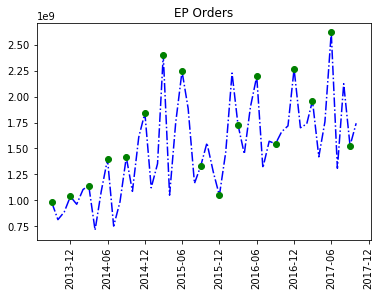

In [5]:
#Plotting EP Orders to see the trend
df = data.copy()
df['DATE'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

df1 = df[(df['Month'] == 3) | (df['Month'] == 6) | (df['Month'] == 9)| (df['Month'] == 12)]

plt.plot(df['DATE'], df['EP Orders'], color='blue', linestyle='-.')
plt.plot(df1['DATE'], df1['EP Orders'], marker = 'o', linestyle = 'None', color = 'green')
plt.xticks(label = df['DATE'], rotation='vertical')
plt.title('EP Orders')
plt.rcParams['figure.figsize'] = [8, 5] 
plt.show()


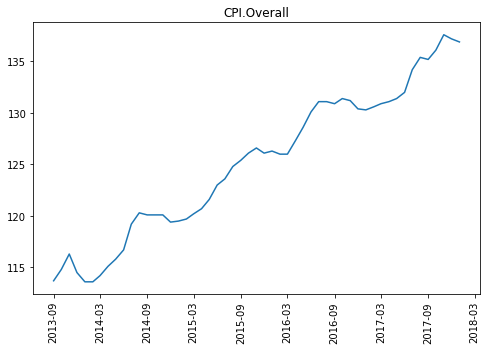

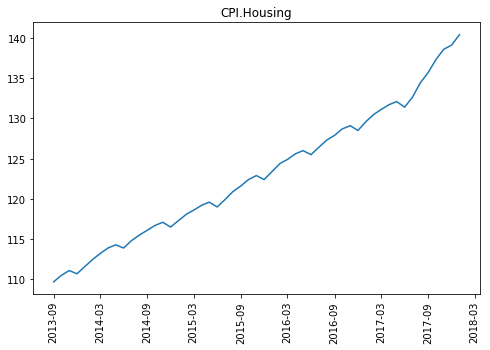

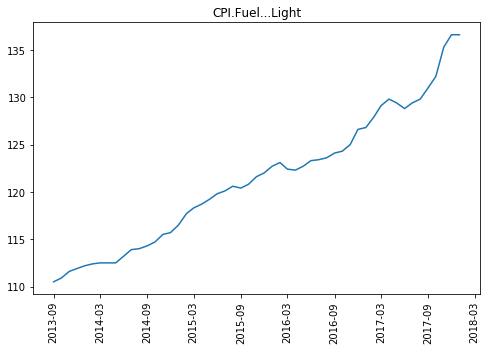

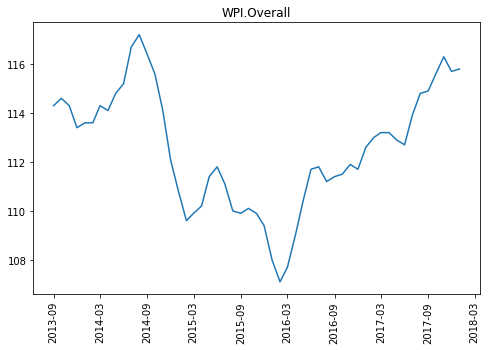

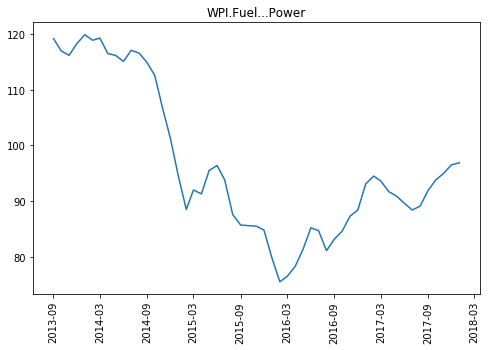

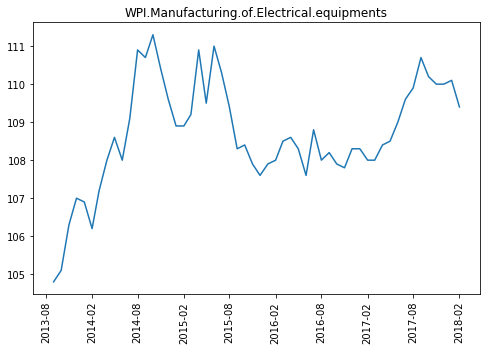

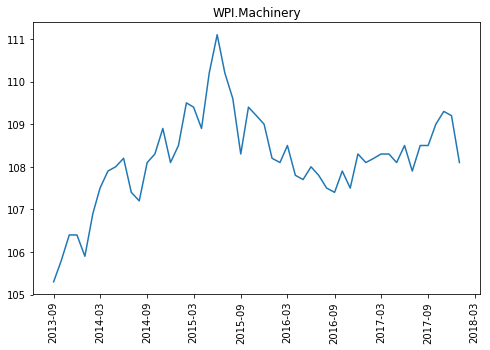

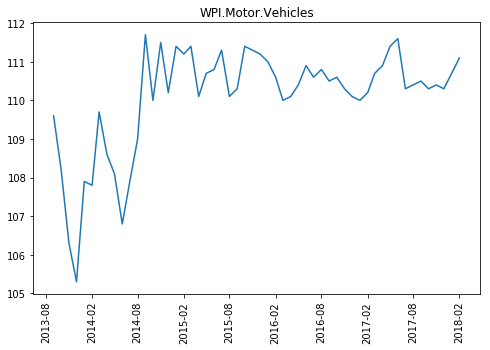

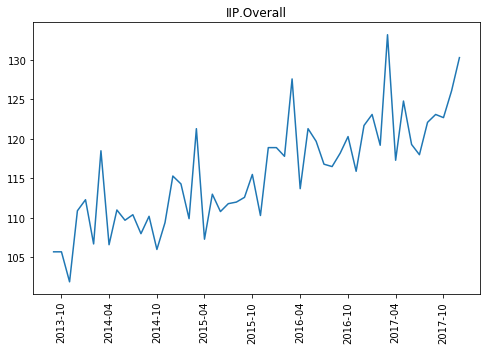

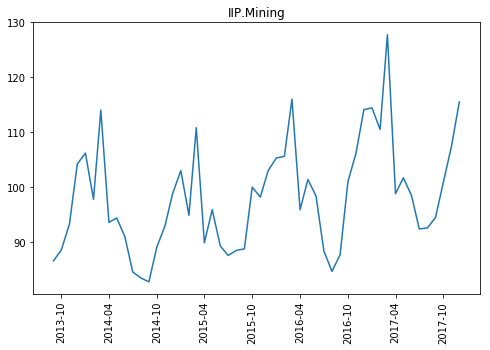

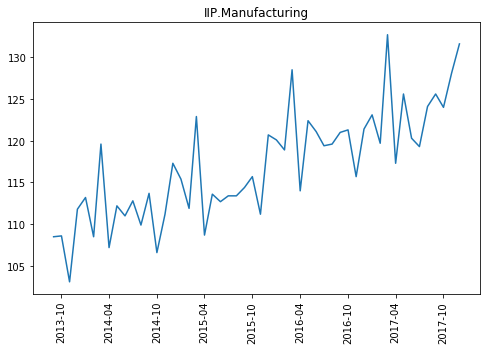

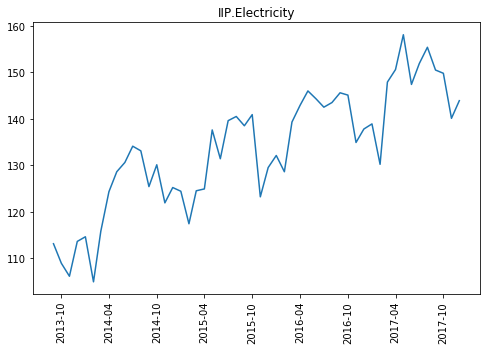

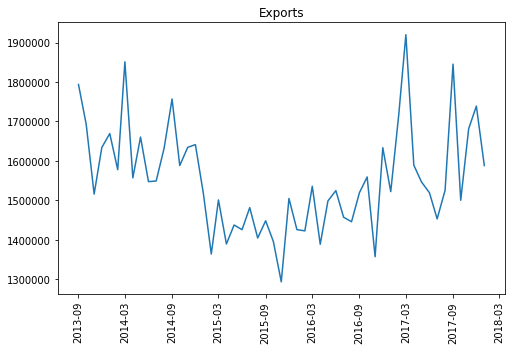

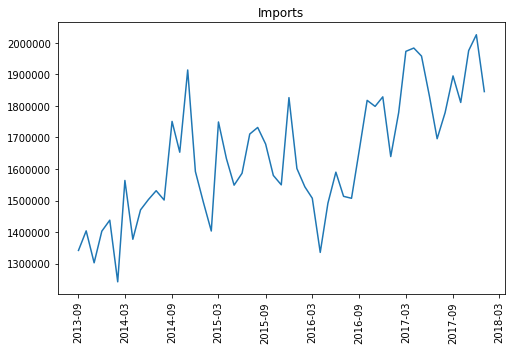

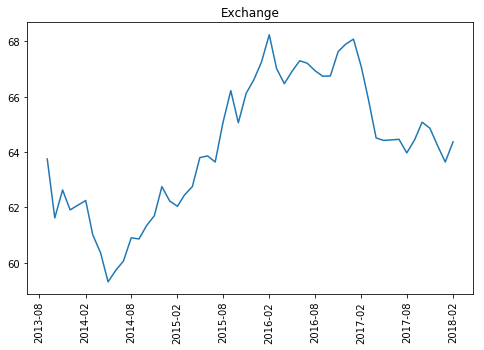

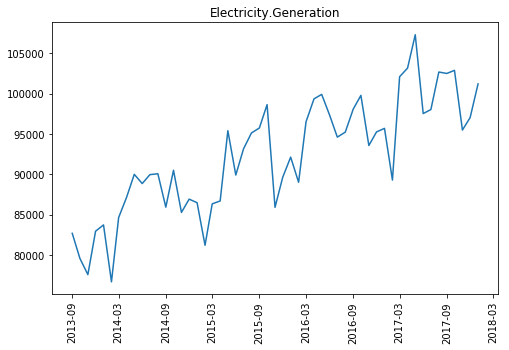

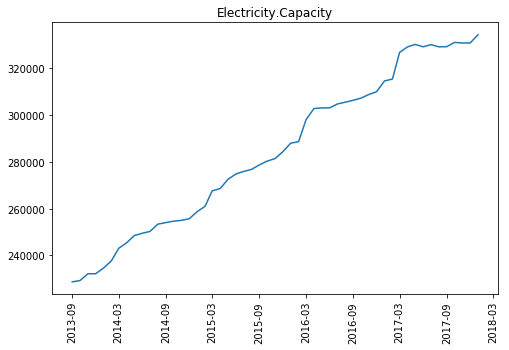

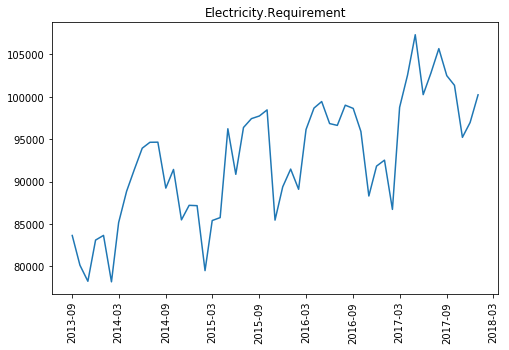

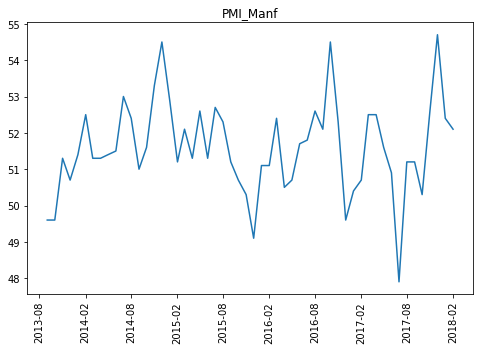

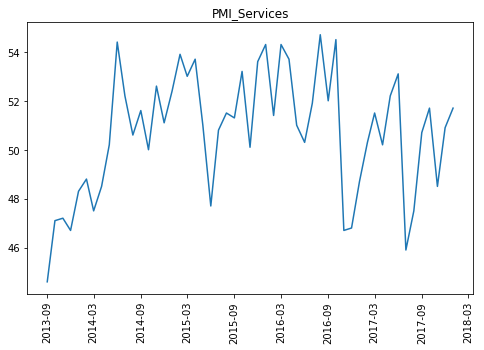

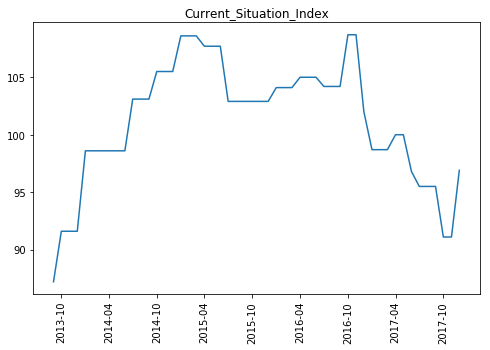

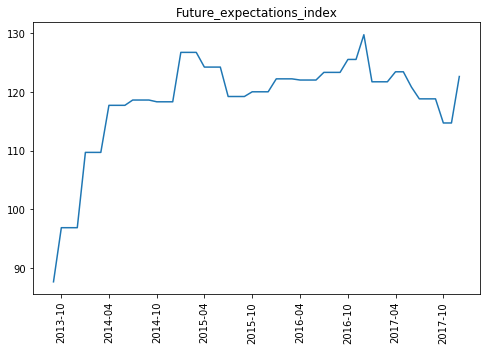

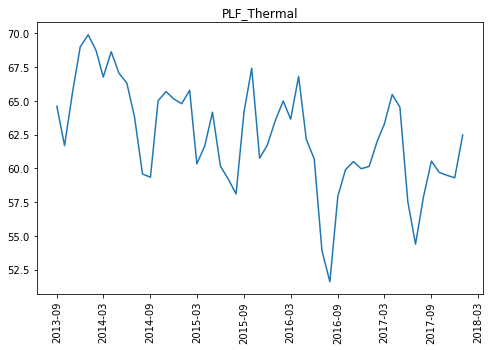

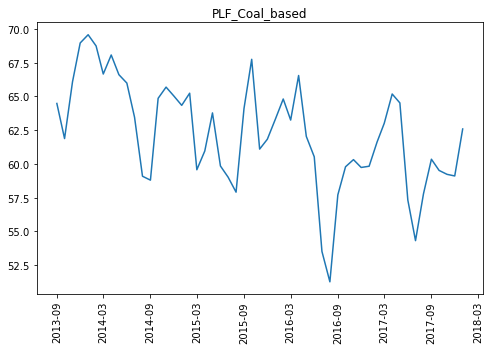

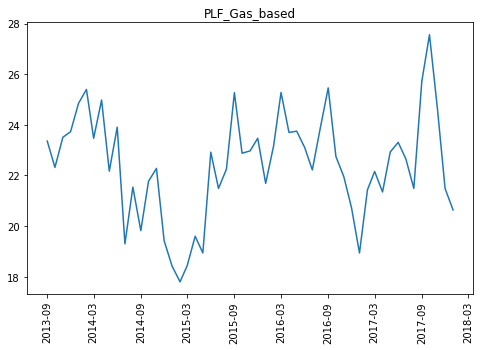

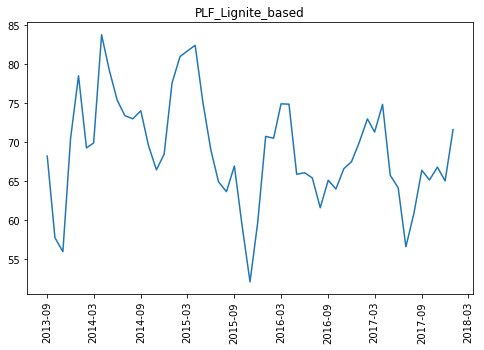

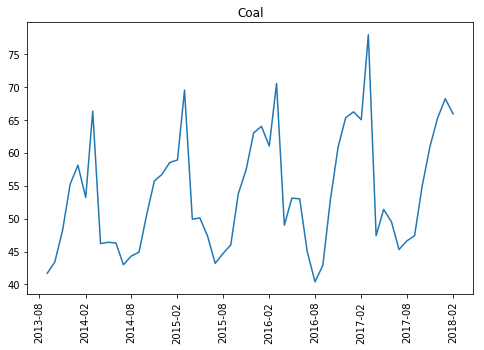

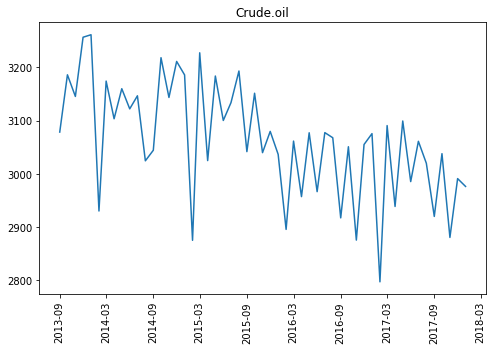

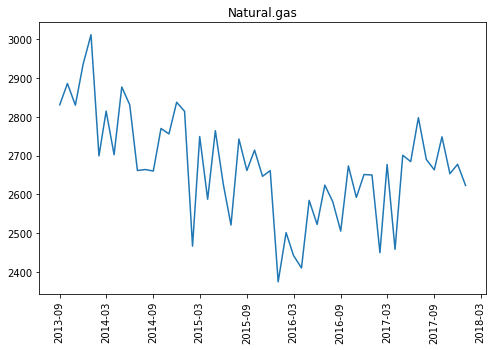

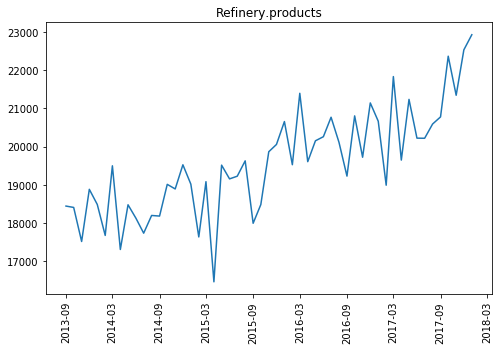

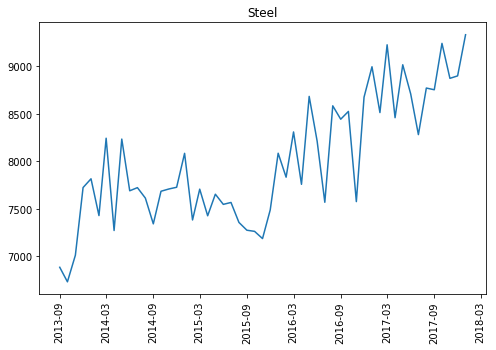

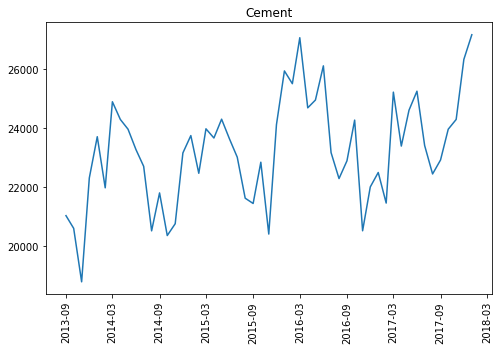

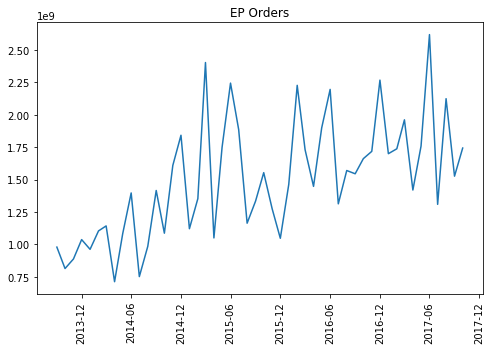

In [6]:
#Plotting columns with missing columns
df = data.copy()
df['DATE'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

for i in missing_cols:
    plt.plot(df['DATE'], df[i])
    plt.xticks(label = df['DATE'], rotation='vertical')
    plt.title(i)
    plt.show()

       CPI.Overall  CPI.Housing  CPI.Fuel...Light  WPI.Overall  \
Month                                                            
1          125.320      124.460           122.960      112.160   
2          122.475      121.375           120.275      110.825   
3          122.825      121.950           120.575      111.275   
4          123.550      122.600           120.825      111.625   
5          124.350      123.000           120.950      112.375   
6          125.450      122.450           121.275      112.850   
7          127.025      123.425           121.700      113.375   
8          127.900      124.525           122.000      113.300   
9          125.060      122.200           120.060      113.380   
10         125.700      123.120           120.580      113.480   
11         126.360      123.760           121.800      113.300   
12         125.520      123.440           122.560      112.460   

       WPI.Fuel...Power  WPI.Manufacturing.of.Electrical.equipments  \
Mont

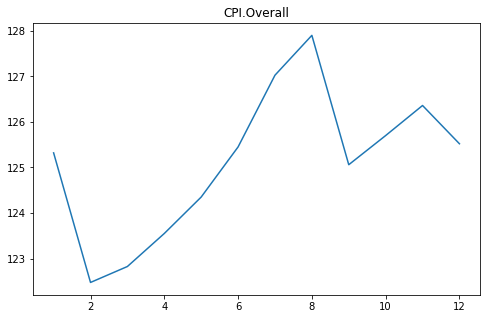

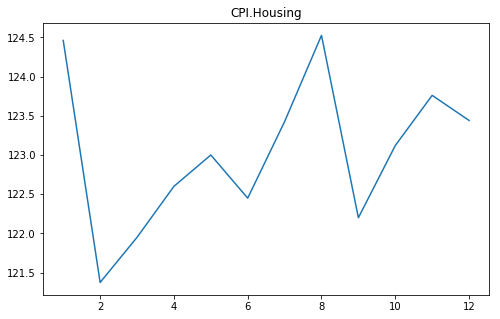

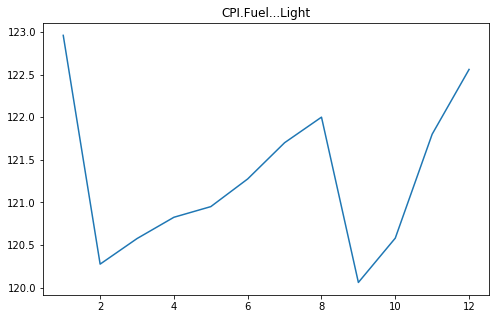

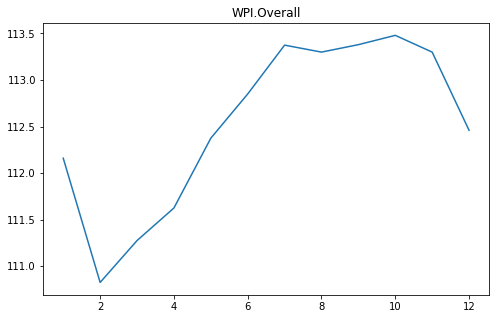

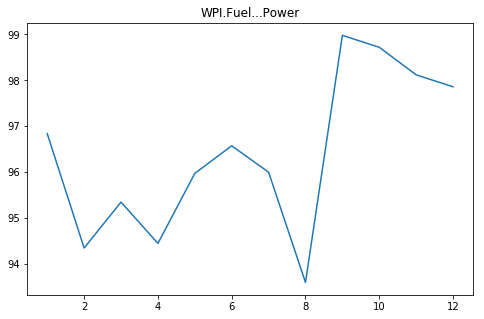

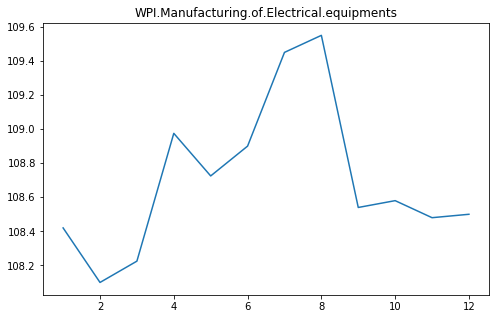

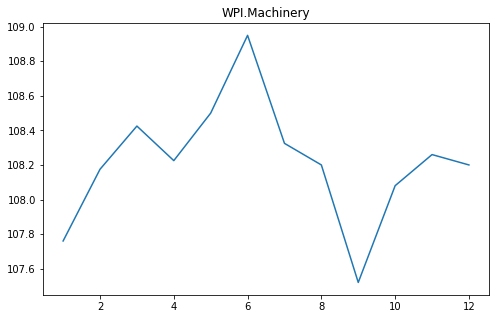

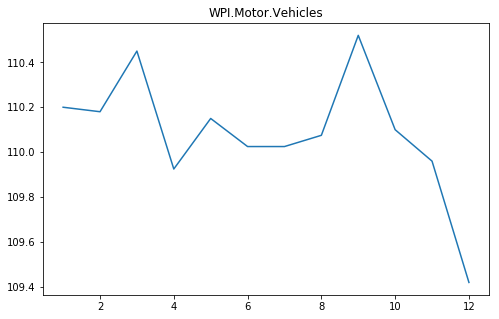

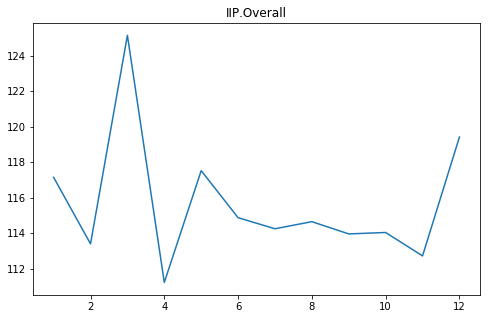

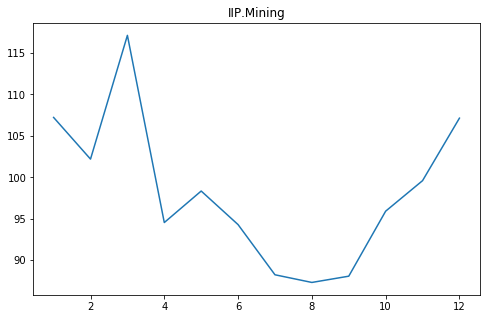

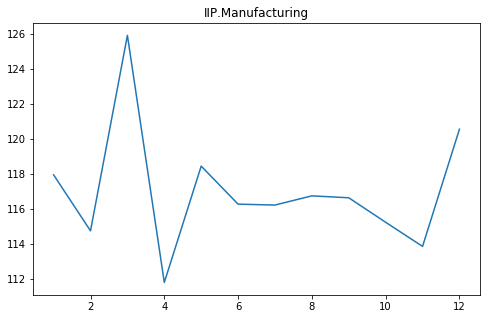

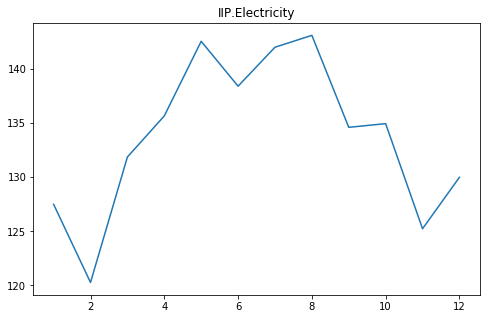

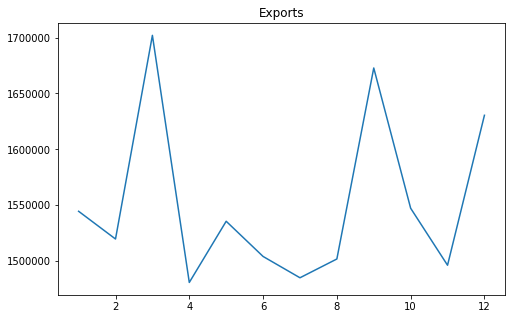

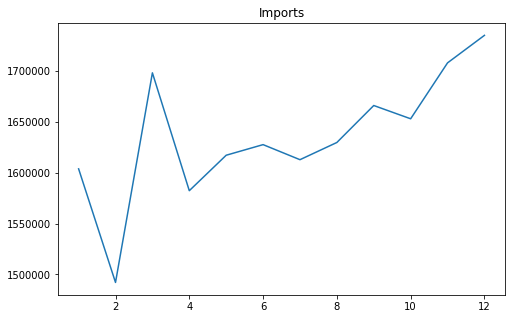

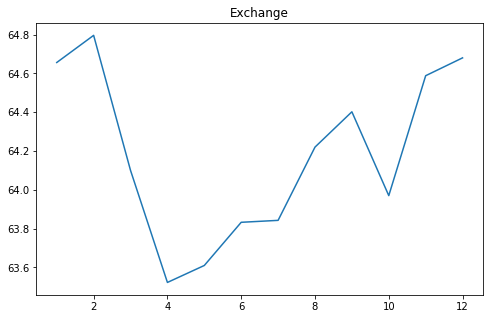

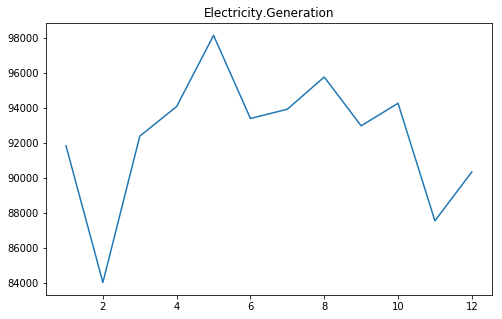

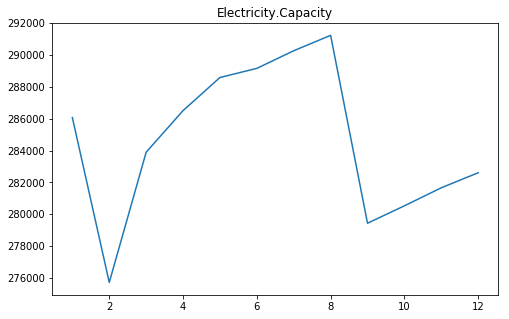

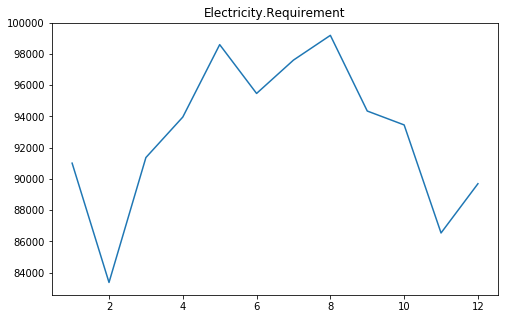

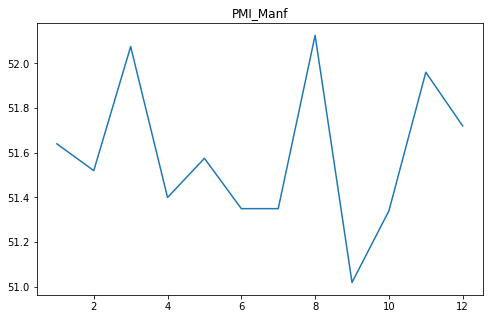

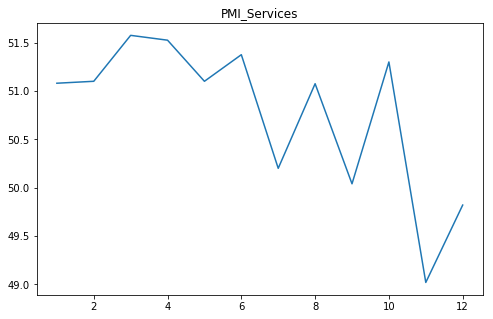

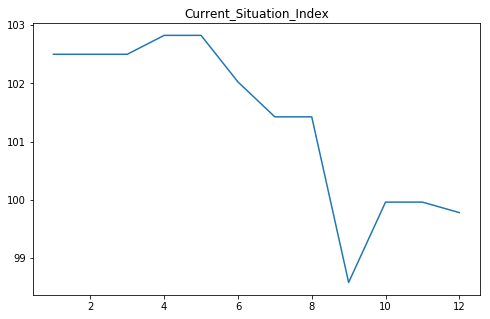

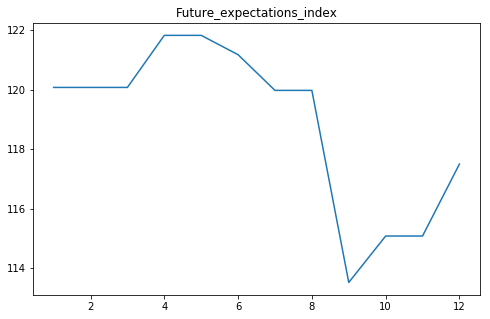

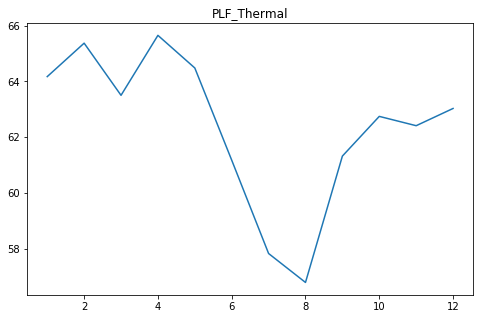

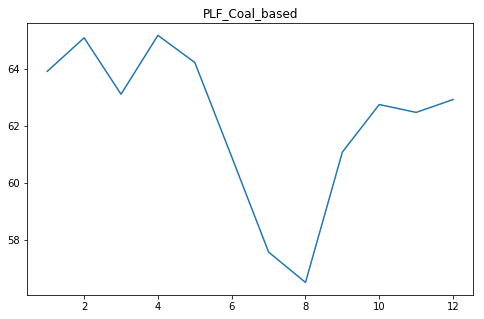

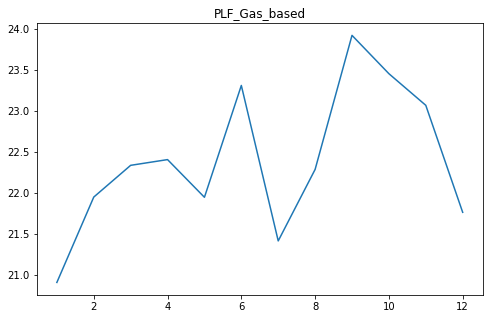

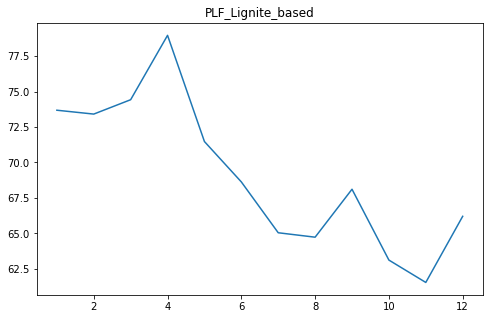

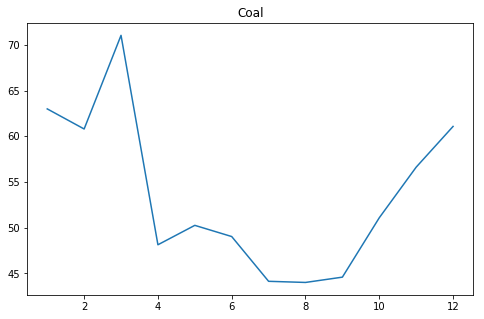

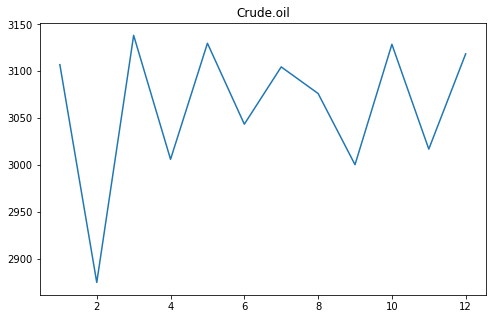

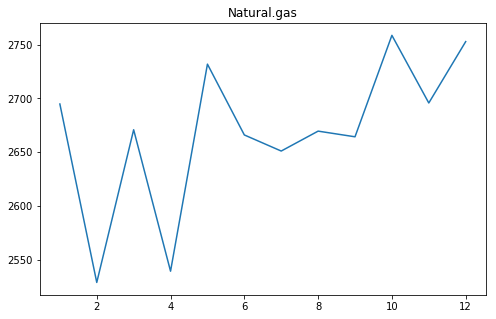

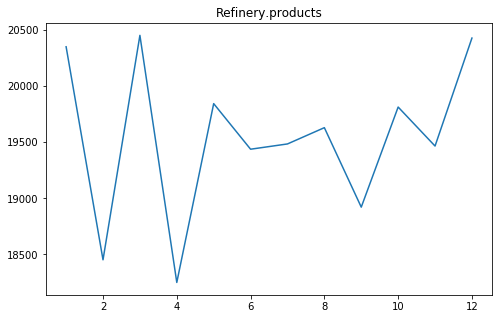

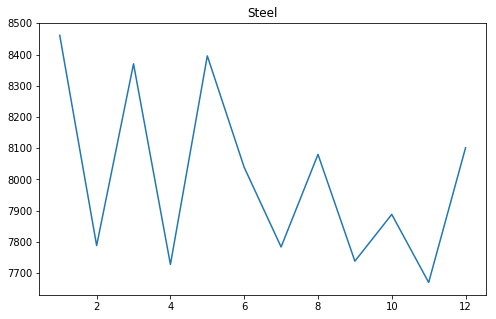

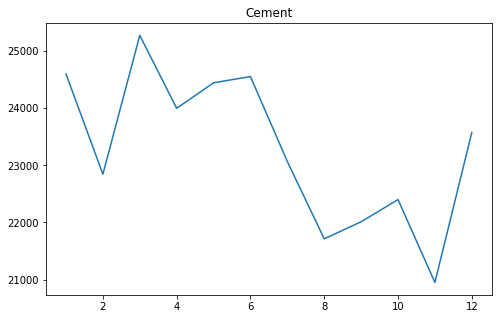

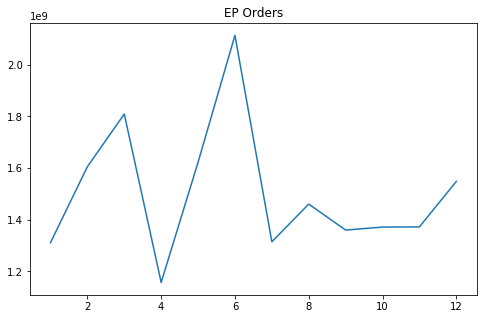

In [7]:
#Data grouped according to month

data_grouped = data.groupby('Month')
data_grouped = data_grouped.mean()
print(data_grouped[missing_cols])
# for i in missing_cols:
#     plt.bar(data_grouped.index, height = data_grouped[i])
#     plt.title(i)
#     plt.show()
    
for i in missing_cols:
    plt.plot(data_grouped.index, data_grouped[i])
    plt.title(i)
    plt.show()    

## Observations from the Plot

- For Exports ...
- For Coal ...

### Imputing Values 

In [8]:
# Exports 
data['Exports'].fillna(data['Exports'].mean(), inplace = True)

# Imports
data['Imports'].fillna(data[((data['Year']==2017)| (data['Year'] == 2018))]['Imports'].mean(), inplace = True)

# Electricity Capacity

array = data['Electricity.Capacity']
array = array[~(np.isnan(array))]

fit = np.polyfit((np.arange(53)+1), array ,1) #The use of 1 signifies a linear fit.

line = np.poly1d(fit)
new_points = np.arange(2)+ 54
imputed_values1 = line(new_points)

data['Electricity.Capacity'].iloc[53] = imputed_values1[0]
data['Electricity.Capacity'].iloc[54] = imputed_values1[1]

# Electricity Requirement

data['Electricity.Requirement'].iloc[53] = data[data['Month'] == data.iloc[53]['Month']]['Electricity.Requirement'].mean()
data['Electricity.Requirement'].iloc[54] = data[data['Month'] == data.iloc[54]['Month']]['Electricity.Requirement'].mean()
data['Electricity.Requirement']

# Coal

data['Coal'].fillna(data[data['Month'] == data.iloc[54]['Month']]['Coal'].mean(), inplace = True)
data['Coal']

# Crude Oil

data['Crude.oil'].iloc[53] = data[data['Month'] == data.iloc[53]['Month']]['Crude.oil'].mean()
data['Crude.oil'].iloc[54] = data[data['Month'] == data.iloc[54]['Month']]['Crude.oil'].mean()
data['Crude.oil']

# Natural.gas

data['Natural.gas'].fillna(data['Natural.gas'].mean(), inplace = True)
data['Natural.gas']

# Refinery.products

array = data['Refinery.products']
array = array[~(np.isnan(array))]

fit = np.polyfit((np.arange(53)+1), array ,1) #The use of 1 signifies a linear fit.

line = np.poly1d(fit)
new_points = np.arange(2)+ 54
imputed_values2 = line(new_points)

data['Refinery.products'].iloc[53] = imputed_values2[0]
data['Refinery.products'].iloc[54] = imputed_values2[1]


C:\Users\sachin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
data.isnull().sum()

Year                                          0
Month                                         0
CPI.Overall                                   2
CPI.Housing                                   2
CPI.Fuel...Light                              2
WPI.Overall                                   2
WPI.Fuel...Power                              2
WPI.Manufacturing.of.Electrical.equipments    1
WPI.Machinery                                 2
WPI.Motor.Vehicles                            1
IIP.Overall                                   3
IIP.Mining                                    3
IIP.Manufacturing                             3
IIP.Electricity                               3
Exports                                       0
Imports                                       0
Exchange                                      1
Electricity.Generation                        2
Electricity.Capacity                          0
Electricity.Requirement                       0
PMI_Manf                                

In [10]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<10 and feature not in ['Year', 'Month']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [11]:
continuous_feature=[feature for feature in data.columns if feature not in discrete_feature and feature not in ['Year', 'Month']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 53


In [12]:
# mean +- 2sigma
# function to calculate outlier of a variable
def out1(x):
    mu = np.average(x)
    sigma = np.std(x)
    LL = mu - 2*sigma
    UL = mu + 2*sigma
    out = [1 if (a >= UL) | (a <= LL) else 0 for a in x]
    return(out)

# check #outliers in each variable
print(data.apply(out1).apply(sum))

Year                                          0
Month                                         0
CPI.Overall                                   0
CPI.Housing                                   0
CPI.Fuel...Light                              0
WPI.Overall                                   0
WPI.Fuel...Power                              0
WPI.Manufacturing.of.Electrical.equipments    0
WPI.Machinery                                 0
WPI.Motor.Vehicles                            0
IIP.Overall                                   0
IIP.Mining                                    0
IIP.Manufacturing                             0
IIP.Electricity                               0
Exports                                       3
Imports                                       1
Exchange                                      0
Electricity.Generation                        0
Electricity.Capacity                          0
Electricity.Requirement                       3
PMI_Manf                                

In [13]:
# for i in data.columns:
#     if any(data[i]<0):
#         data[i] = data[i] + data[i].max()
#     else:
#         pass
# data

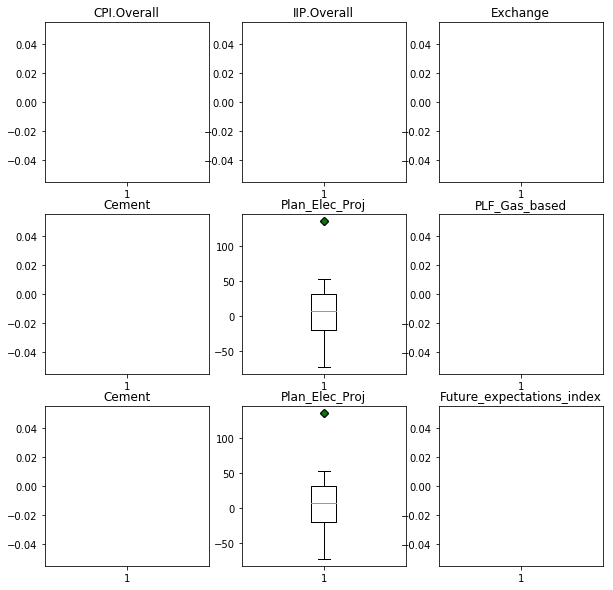

In [14]:
df2 = data.copy()
fig = plt.figure(figsize = (10,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)
green_diamond = dict(markerfacecolor='g', marker='D')

ax1.boxplot(x = df2['CPI.Overall'],flierprops=green_diamond)
ax1.title.set_text('CPI.Overall')

ax2.boxplot(x = df2['IIP.Overall'],flierprops=green_diamond)
ax2.title.set_text('IIP.Overall')

ax3.boxplot(x = df2['Exchange'],flierprops=green_diamond)
ax3.title.set_text('Exchange')

ax4.boxplot(x = df2['Cement'],flierprops=green_diamond)
ax4.title.set_text('Cement')

ax5.boxplot(x = df2['Plan_Elec_Proj'],flierprops=green_diamond)
ax5.title.set_text('Plan_Elec_Proj')

ax6.boxplot(x = df2['PLF_Gas_based'],flierprops=green_diamond)
ax6.title.set_text('PLF_Gas_based')

ax7.boxplot(x = df2['Cement'],flierprops=green_diamond)
ax7.title.set_text('Cement')

ax8.boxplot(x = df2['Plan_Elec_Proj'],flierprops=green_diamond)
ax8.title.set_text('Plan_Elec_Proj')

ax9.boxplot(x = df2['Future_expectations_index'],flierprops=green_diamond)
ax9.title.set_text('Future_expectations_index')

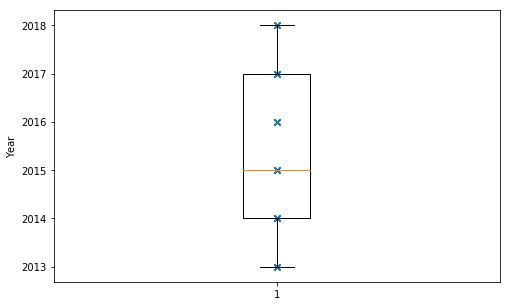

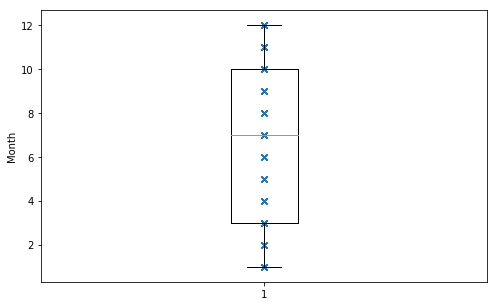

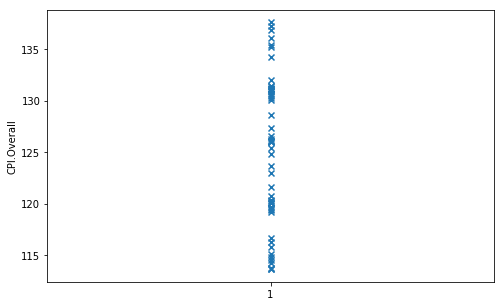

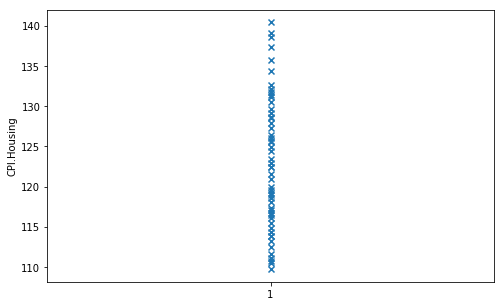

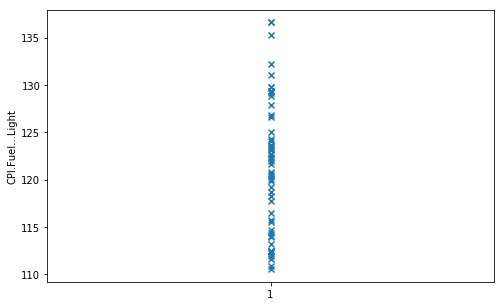

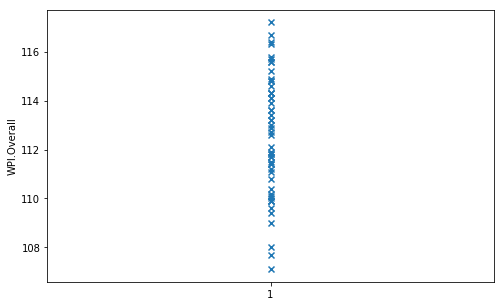

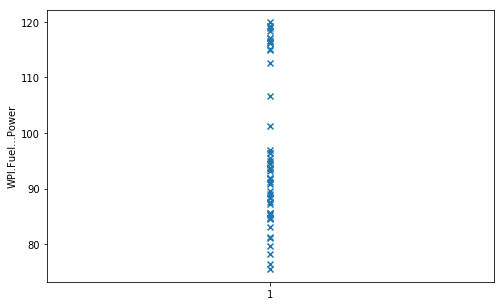

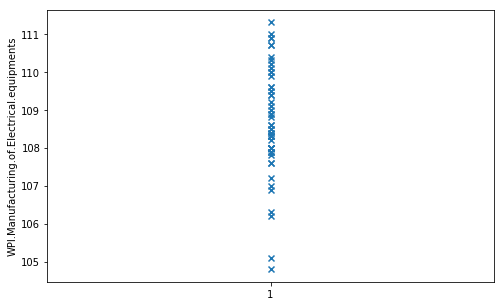

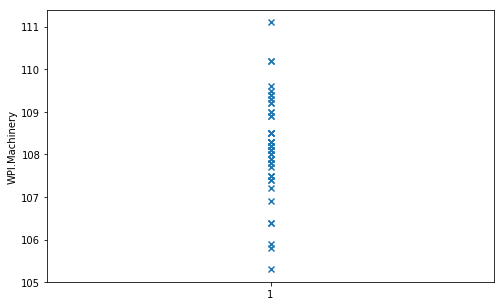

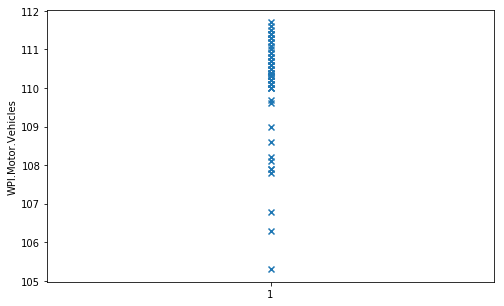

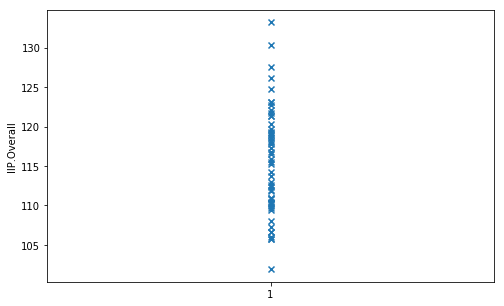

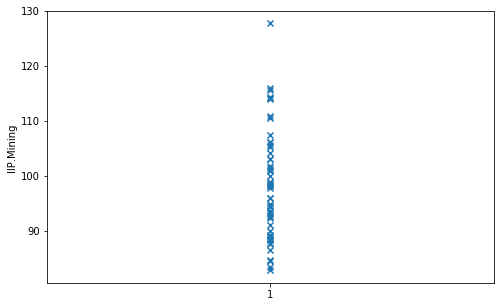

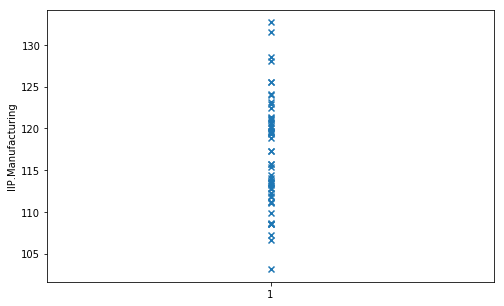

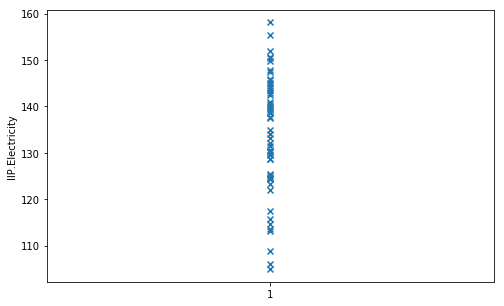

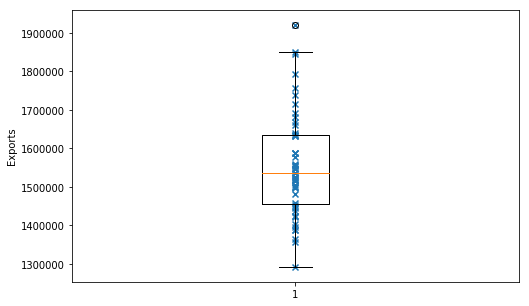

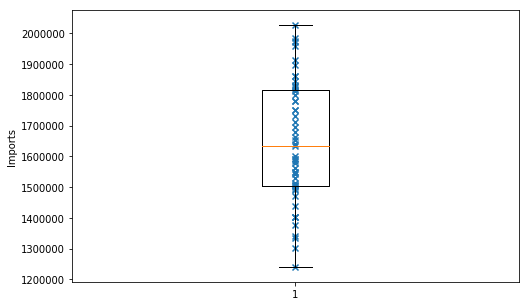

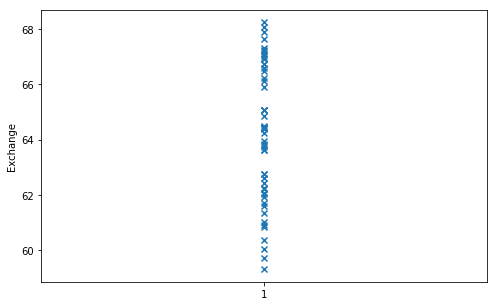

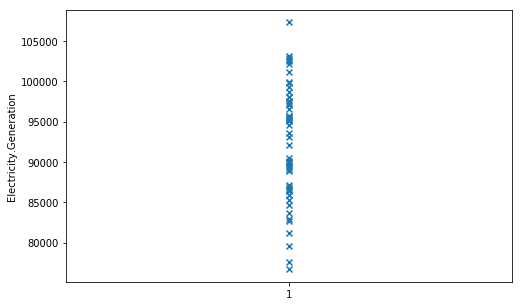

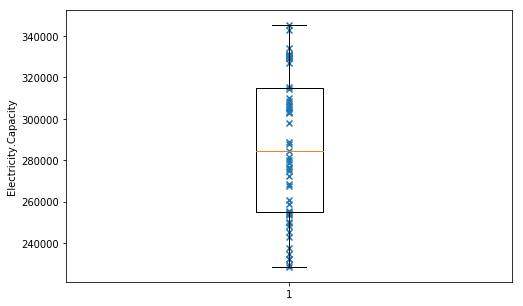

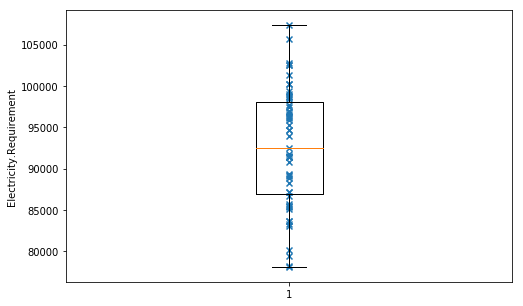

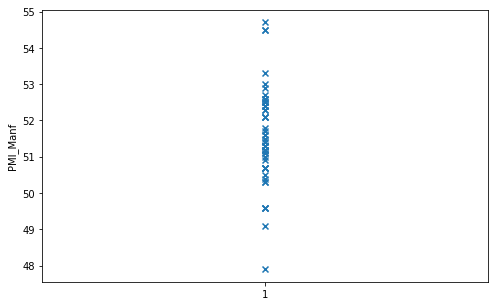

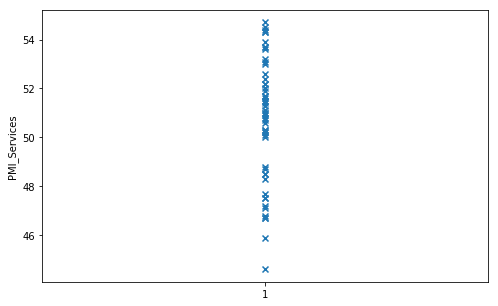

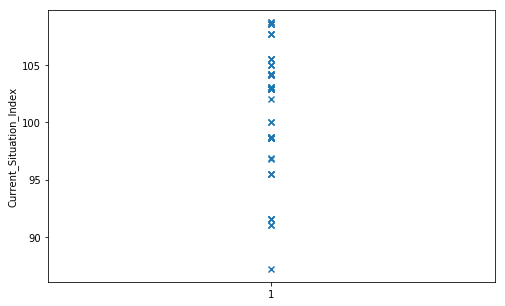

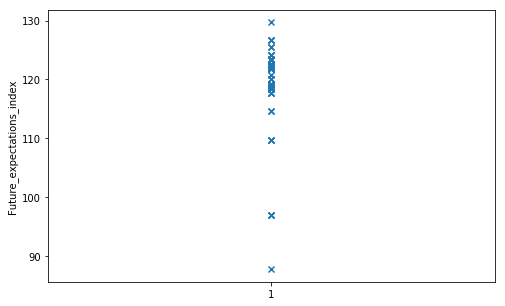

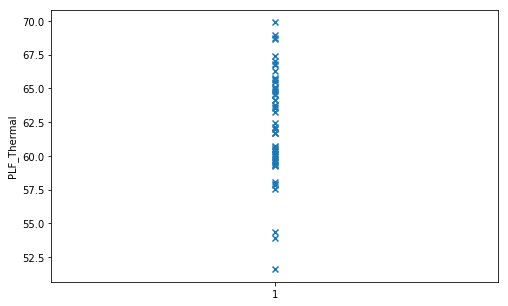

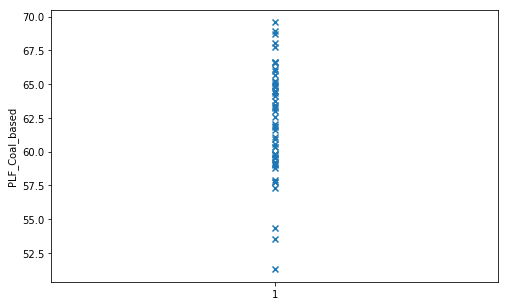

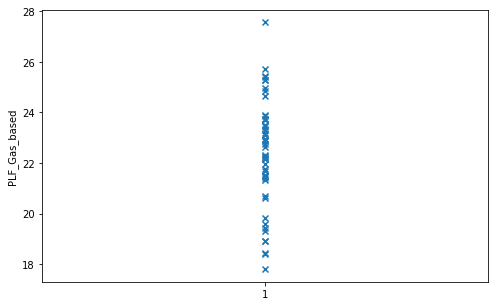

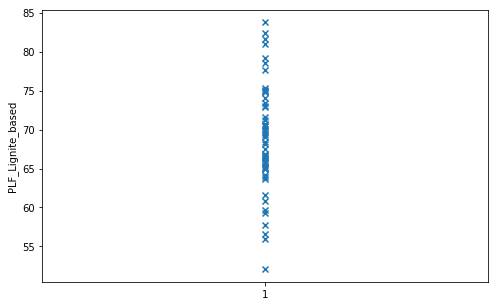

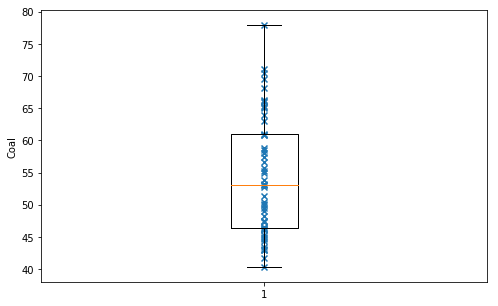

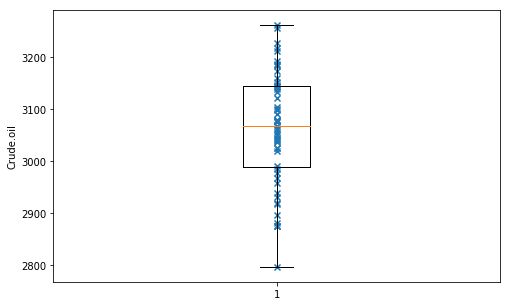

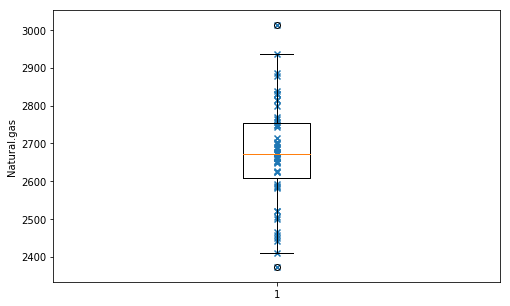

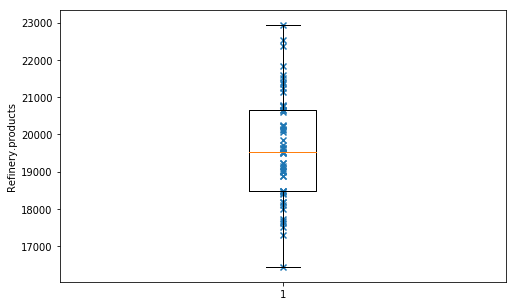

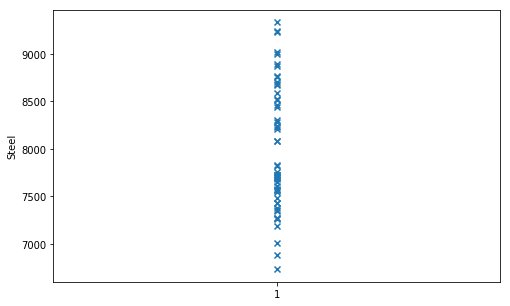

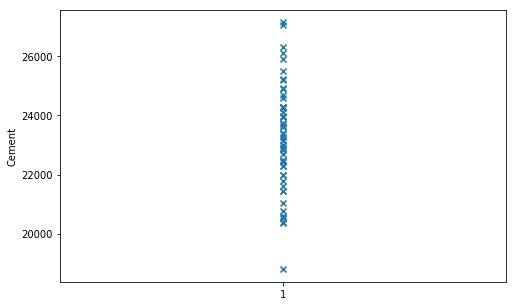

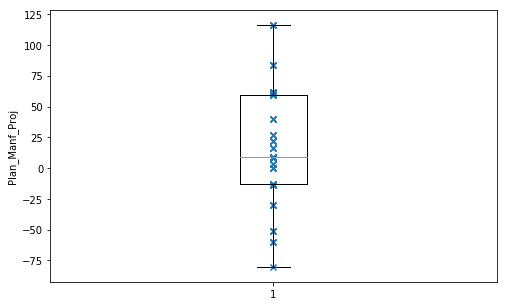

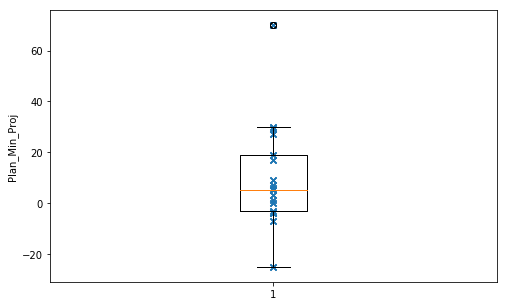

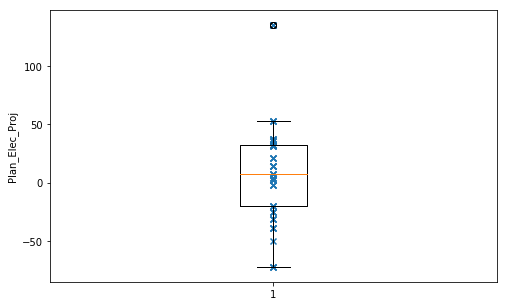

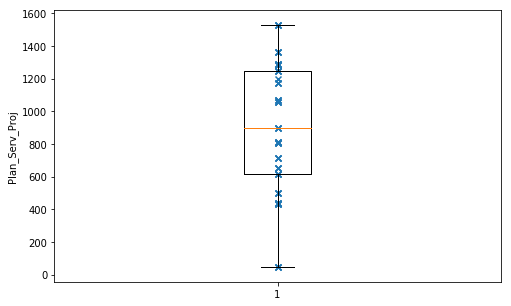

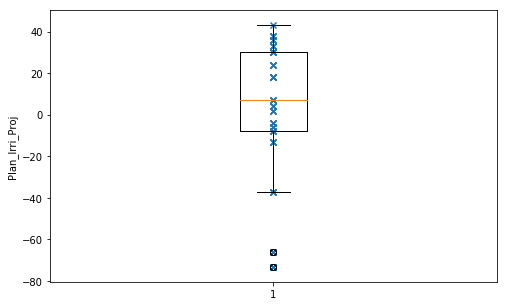

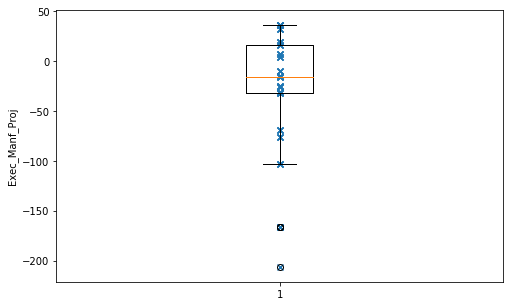

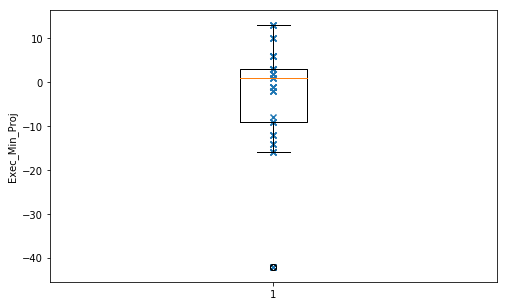

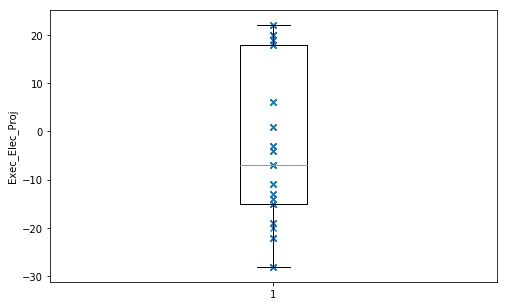

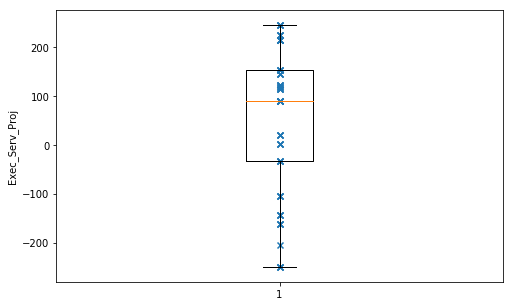

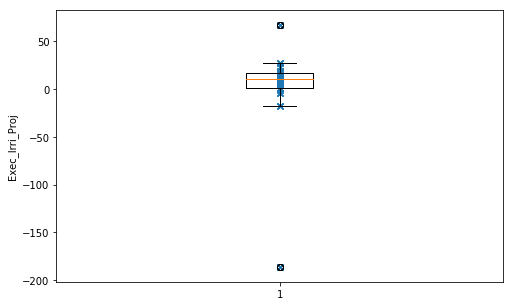

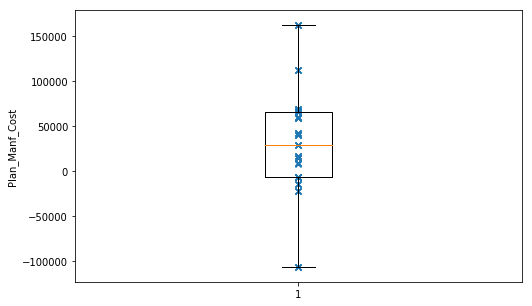

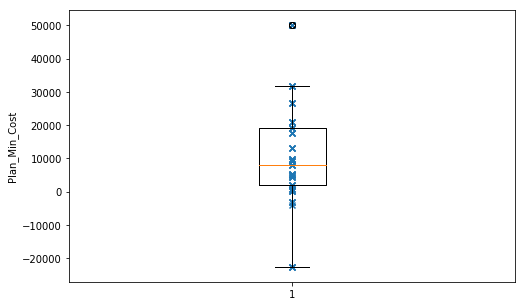

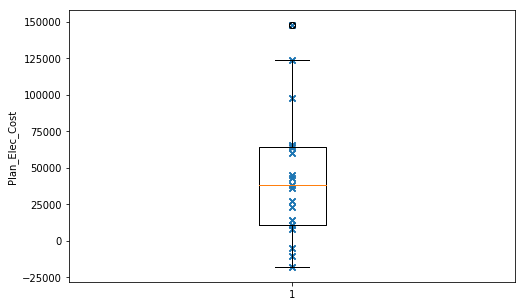

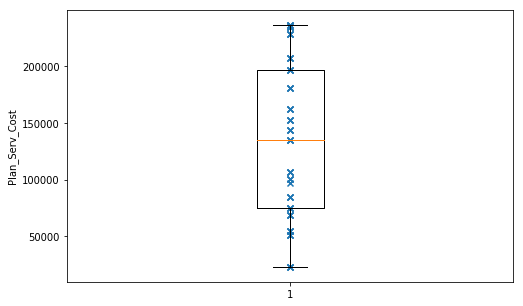

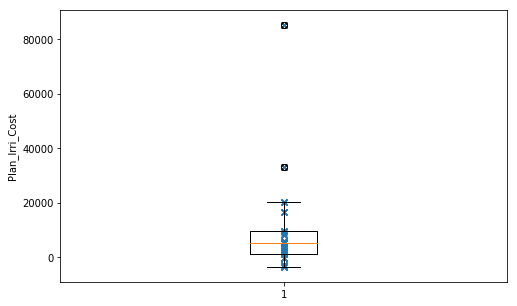

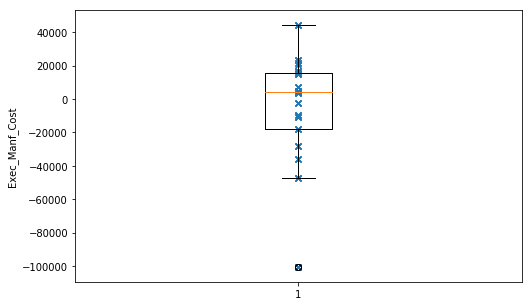

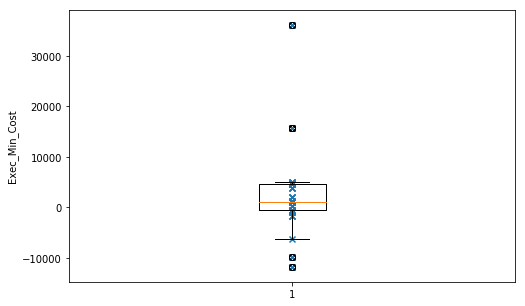

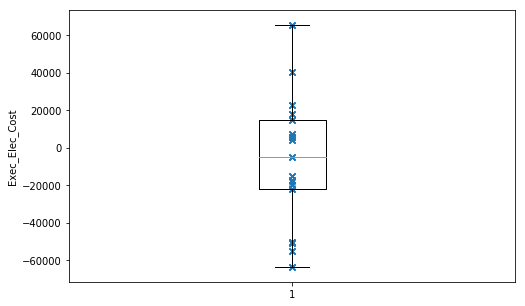

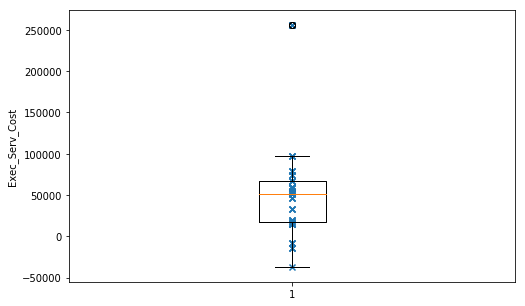

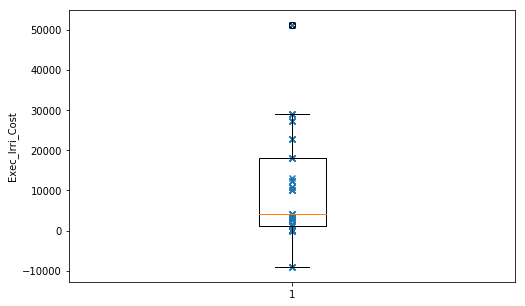

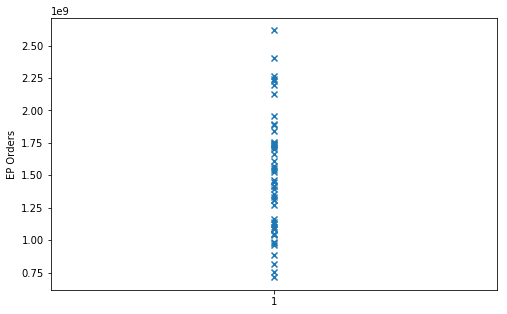

In [15]:
#box plot
for i in data:
    box1 = plt.boxplot(data[i])
    plt.scatter(np.ones_like(data[i]), data[i], marker='x', label='all')
    interactive(True)
    plt.ylabel(i)
    plt.show()

In [16]:
def examine_transform(df):
    plt.figure(figsize=(20,35))
    gs = gridspec.GridSpec(8,2, width_ratios=(1,2))
    
    # raw data
    ax = plt.subplot(gs[0])
    sns.distplot(df, bins=50)
    ax.set_xlabel('')
    string1 = 'histogram of orignal feature- '+ str(df.name)
    ax.set_title(string1)
    
    ax = plt.subplot(gs[1])
    prob = stats.probplot(df, dist = stats.norm, plot = ax, rvalue = True)
    ax.set_xlabel('')
    string1 = 'Probplot of original feature- ' + str(df.name)
    ax.set_title(string1)
    print('raw_data corr : ',data['EP Orders'].corr(df))
    
    #apply log transformation
    ax = plt.subplot(gs[2])
    sns.distplot(np.log(df), bins=50)
    ax.set_xlabel('')
    string1 = 'histogram of log_tranformed feature- ' + str(df.name)
    ax.set_title(string1)

    ax = plt.subplot(gs[3])
    prob = stats.probplot(np.log(df), dist ='norm', plot = ax, rvalue = True)
    ax.set_xlabel('')
    string1 = 'Probplot of log_transformed feature- ' + str(df.name)
    ax.set_title(string1)
    print('log_tranf corr : ',data['EP Orders'].corr(np.log(df)))


    #apply reciprocal transformation
    ax = plt.subplot(gs[4])
    sns.distplot(np.reciprocal(df+1), bins=50)
    ax.set_xlabel('')
    string1 = 'histogram of reciprocal_tranformed feature- ' + str(df.name)
    ax.set_title(string1)
    
    ax = plt.subplot(gs[5])
    prob = stats.probplot(np.reciprocal(df), dist ='norm', plot = ax, rvalue = True)
    ax.set_xlabel('')
    string1 = 'Probplot of reciprocal_transformed feature- ' + str(df.name)
    ax.set_title(string1)
    print('reciprocal_tranf corr : ',data['EP Orders'].corr(np.reciprocal(df)))
    

    #apply square transformation
    ax = plt.subplot(gs[6])
    sns.distplot(np.power(df,2), bins=50)
    ax.set_xlabel('')
    string1 = 'histogram of square_tranformed feature- ' + str(df.name)
    ax.set_title(string1)

    ax = plt.subplot(gs[7])
    prob = stats.probplot(np.power(df,2), dist ='norm', plot = ax, rvalue = True)
    ax.set_xlabel('')
    string1 = 'Probplot of square_transformed feature- ' + str(df.name)
    ax.set_title(string1)
    print('square_tranf corr : ',data['EP Orders'].corr(np.power(df,2)))

    
    #apply square_root transformation
    ax = plt.subplot(gs[8])
    sns.distplot(np.power(df,0.5), bins=50)
    ax.set_xlabel('')
    string1 = 'histogram of squareroot_tranformed feature- ' + str(df.name)
    ax.set_title(string1)

    ax = plt.subplot(gs[9])
    prob = stats.probplot(np.power(df,0.5), dist ='norm', plot = ax, rvalue = True)
    ax.set_xlabel('')
    string1 = 'Probplot of squareroot_transformed feature- ' + str(df.name)
    ax.set_title(string1)
    print('sqrt_tranf corr : ',data['EP Orders'].corr(np.power(df,0.5)))


    #apply exponential transformation
    ax = plt.subplot(gs[10])
    sns.distplot(np.power(df,(1/5)), bins=50)
    ax.set_xlabel('')
    string1 = 'histogram of exponential_tranformed feature- ' + str(df.name)
    ax.set_title(string1)
    
    ax = plt.subplot(gs[11])
    prob = stats.probplot(np.power(df,(1/5)), dist ='norm', plot = ax, rvalue = True)
    ax.set_xlabel('')
    string1 = 'Probplot of exponential_transformed feature- ' + str(df.name)
    ax.set_title(string1)
    print('exp_tranf corr : ',data['EP Orders'].corr(np.power(df,(1/5))))
    
    
    #apply z - transformation
    ax = plt.subplot(gs[12])
    sns.distplot((df-np.mean(df))/np.std(df), bins=50)
    ax.set_xlabel('')
    string1 = 'histogram of z_tranformed feature- ' + str(df.name)
    ax.set_title(string1)
    
    ax = plt.subplot(gs[13])
    prob = stats.probplot((df-np.mean(df))/np.std(df), dist ='norm', plot = ax, rvalue = True)
    ax.set_xlabel('')
    string1 = 'Probplot of z_transformed feature- ' + str(df.name)
    ax.set_title(string1)
    print('z_tranf corr : ',data['EP Orders'].corr((df-np.mean(df))/np.std(df)))
    
    # apply boxcox transformation
     
    fitted_data, fitted_lambda = stats.boxcox(df)
    
    ax = plt.subplot(gs[14])
    sns.distplot(fitted_data, bins = 50)
    ax.set_xlabel('')
    string1 = 'histogram of boxcox_transformed feature- ' + str(df.name)
    ax.set_title(string1)
    
    ax = plt.subplot(gs[15])
    prob = stats.probplot(fitted_data, dist ='norm', plot = ax, rvalue = True)
    ax.set_xlabel('')
    string1 = 'Probplot of boxcox_transformed feature- ' + str(df.name)
    ax.set_title(string1)
    fit_data_series = pd.Series(fitted_data)
    print('boxcox_tranf corr : ',data['EP Orders'].corr(fit_data_series))
    
    
    plt.show()

In [17]:
# examine_transform(data['Exec_Serv_Cost'])

In [18]:
# for i in range(2,54):
#     examine_transform(data.iloc[:,i])

## Observations

- CPI.Overall - raw data
- CPI.Housing - boxcox
- CPI.Fuel...Light - boxcox
- WPI.Overall - raw data
- WPI.Fuel...Power - try other transformation
- WPI.Manufacturing of.Electrical equipments - boxcox
- WPI.Machinery - raw data
- WPI.Motor Vehicles - boxcox(Significant transformation)
- IIP.Overall - boxcox(Significant)
- IIP.Mining - boxcox or reciprocal
- IIP.Manufacturing- boxcox or reciprocal
- IIP.Electricity - boxcox 
- IIP.Exports - Reciprocal (Significant)
- Future Expectation Index - boxcox (Significant)
- Plan_Irr_Proj - boxcox(Significant)
- Exec_Manf_Proj - boxcox(significant)
- Exec_Min_Proj - boxcox(significant)
- Plan_Elec_Cost - reciprocal(significant)
- Exec_Serv_Cost - reciprocal(significant)
- Exec_Irri_Cost - reciprocal(significant)
- 

#### other transformations
- WPI.Fuel...Power
- Electricity.Capacity
- Exec_Irri_Proj
- Plan_Irri_Cost
- Exec_Min_Cost

In [19]:
data_transform=data.copy()


fitted_data, fitted_lambda = stats.boxcox(data["WPI.Motor.Vehicles"])
data_transform["WPI.Motor.Vehicles"]=fitted_data
fitted_data, fitted_lambda = stats.boxcox(data["Future_expectations_index"])
data_transform["Future_expectations_index"]=fitted_data
# fitted_data, fitted_lambda = stats.boxcox(data["Plan_Irri_Proj"])
# data_transform["Plan_Irri_Proj"]=fitted_data
# fitted_data, fitted_lambda = stats.boxcox(data["Exec_Manf_Proj"])
# data_transform["Exec_Manf_Proj"]=fitted_data
data_transform["Plan_Elec_Cost"]=np.reciprocal(data["Plan_Elec_Cost"]+1)
data_transform["Exec_Serv_Cost"]=np.reciprocal(data["Exec_Serv_Cost"]+1)
data_transform["Exec_Irri_Cost"]=np.reciprocal(data["Exec_Irri_Cost"]+1)


data_transform

Year  Month  CPI.Overall  CPI.Housing  CPI.Fuel...Light  WPI.Overall  \
0   2013      9        113.7        109.7             110.5        114.3   
1   2013     10        114.8        110.5             110.9        114.6   
2   2013     11        116.3        111.1             111.6        114.3   
3   2013     12        114.5        110.7             111.9        113.4   
4   2014      1        113.6        111.6             112.2        113.6   
5   2014      2        113.6        112.5             112.4        113.6   
6   2014      3        114.2        113.2             112.5        114.3   
7   2014      4        115.1        113.9             112.5        114.1   
8   2014      5        115.8        114.3             112.5        114.8   
9   2014      6        116.7        113.9             113.2        115.2   
10  2014      7        119.2        114.8             113.9        116.7   
11  2014      8        120.3        115.5             114.0        117.2   
12  2014      9        120.1        116.1             114.3        116.4   
13  2014     10        120.1        116.7             114.7        115.6   
14  2014     11        120.1        117.1             115.5        114.1   
15  2014     12        119.4        116.5             115.7        112.1   
16  2015      1        119.5        117.3             116.5        110.8   
17  2015      2        119.7        118.1             117.7        109.6   
18  2015      3        120.2        118.6             118.3        109.9   
19  2015      4        120.7        119.2             118.7        110.2   
20  2015      5        121.6        119.6             119.2        111.4   
21  2015      6        123.0        119.0             119.8        111.8   
22  2015      7        123.6        119.9             120.1        111.1   
23  2015      8        124.8        120.9             120.6        110.0   
24  2015      9        125.4        121.6             120.4        109.9   
25  2015     10        126.1        122.4             120.8        110.1   
26  2015     11        126.6        122.9             121.6        109.9   
27  2015     12        126.1        122.4             122.0        109.4   
28  2016      1        126.3        123.4             122.7        108.0   
29  2016      2        126.0        124.4             123.1        107.1   
30  2016      3        126.0        124.9             122.4        107.7   
31  2016      4        127.3        125.6             122.3        109.0   
32  2016      5        128.6        126.0             122.7        110.4   
33  2016      6        130.1        125.5             123.3        111.7   
34  2016      7        131.1        126.4             123.4        111.8   
35  2016      8        131.1        127.3             123.6        111.2   
36  2016      9        130.9        127.9             124.1        111.4   
37  2016     10        131.4        128.7             124.3        111.5   
38  2016     11        131.2        129.1             125.0        111.9   
39  2016     12        130.4        128.5             126.6        111.7   
40  2017      1        130.3        129.6             126.8        112.6   
41  2017      2        130.6        130.5             127.9        113.0   
42  2017      3        130.9        131.1             129.1        113.2   
43  2017      4        131.1        131.7             129.8        113.2   
44  2017      5        131.4        132.1             129.4        112.9   
45  2017      6        132.0        131.4             128.8        112.7   
46  2017      7        134.2        132.6             129.4        113.9   
47  2017      8        135.4        134.4             129.8        114.8   
48  2017      9        135.2        135.7             131.0        114.9   
49  2017     10        136.1        137.3             132.2        115.6   
50  2017     11        137.6        138.6             135.3        116.3   
51  2017     12        137.2        139.1           

In [20]:
data_lag= data.dropna()
data_lag

Year  Month  CPI.Overall  CPI.Housing  CPI.Fuel...Light  WPI.Overall  \
0   2013      9        113.7        109.7             110.5        114.3   
1   2013     10        114.8        110.5             110.9        114.6   
2   2013     11        116.3        111.1             111.6        114.3   
3   2013     12        114.5        110.7             111.9        113.4   
4   2014      1        113.6        111.6             112.2        113.6   
5   2014      2        113.6        112.5             112.4        113.6   
6   2014      3        114.2        113.2             112.5        114.3   
7   2014      4        115.1        113.9             112.5        114.1   
8   2014      5        115.8        114.3             112.5        114.8   
9   2014      6        116.7        113.9             113.2        115.2   
10  2014      7        119.2        114.8             113.9        116.7   
11  2014      8        120.3        115.5             114.0        117.2   
12  2014      9        120.1        116.1             114.3        116.4   
13  2014     10        120.1        116.7             114.7        115.6   
14  2014     11        120.1        117.1             115.5        114.1   
15  2014     12        119.4        116.5             115.7        112.1   
16  2015      1        119.5        117.3             116.5        110.8   
17  2015      2        119.7        118.1             117.7        109.6   
18  2015      3        120.2        118.6             118.3        109.9   
19  2015      4        120.7        119.2             118.7        110.2   
20  2015      5        121.6        119.6             119.2        111.4   
21  2015      6        123.0        119.0             119.8        111.8   
22  2015      7        123.6        119.9             120.1        111.1   
23  2015      8        124.8        120.9             120.6        110.0   
24  2015      9        125.4        121.6             120.4        109.9   
25  2015     10        126.1        122.4             120.8        110.1   
26  2015     11        126.6        122.9             121.6        109.9   
27  2015     12        126.1        122.4             122.0        109.4   
28  2016      1        126.3        123.4             122.7        108.0   
29  2016      2        126.0        124.4             123.1        107.1   
30  2016      3        126.0        124.9             122.4        107.7   
31  2016      4        127.3        125.6             122.3        109.0   
32  2016      5        128.6        126.0             122.7        110.4   
33  2016      6        130.1        125.5             123.3        111.7   
34  2016      7        131.1        126.4             123.4        111.8   
35  2016      8        131.1        127.3             123.6        111.2   
36  2016      9        130.9        127.9             124.1        111.4   
37  2016     10        131.4        128.7             124.3        111.5   
38  2016     11        131.2        129.1             125.0        111.9   
39  2016     12        130.4        128.5             126.6        111.7   
40  2017      1        130.3        129.6             126.8        112.6   
41  2017      2        130.6        130.5             127.9        113.0   
42  2017      3        130.9        131.1             129.1        113.2   
43  2017      4        131.1        131.7             129.8        113.2   
44  2017      5        131.4        132.1             129.4        112.9   
45  2017      6        132.0        131.4             128.8        112.7   
46  2017      7        134.2        132.6             129.4        113.9   
47  2017      8        135.4        134.4             129.8        114.8   
48  2017      9        135.2        135.7             131.0        114.9   
49  2017     10        136.1        137.3             132.2        115.6   

    WPI.Fuel...Power  WPI.Manufacturing.of.Electrical.equipments  \
0              119.2                                       

In [21]:
def lead_lag(data, col1, col2):
    df = data.copy()
    fig = plt.figure(figsize = (15,30))
    
    #raw
    ax1 = fig.add_subplot(5,2,1)
    sns.regplot(x = df[col1], y = df[col2])
    corr_raw = df[col2].corr(df[col1])
    string = 'raw_corr= '+ str(corr_raw)
    ax1.title.set_text(string)
    
    # lag1
    ax2 = fig.add_subplot(5,2,2)
    df['lag_1'] = df[col1].shift(1)
    sns.regplot(x= df['lag_1'], y = df[col2])
    corr_lag1 = df[col2].corr(df['lag_1'])
    string = 'lag1_corr= '+ str(corr_lag1)
    ax2.title.set_text(string)
        
    # lag2
    ax3 = fig.add_subplot(5,2,3)
    df['lag_2'] = df[col1].shift(2)
    sns.regplot(x= df['lag_2'], y = df[col2])
    corr_lag2 = df[col2].corr(df['lag_2'])
    string = 'lag2_corr= '+ str(corr_lag2)
    ax3.title.set_text(string)
    
    # lead1
    ax4 = fig.add_subplot(5,2,4)
    df['lead_1'] = df[col1].shift(-1)
    sns.regplot(x= df['lead_1'], y = df[col2])
    corr_lead1 = df[col2].corr(df['lead_1'])
    string = 'lead1_corr= '+ str(corr_lead1)
    ax4.title.set_text(string)
    
    # lead2
    ax5 = fig.add_subplot(5,2,5)
    df['lead_2'] = df[col1].shift(-2)
    sns.regplot(x= df['lead_2'], y = df[col2])
    corr_lead2 = df[col2].corr(df['lead_2'])
    string = 'lead2_corr= '+ str(corr_lead2)
    ax5.title.set_text(string)
    
    


plt.show()

C:\Users\sachin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sachin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


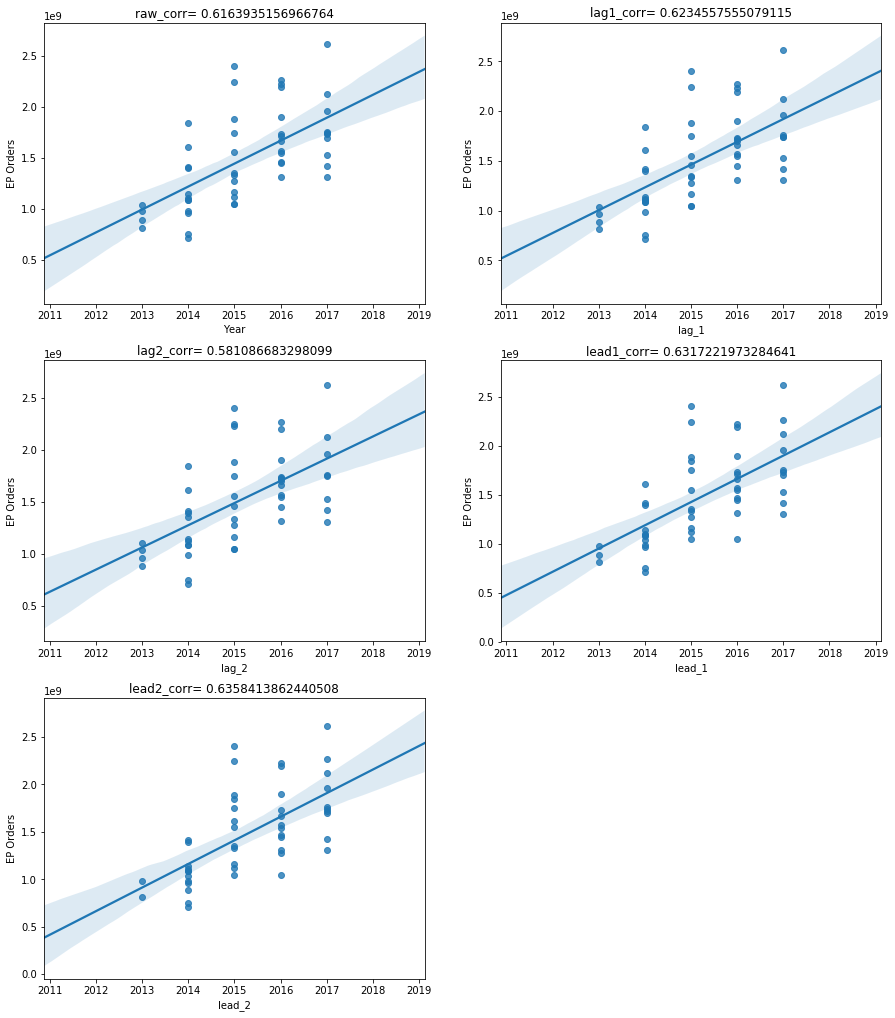

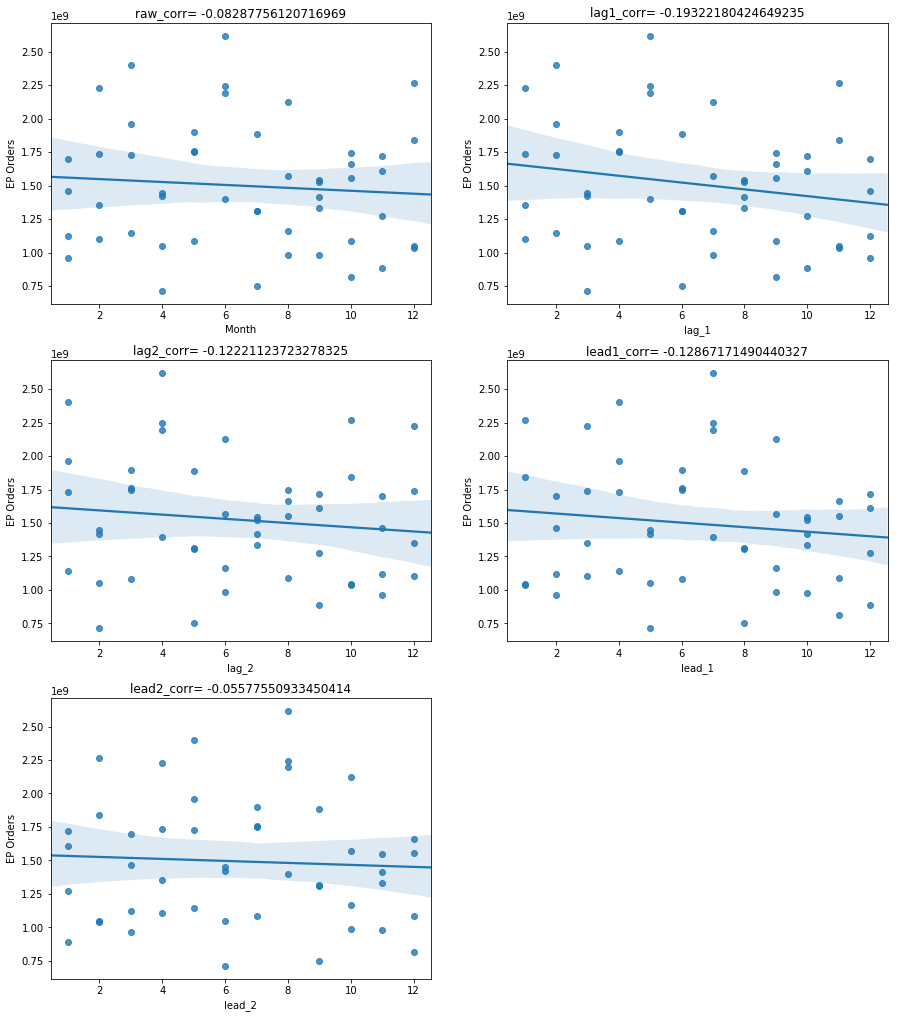

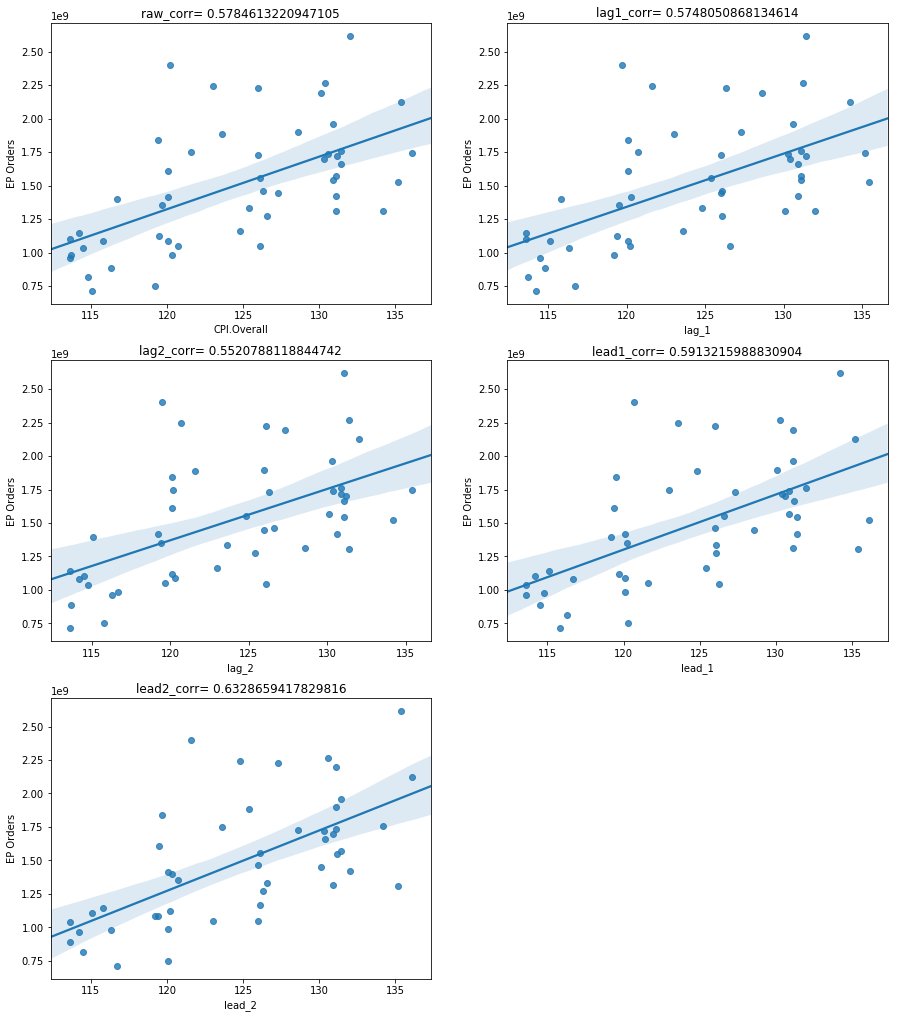

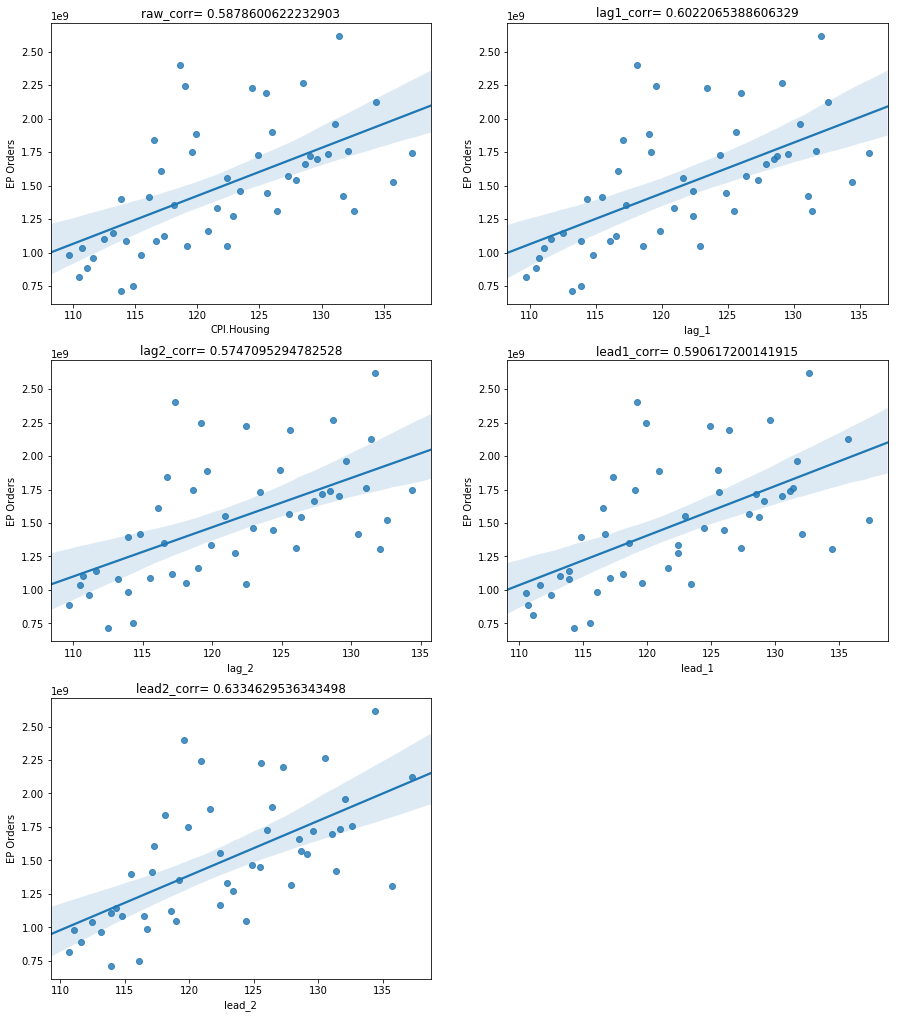

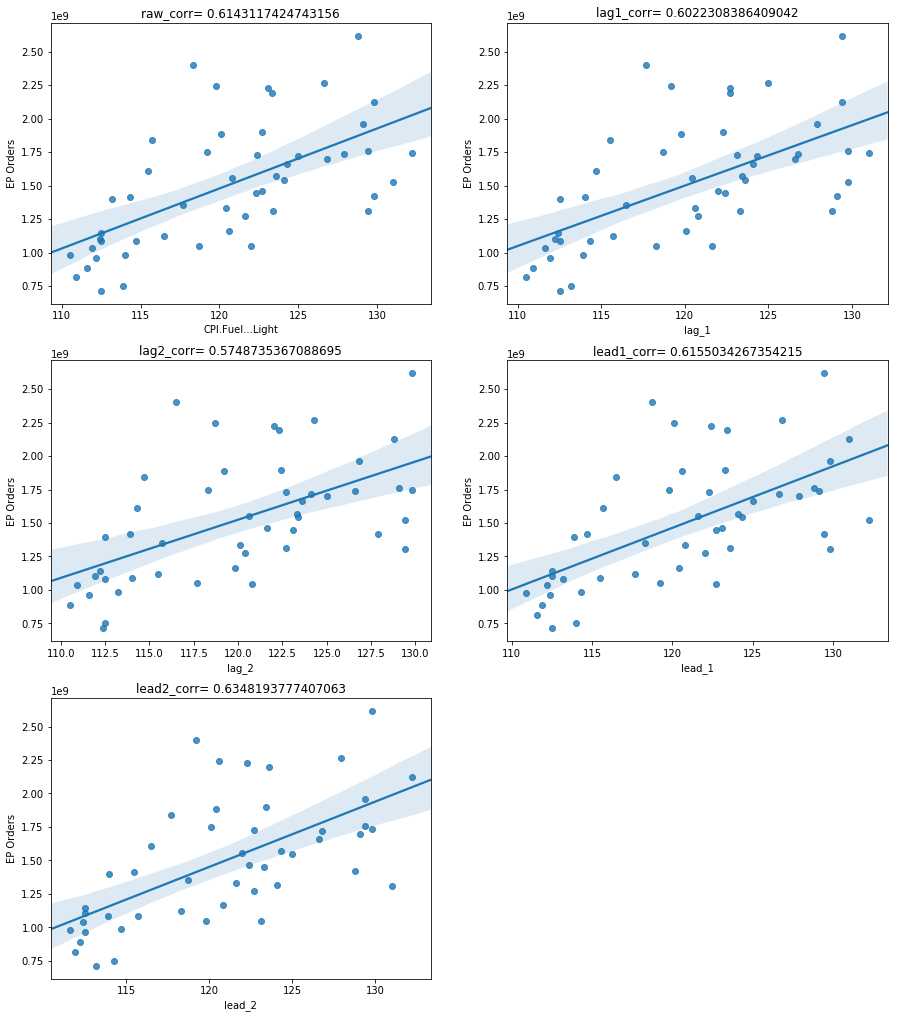

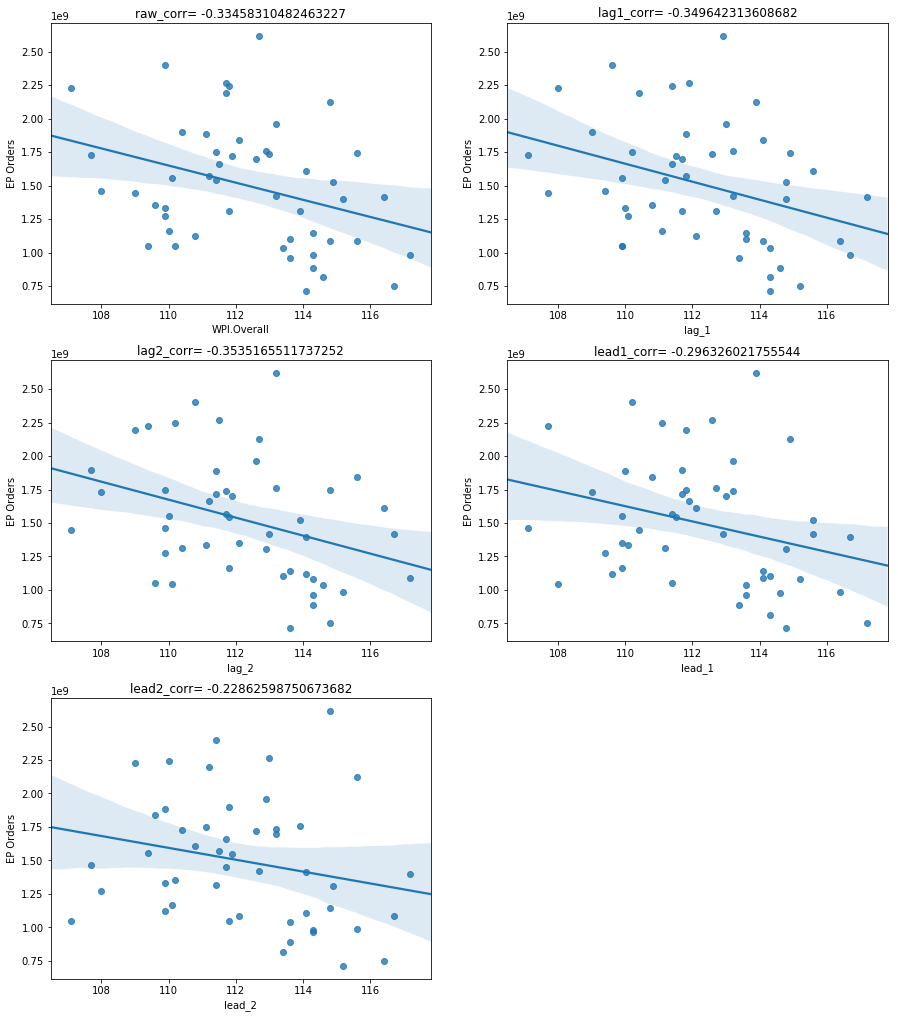

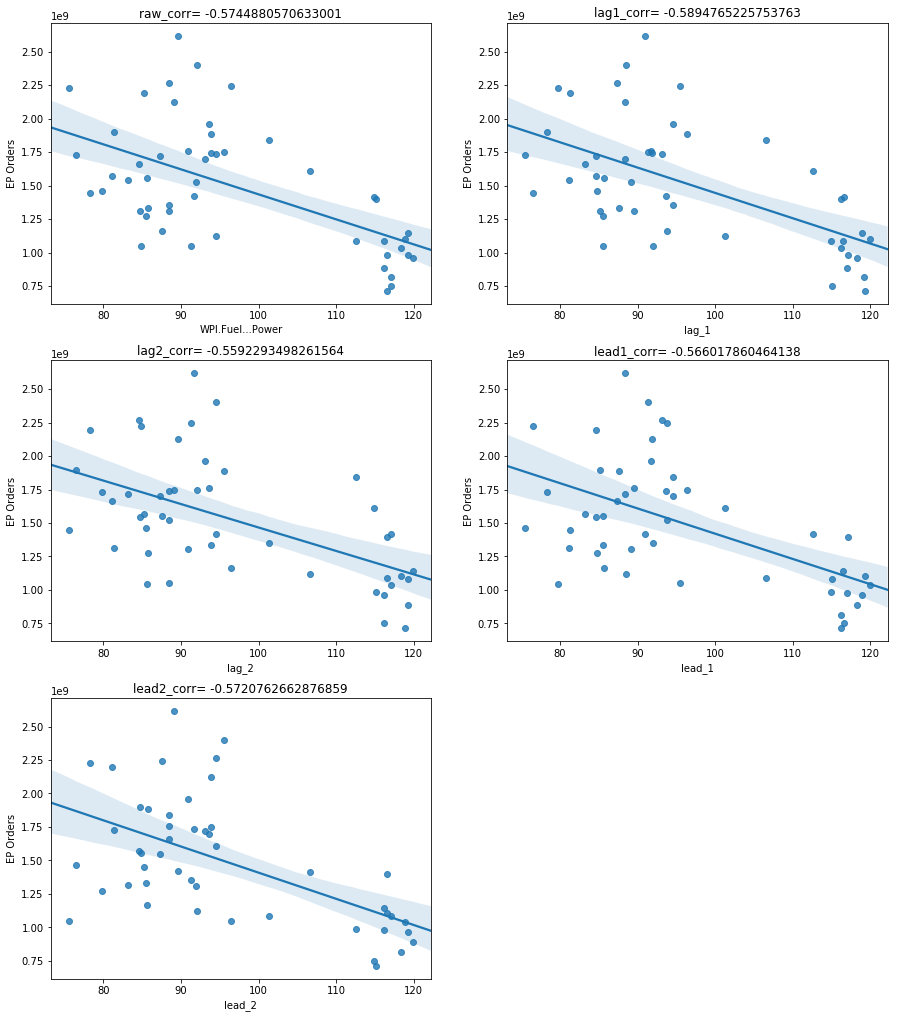

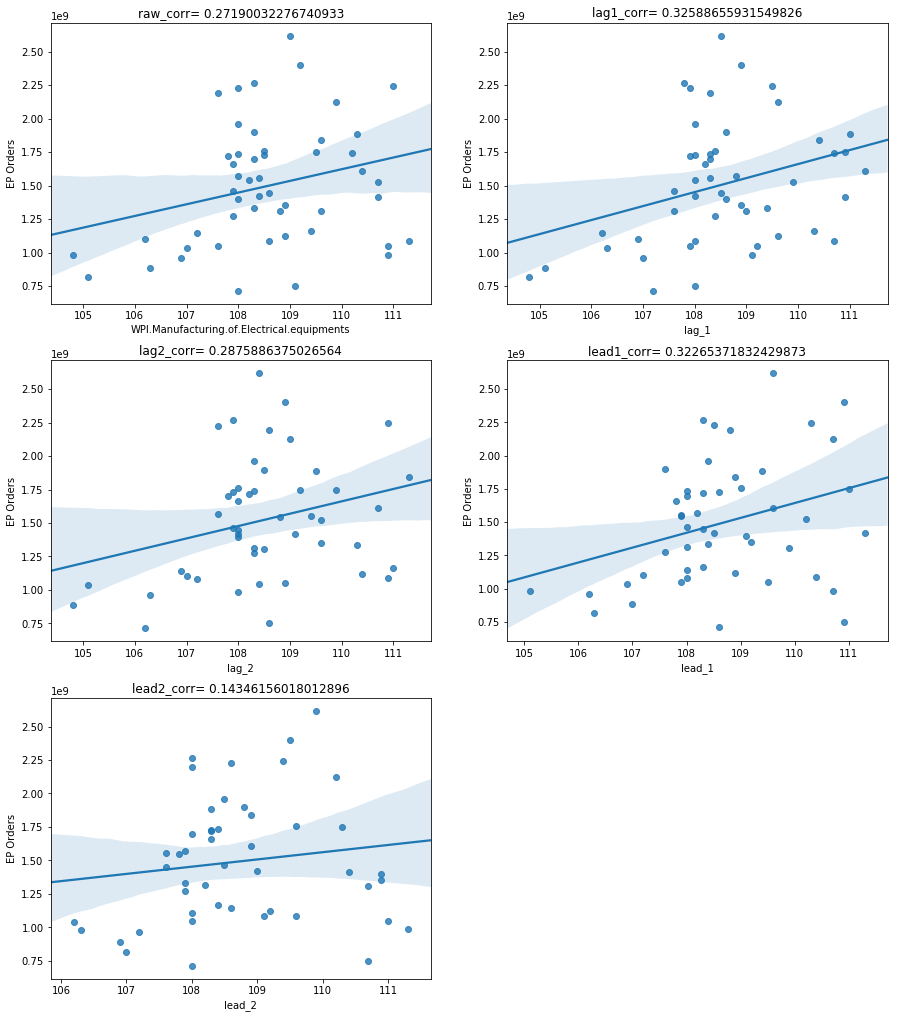

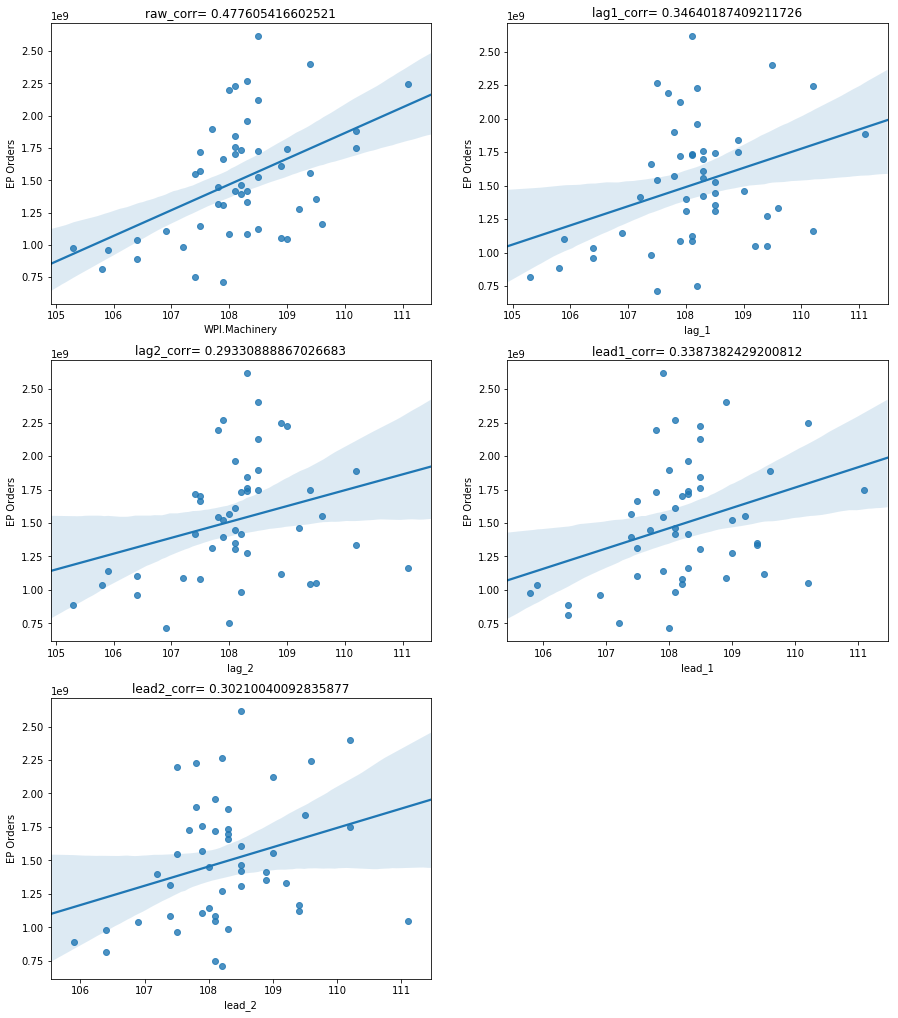

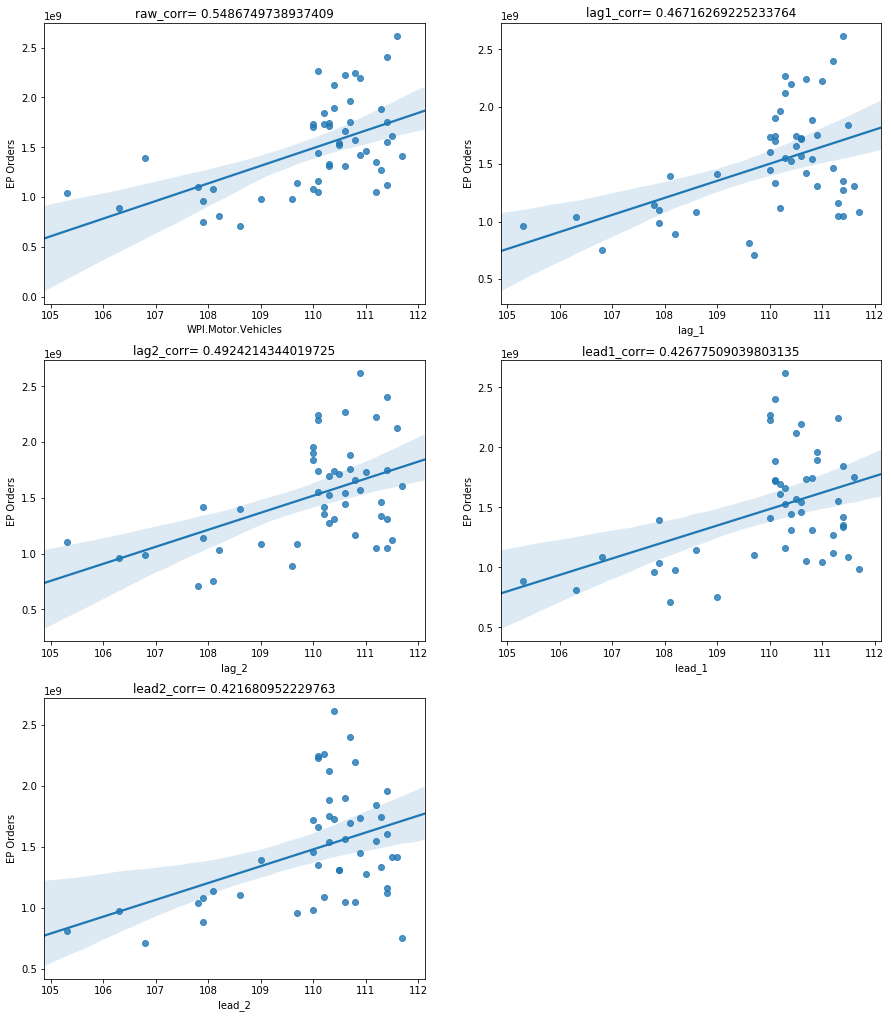

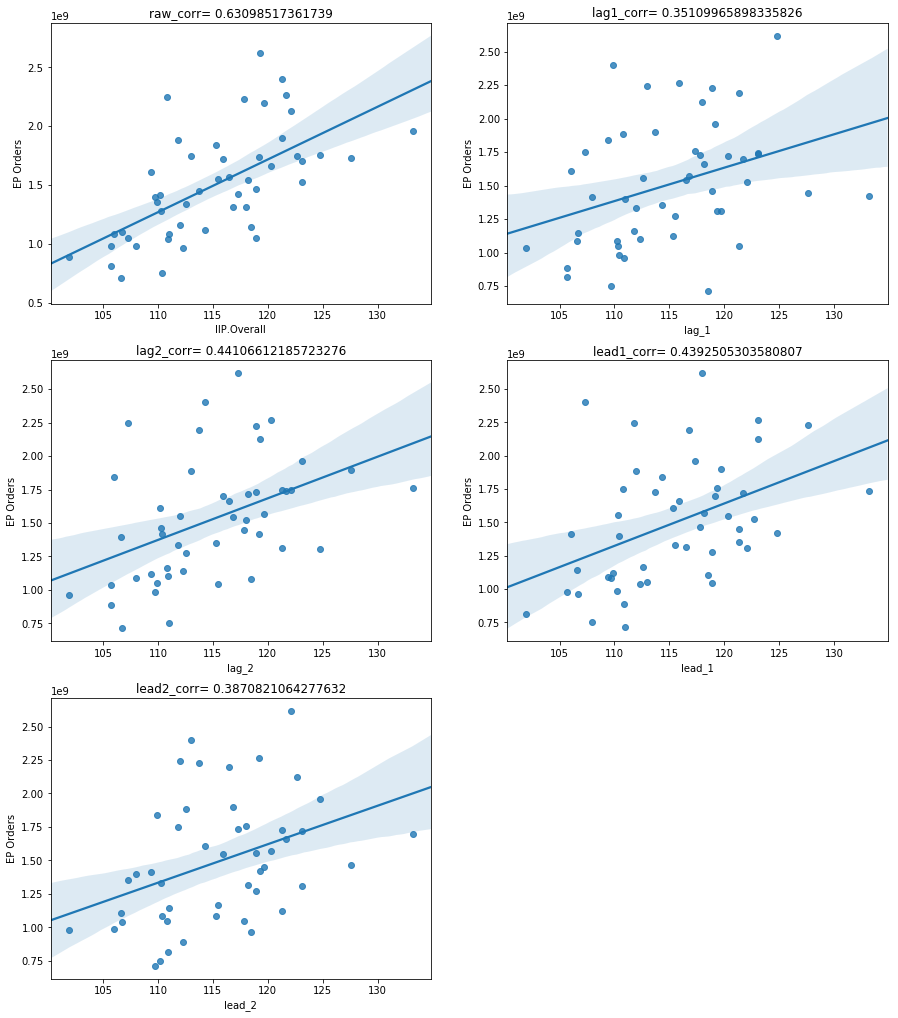

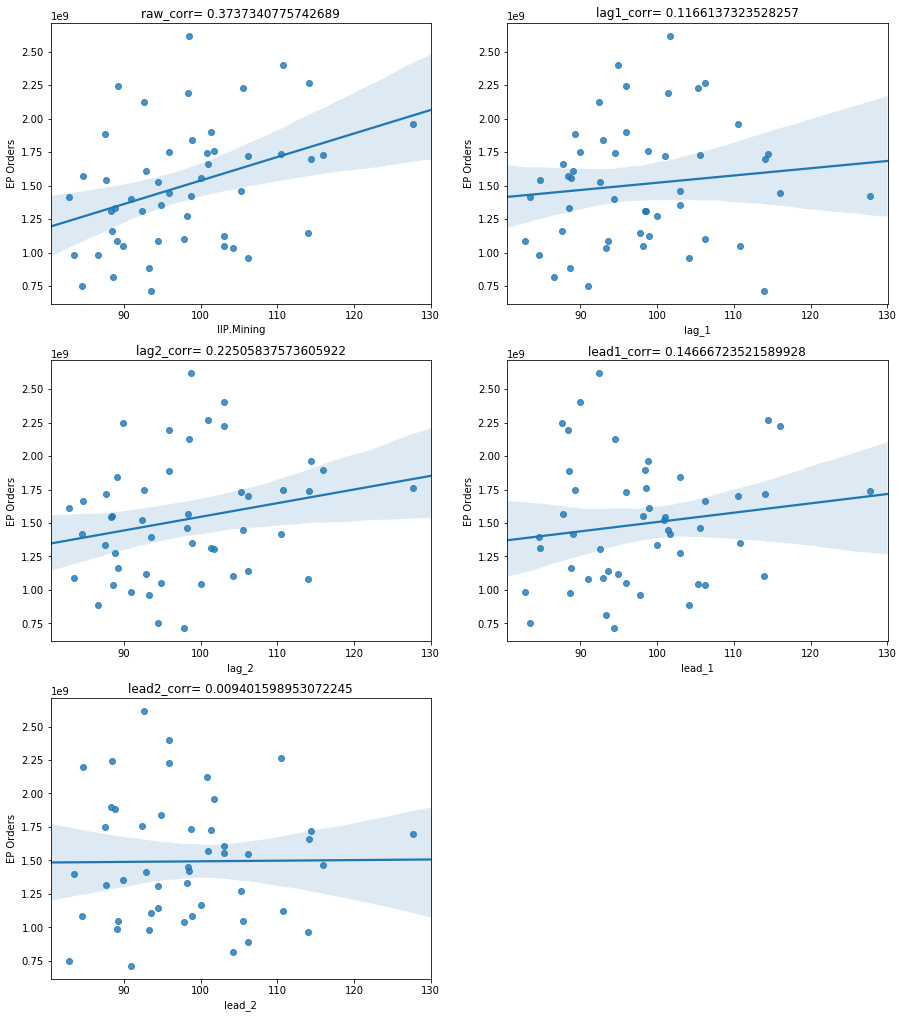

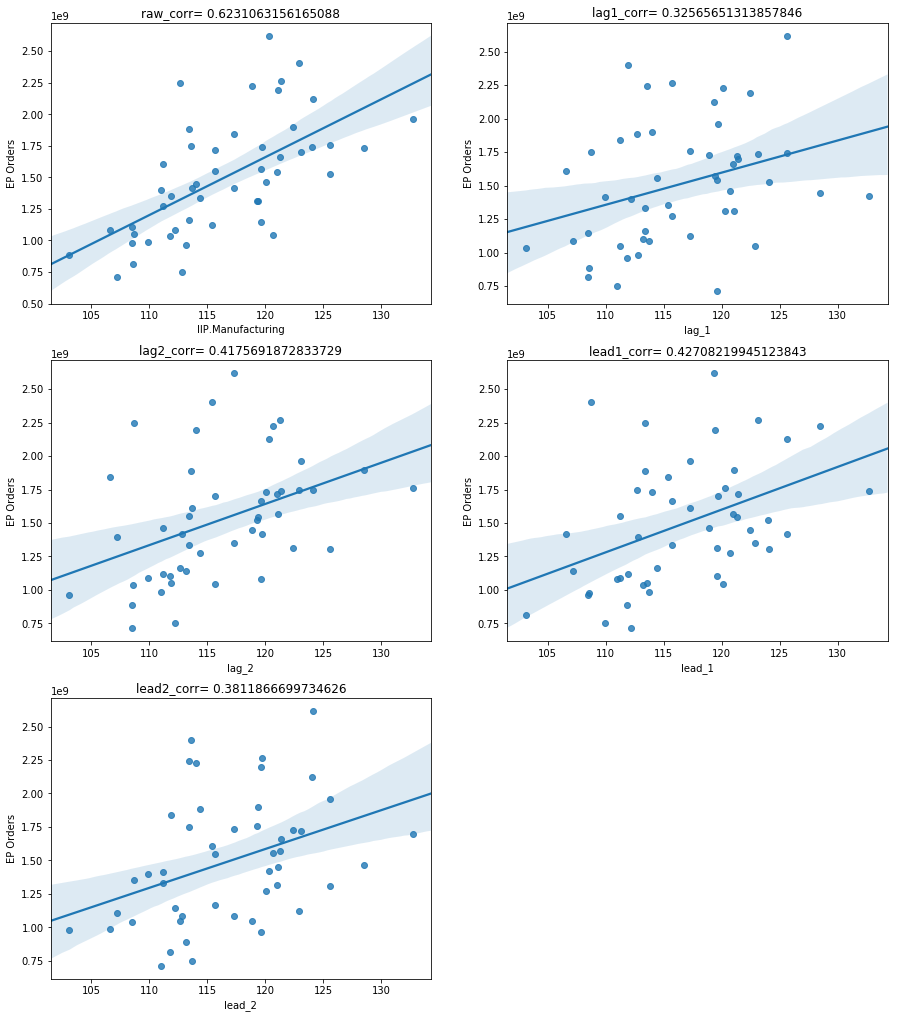

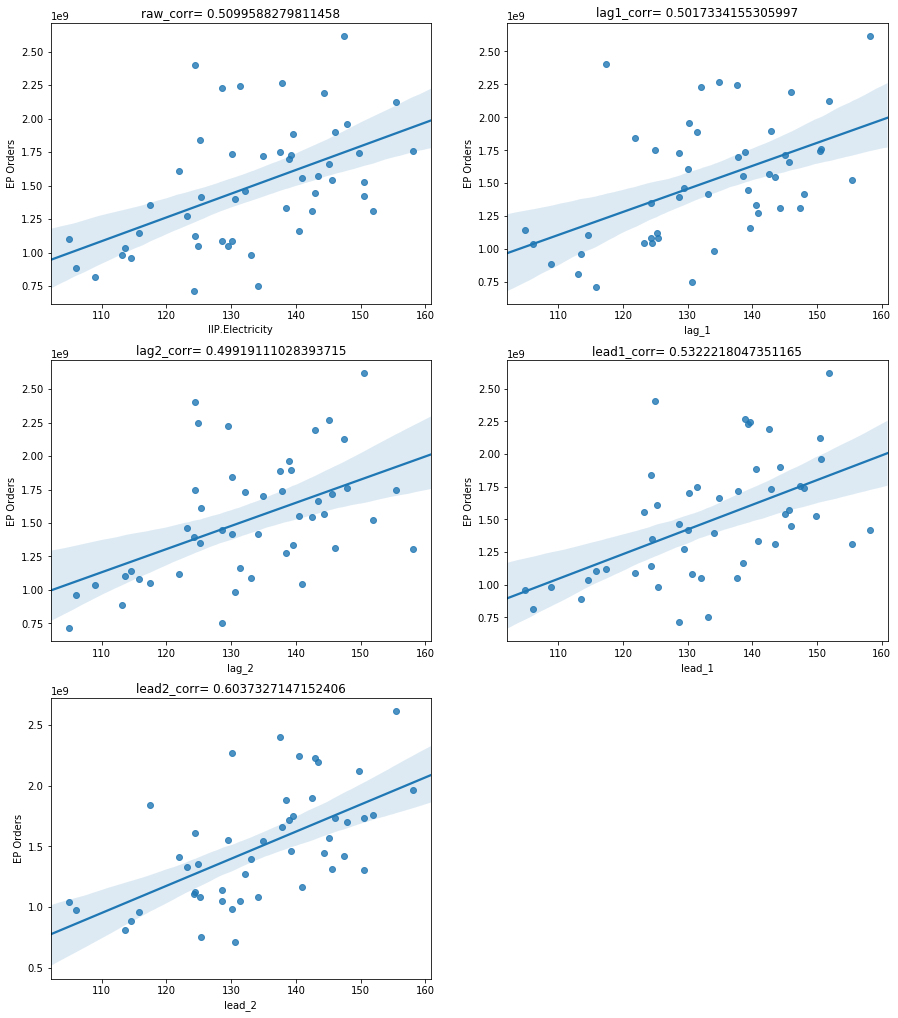

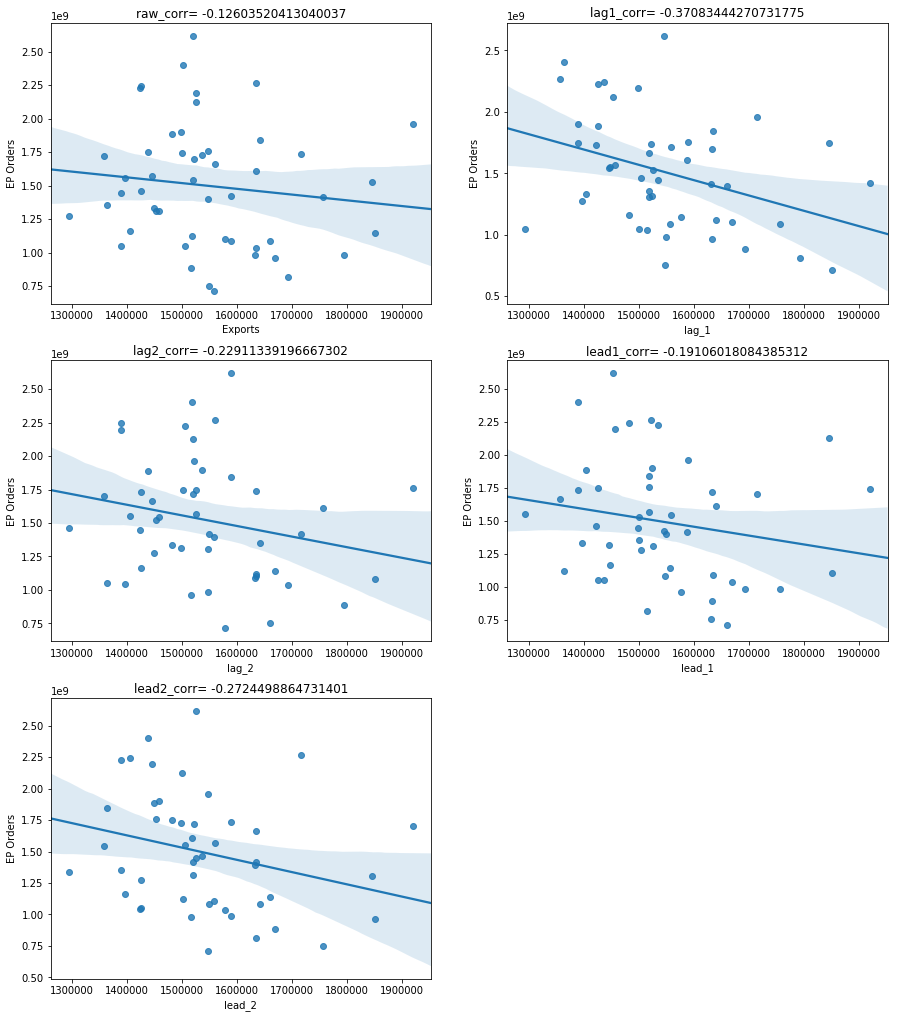

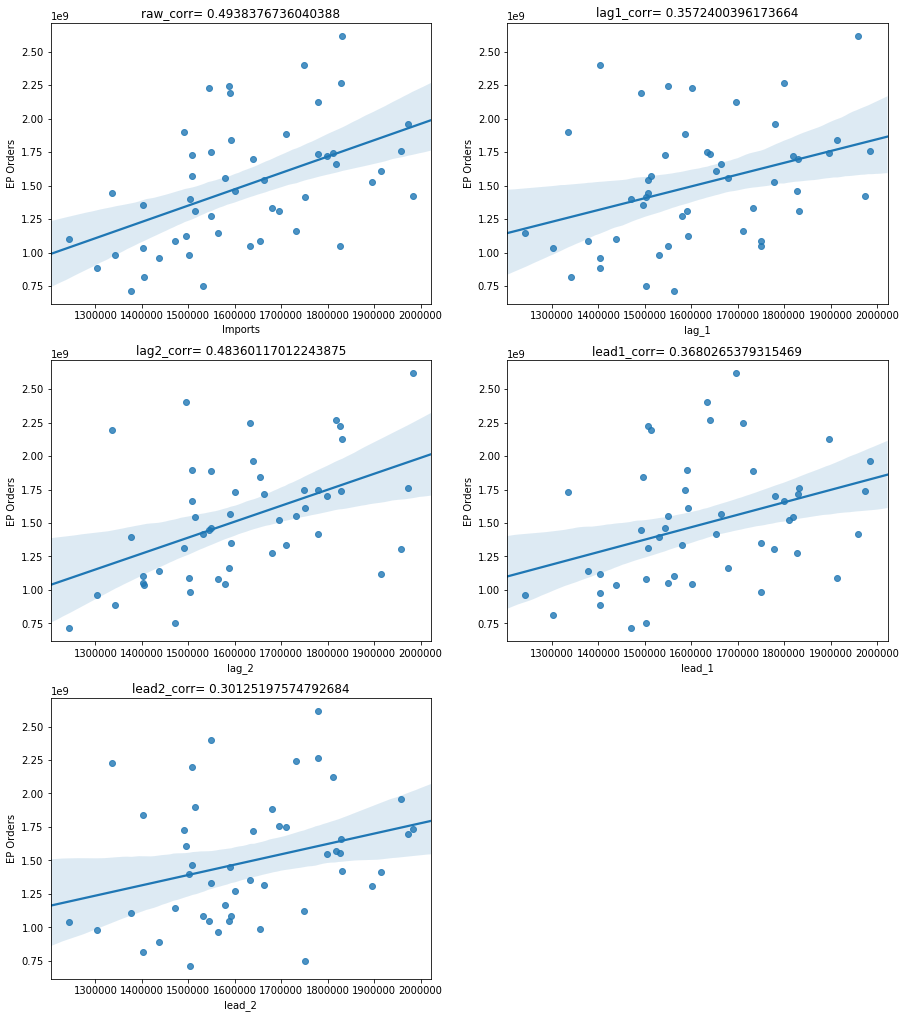

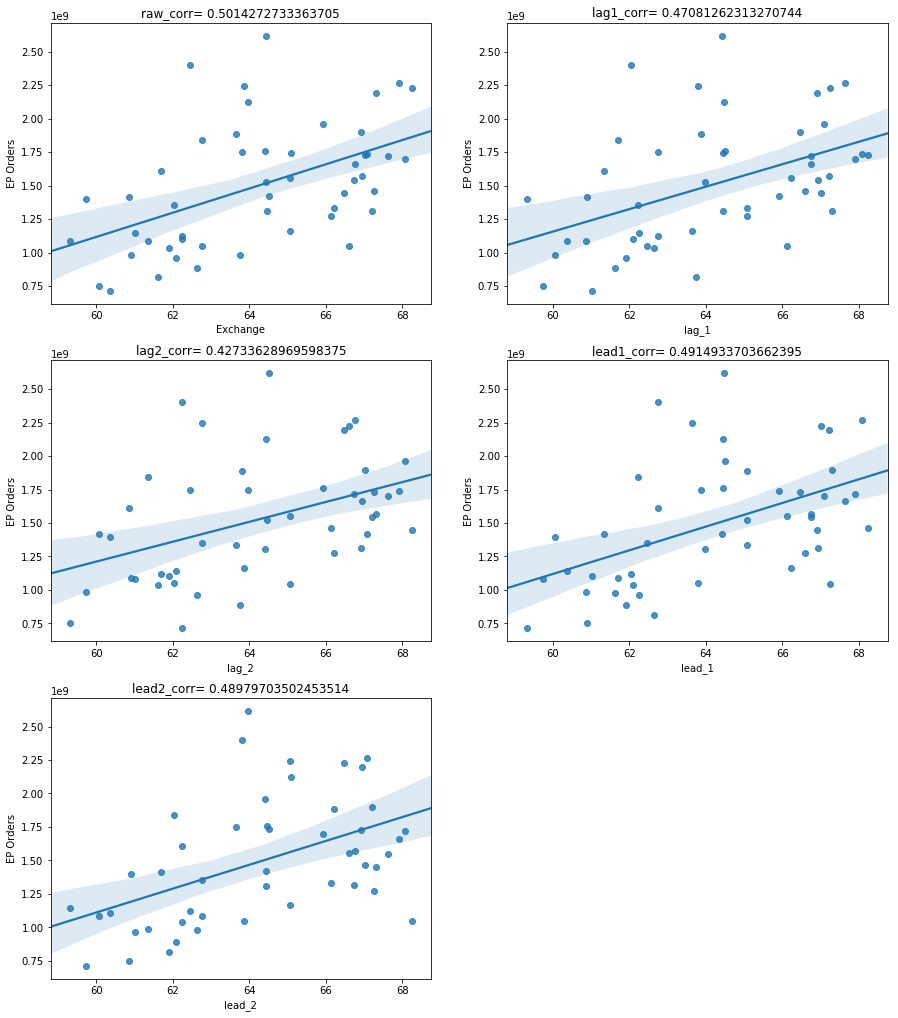

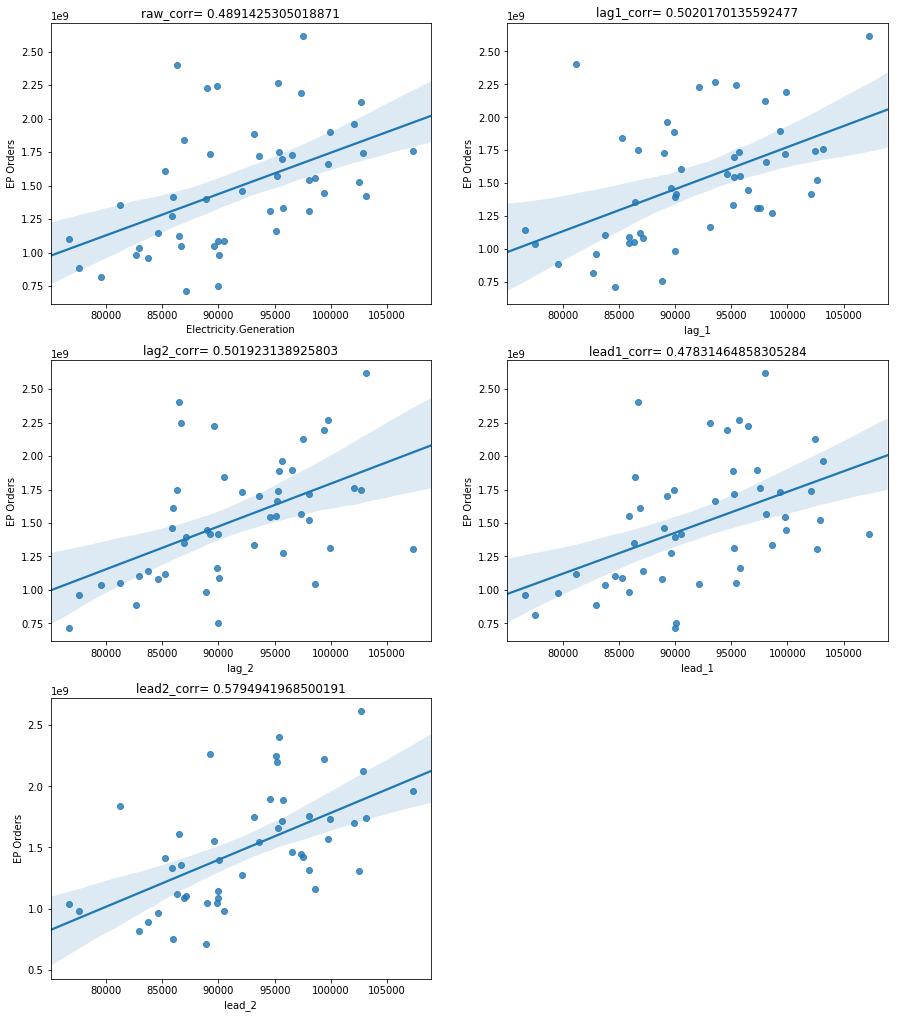

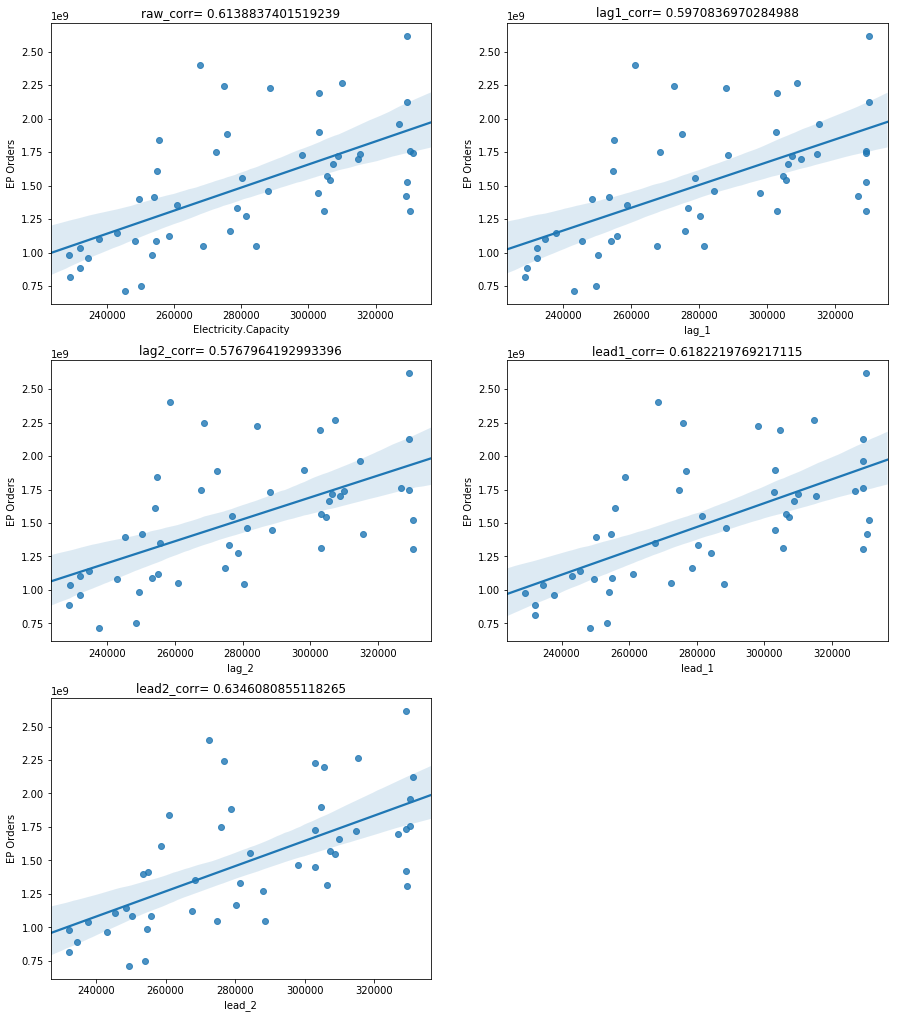

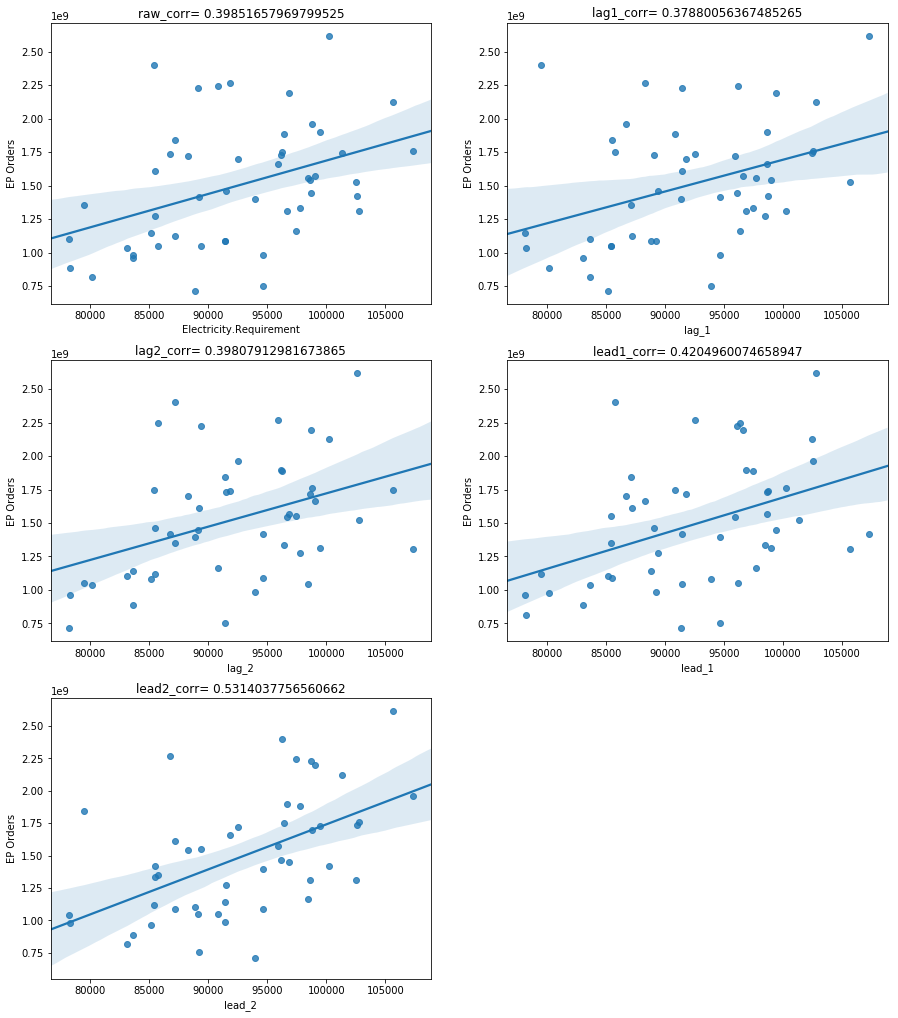

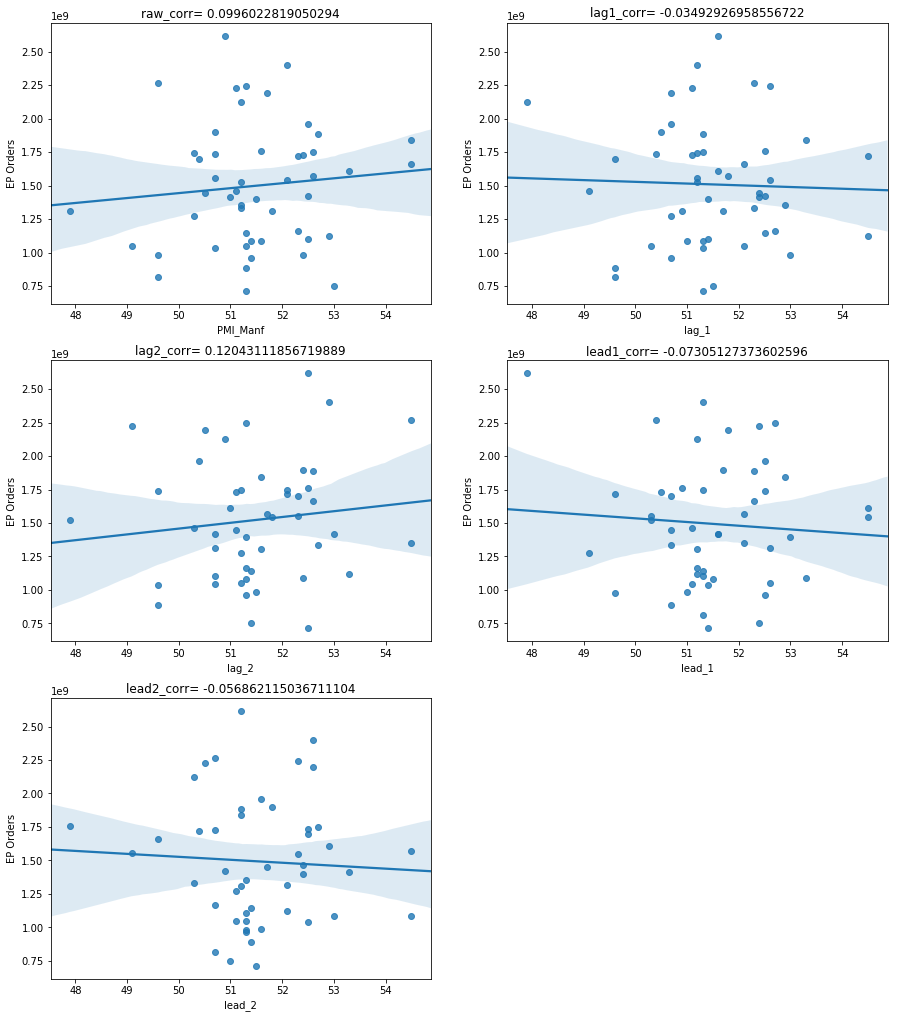

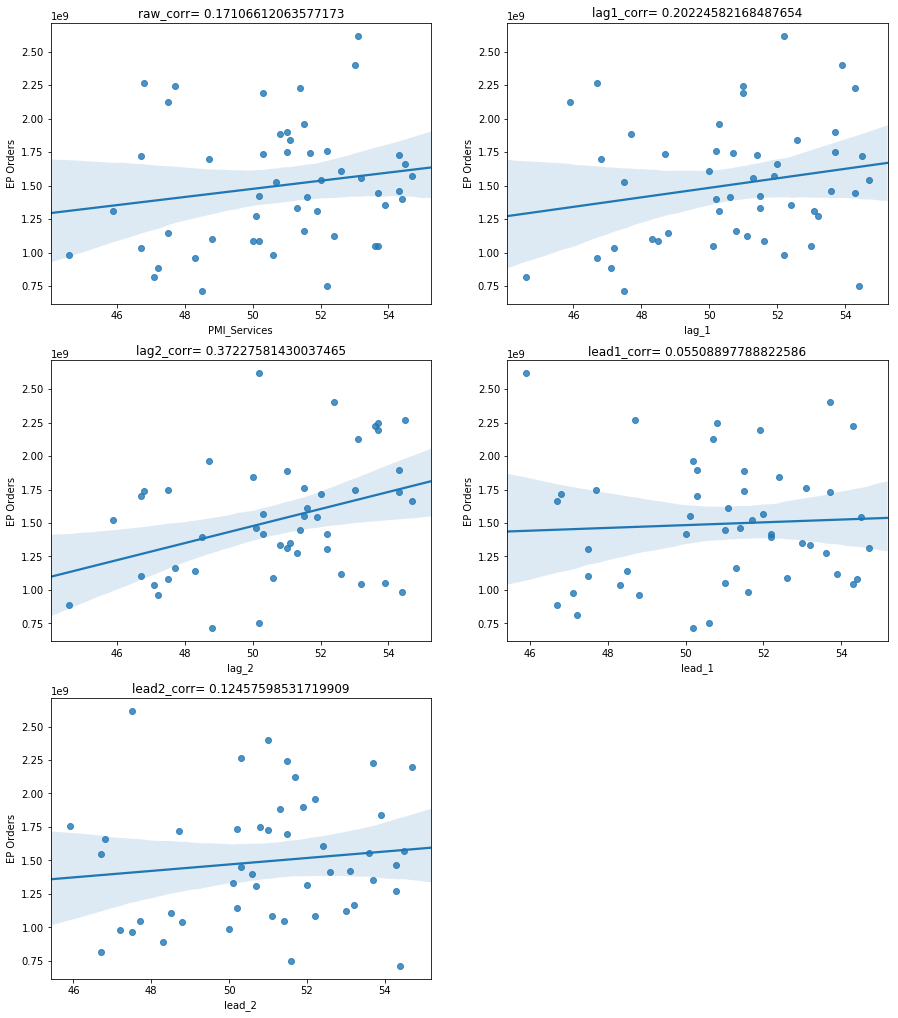

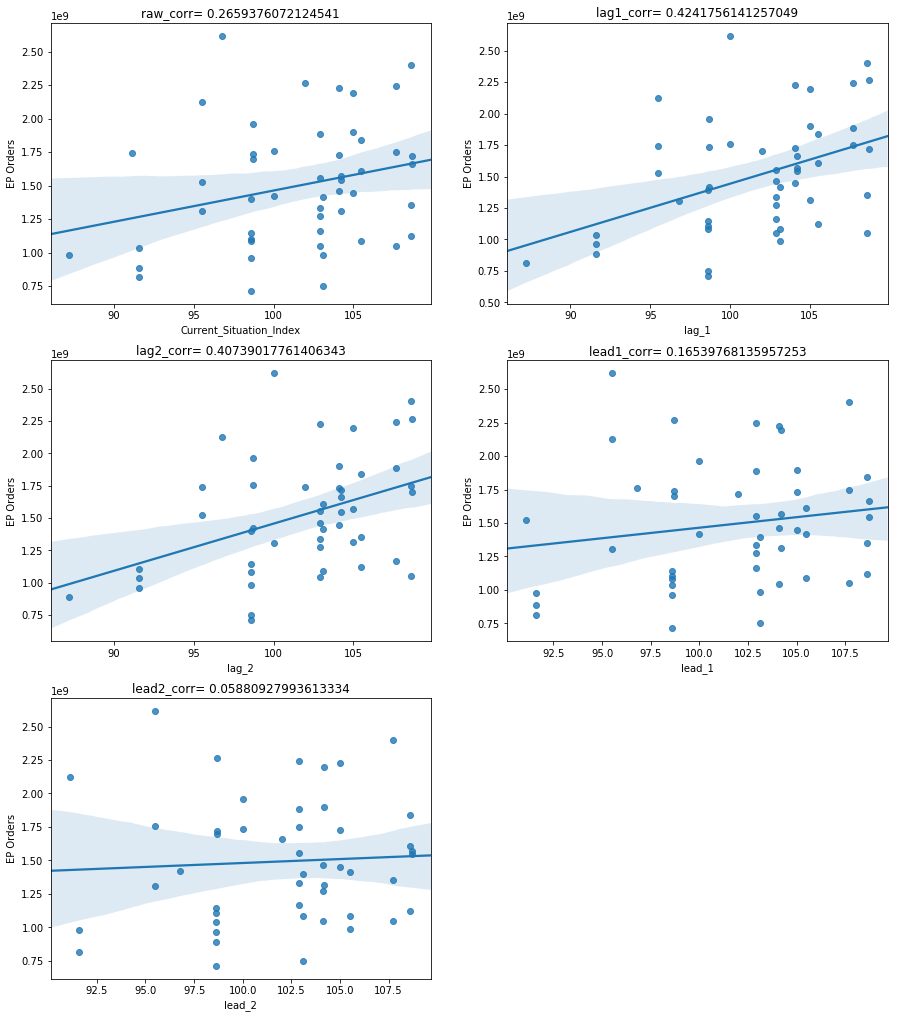

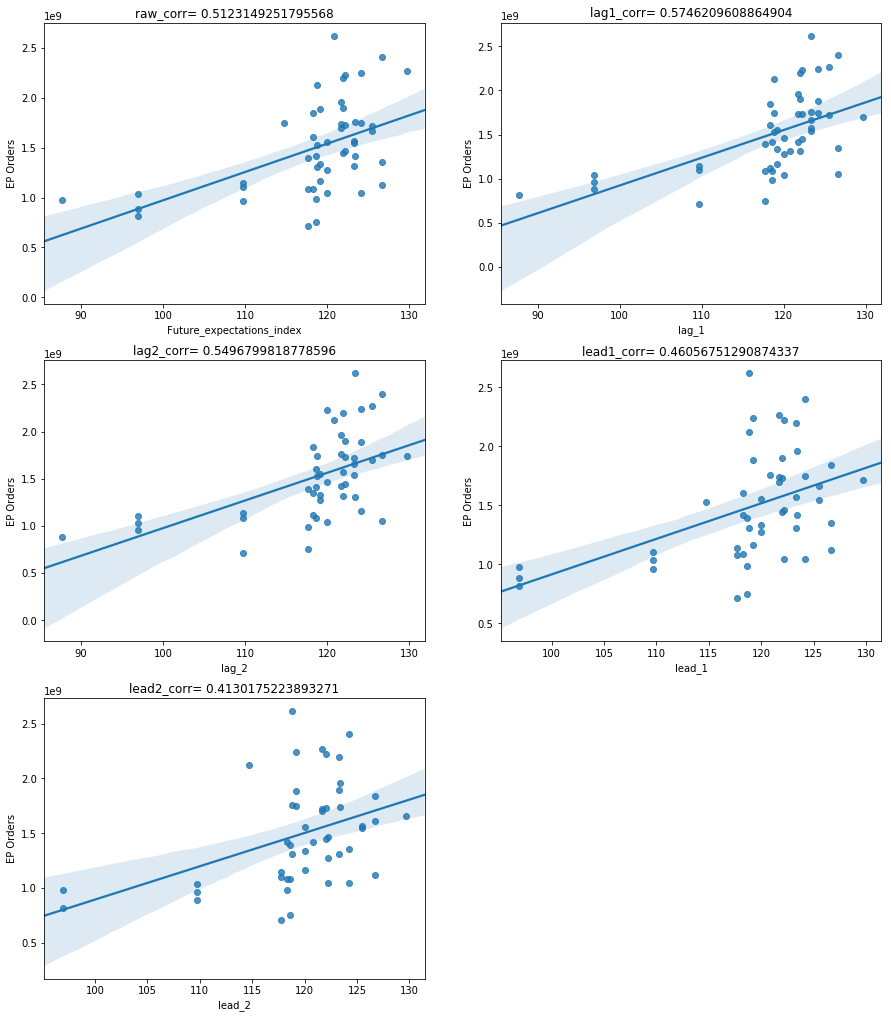

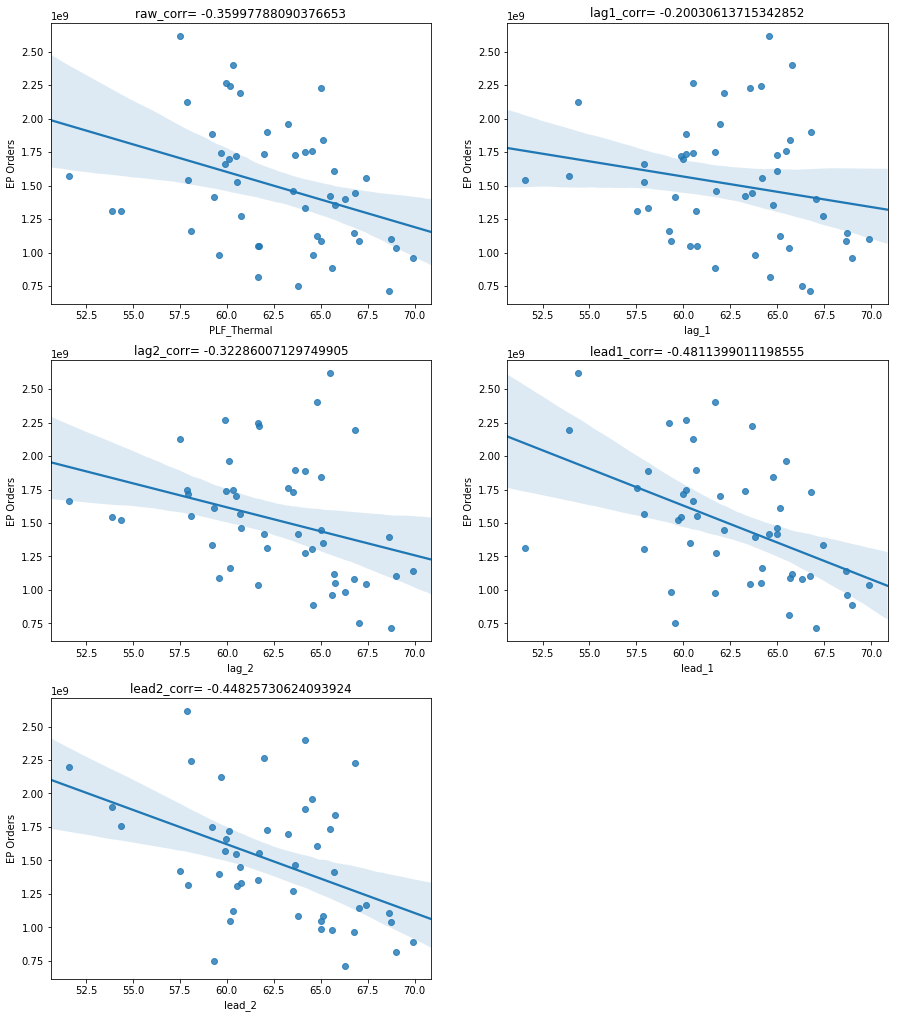

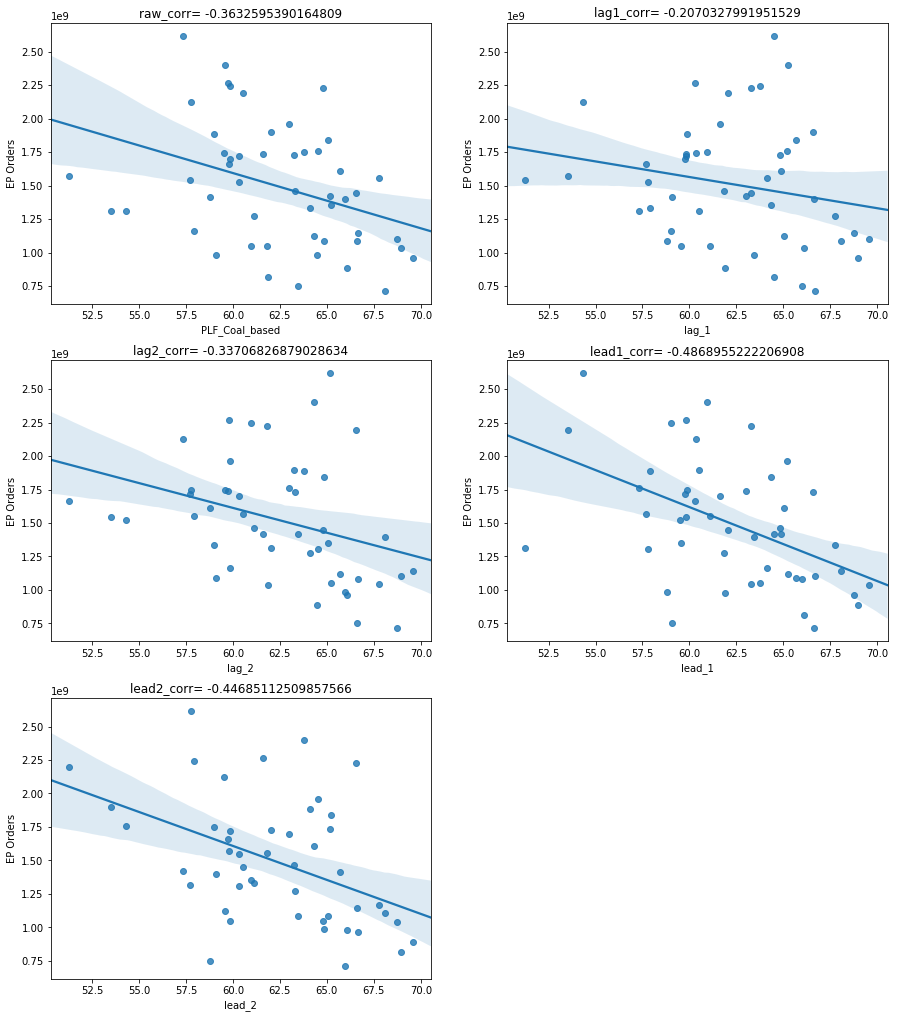

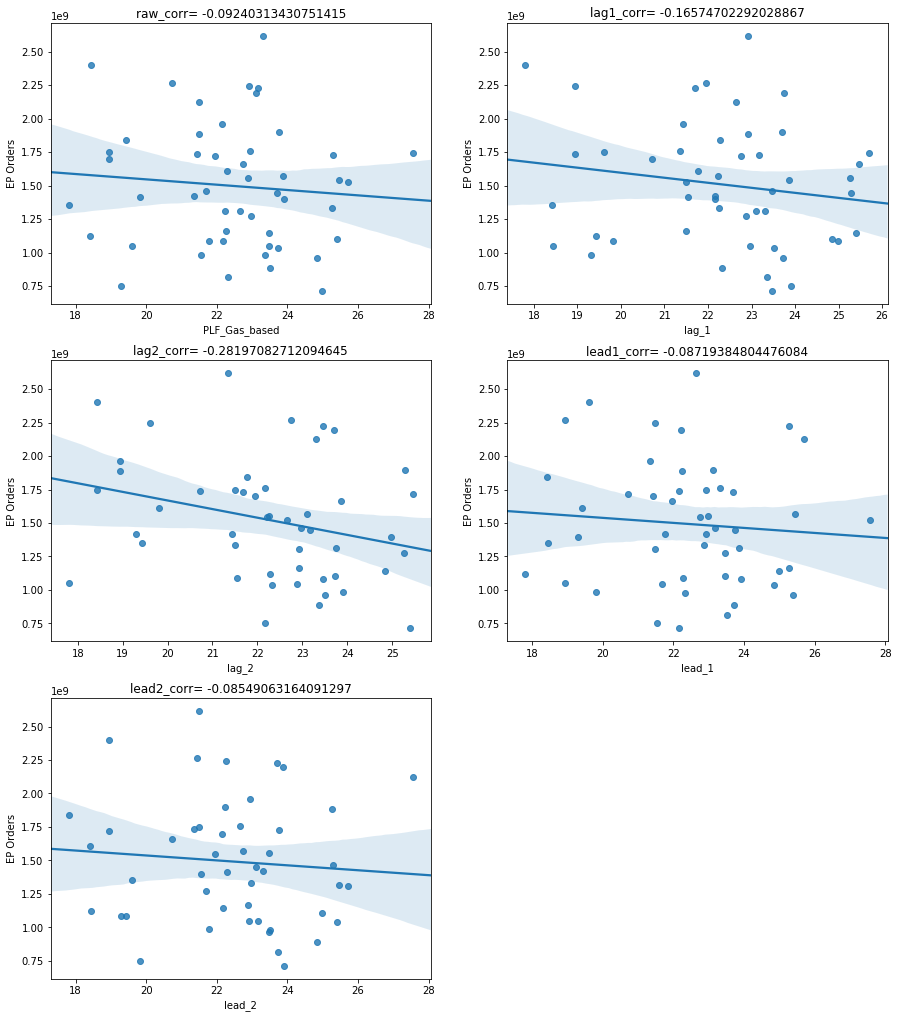

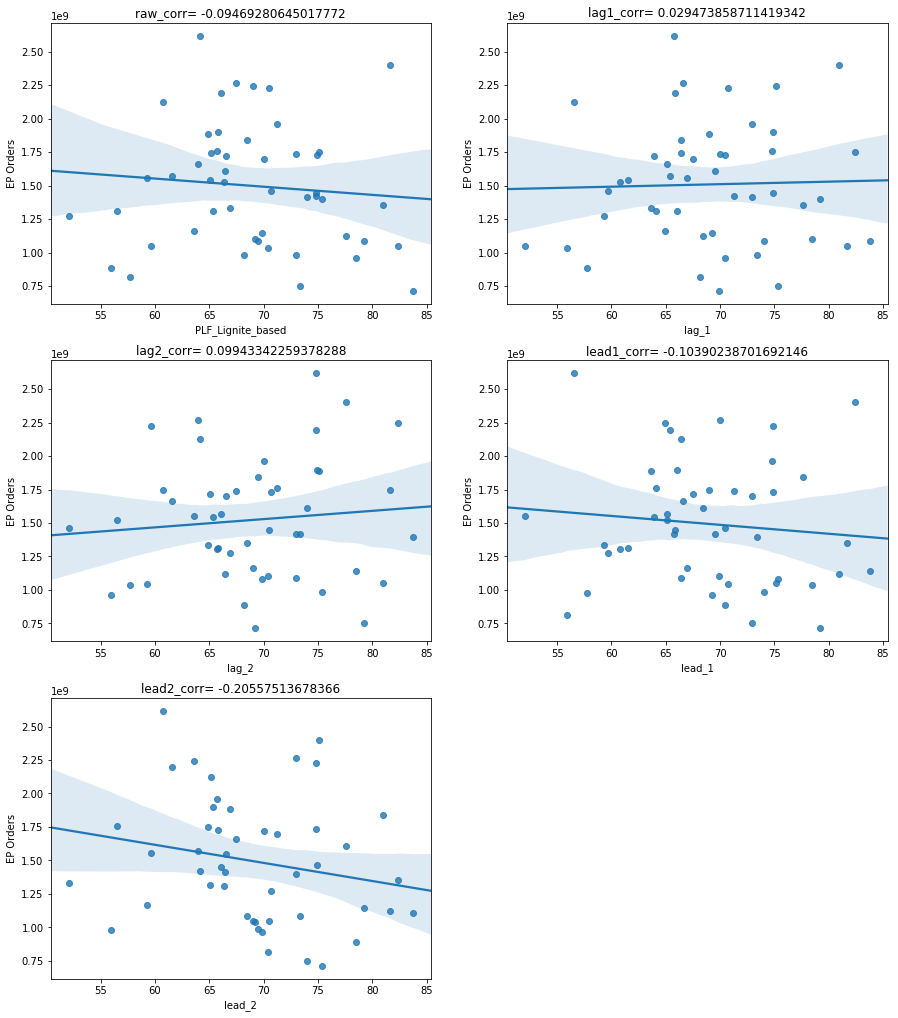

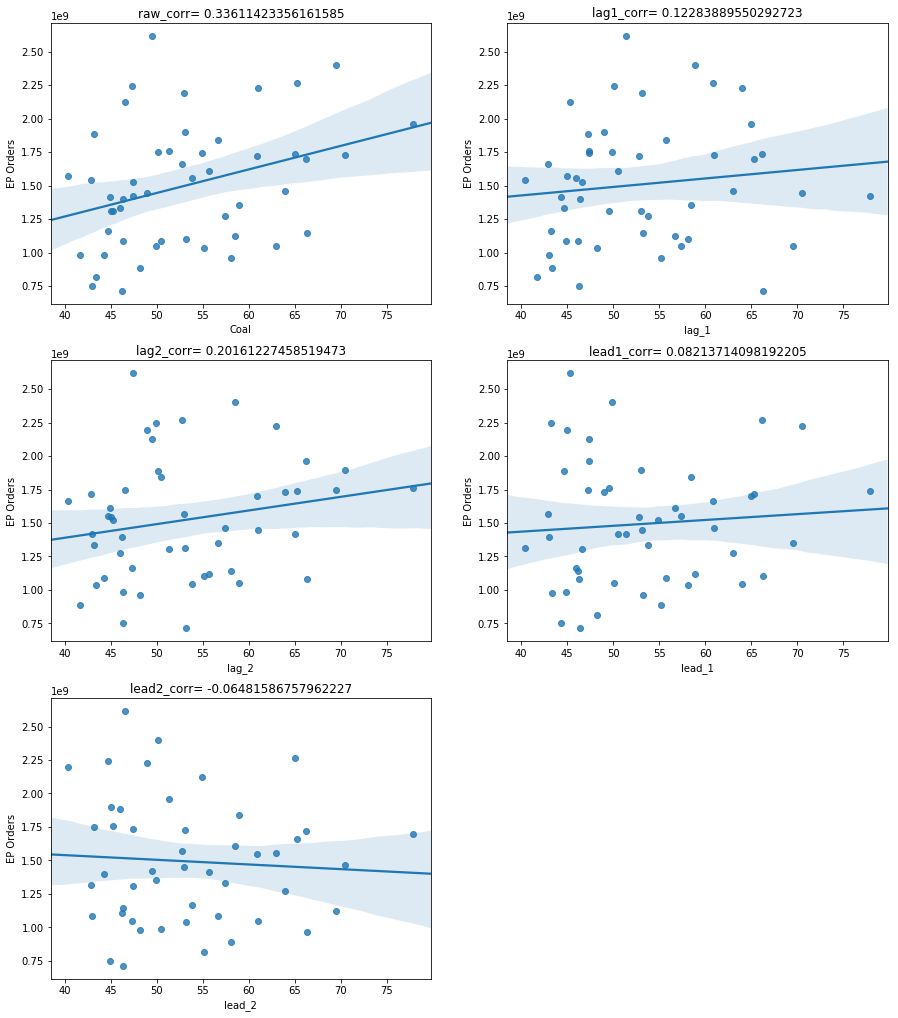

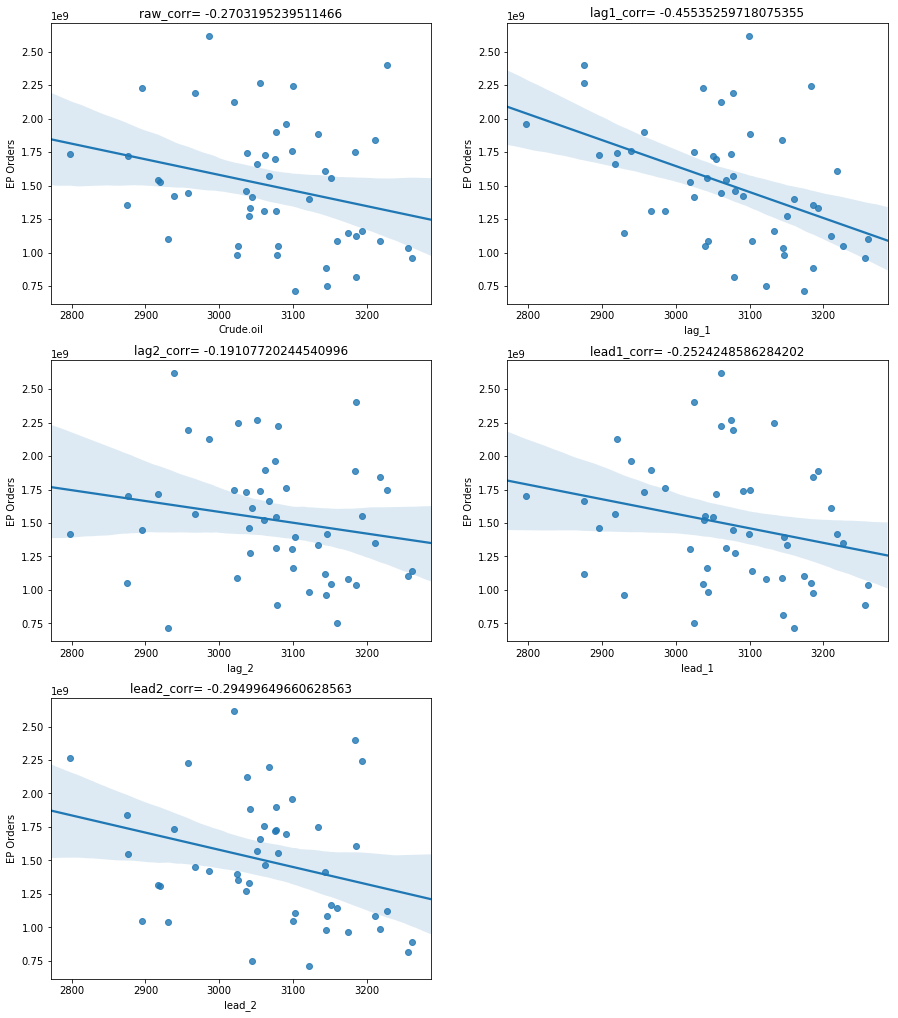

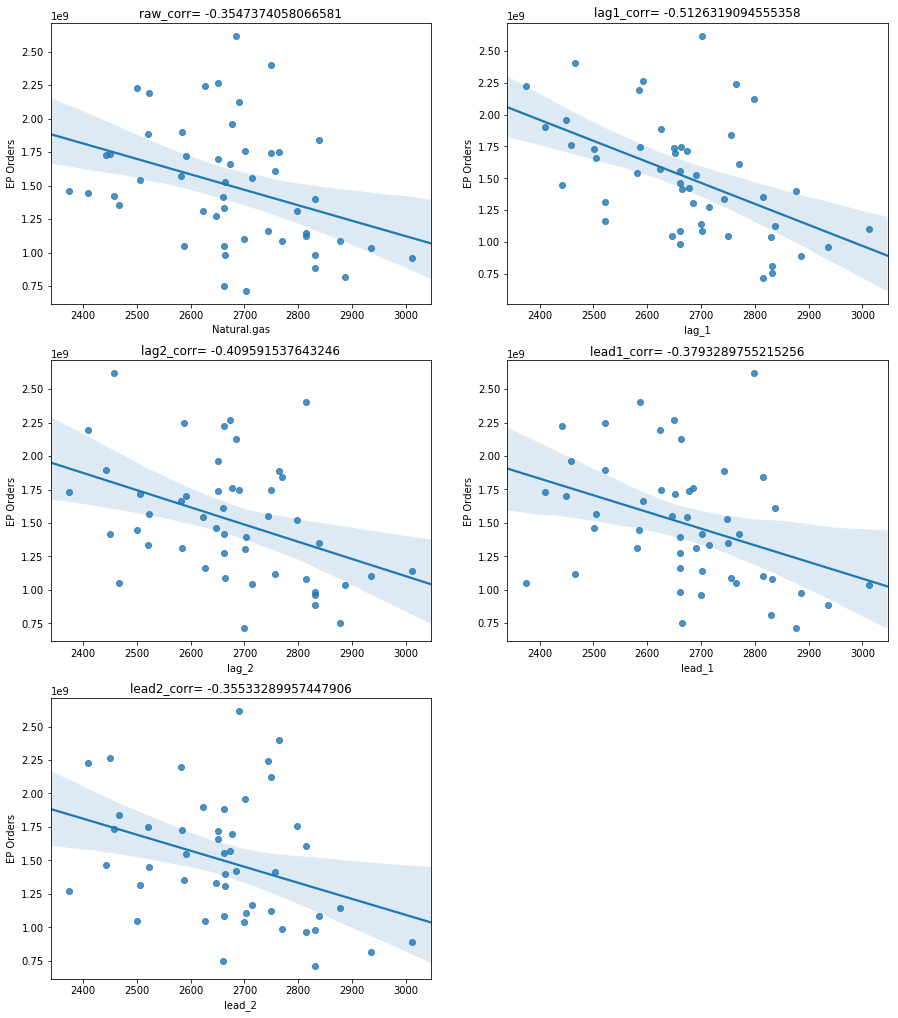

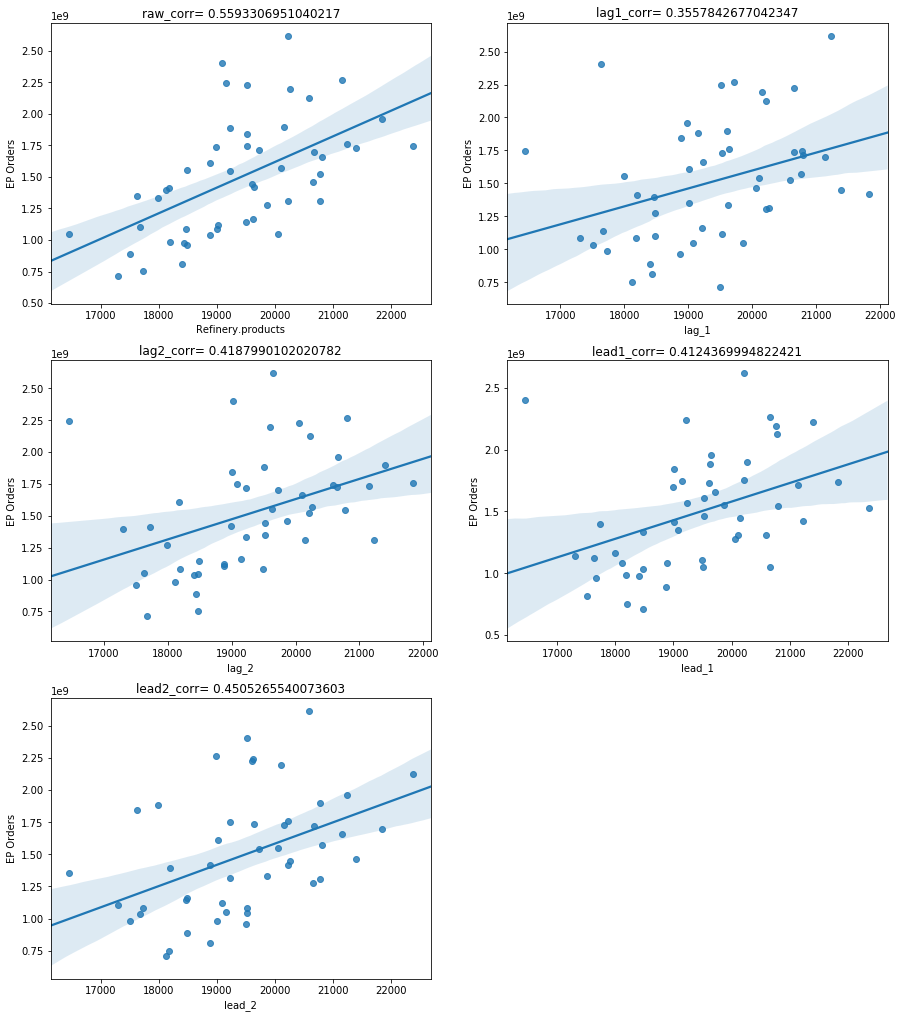

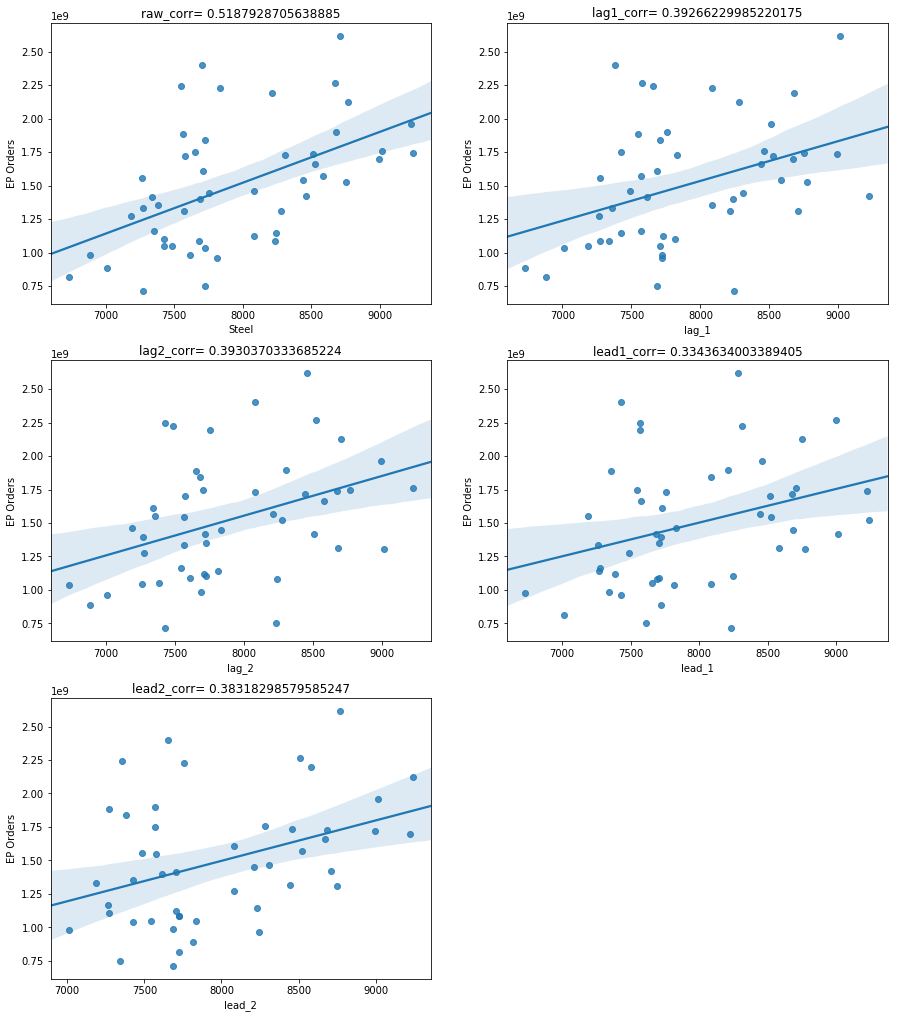

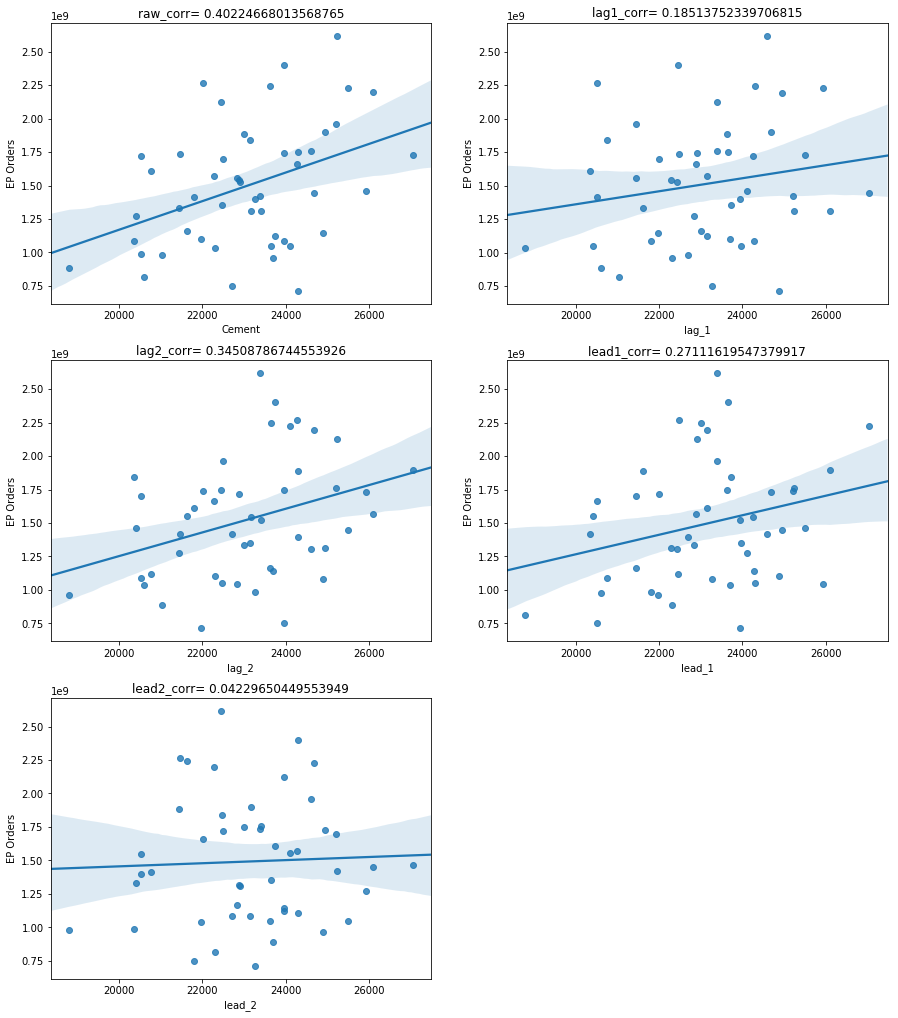

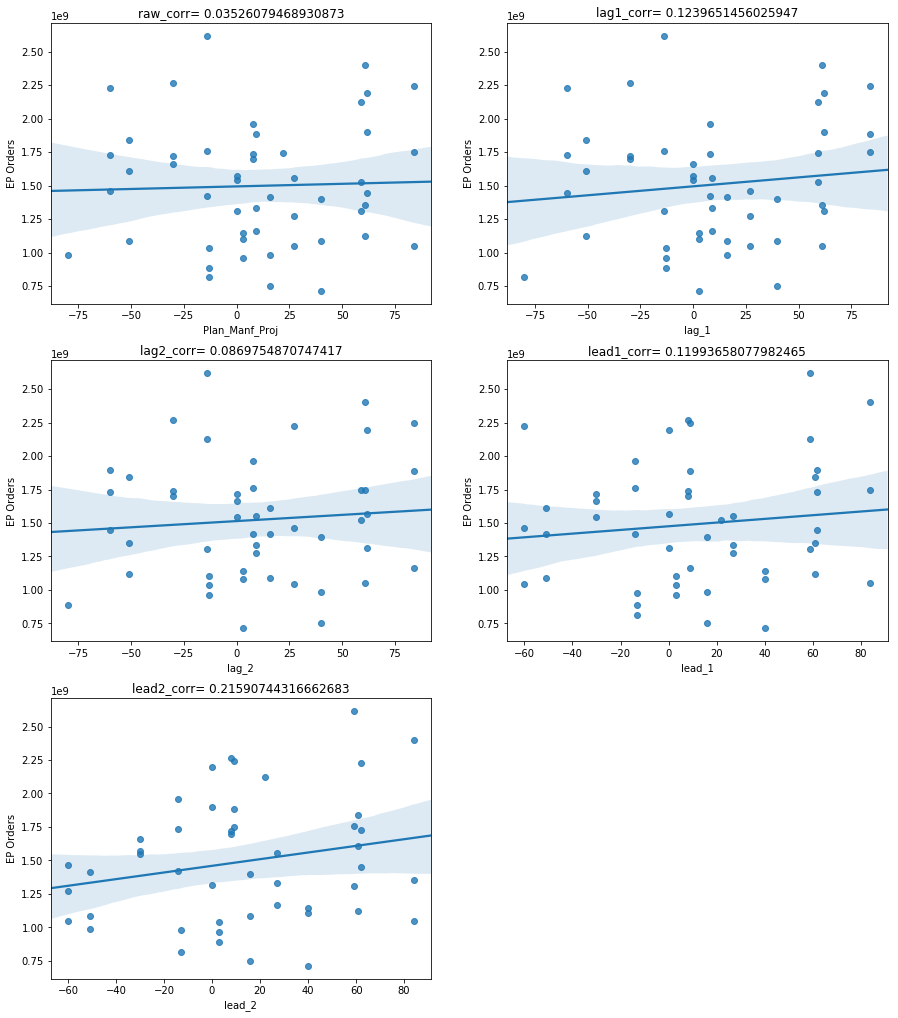

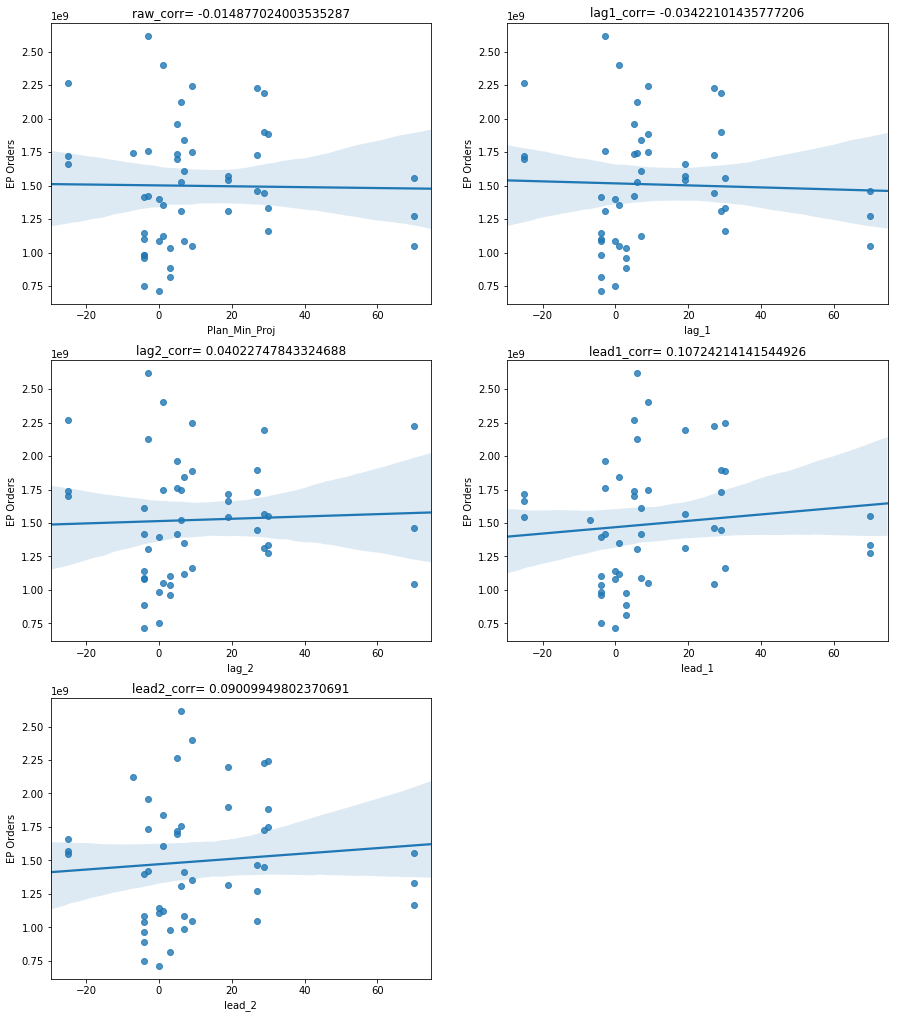

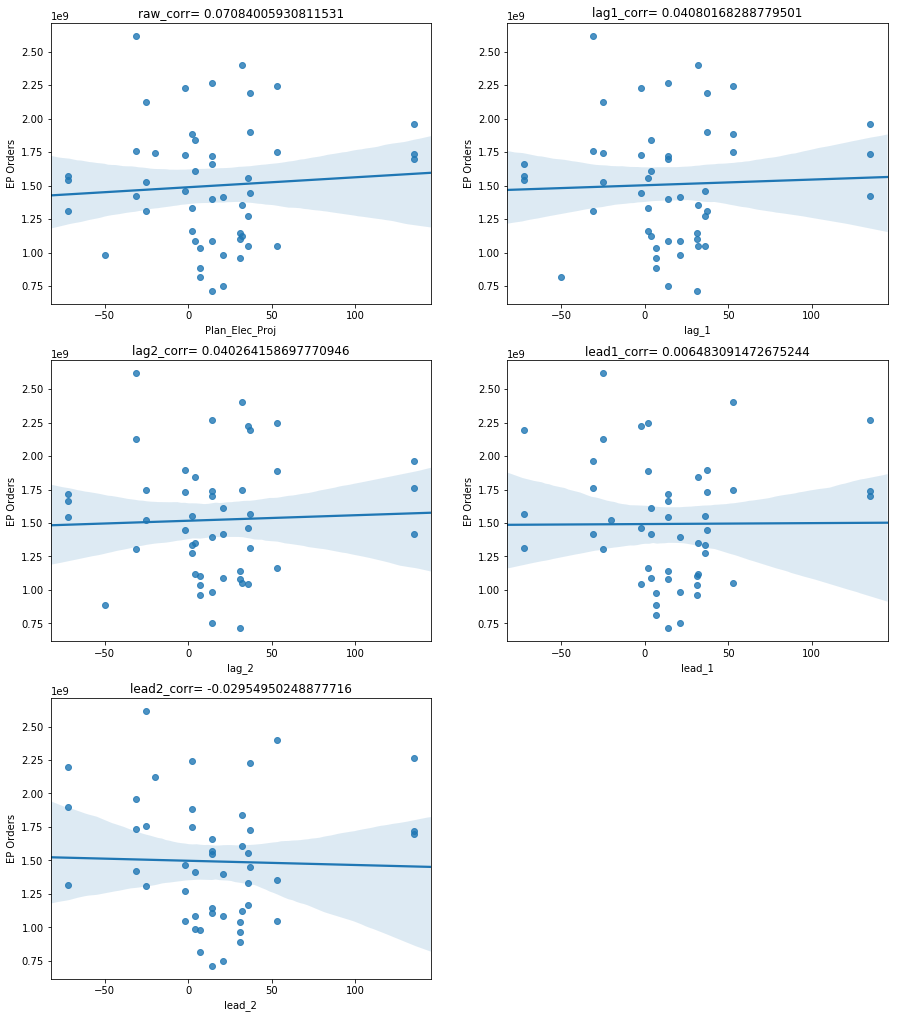

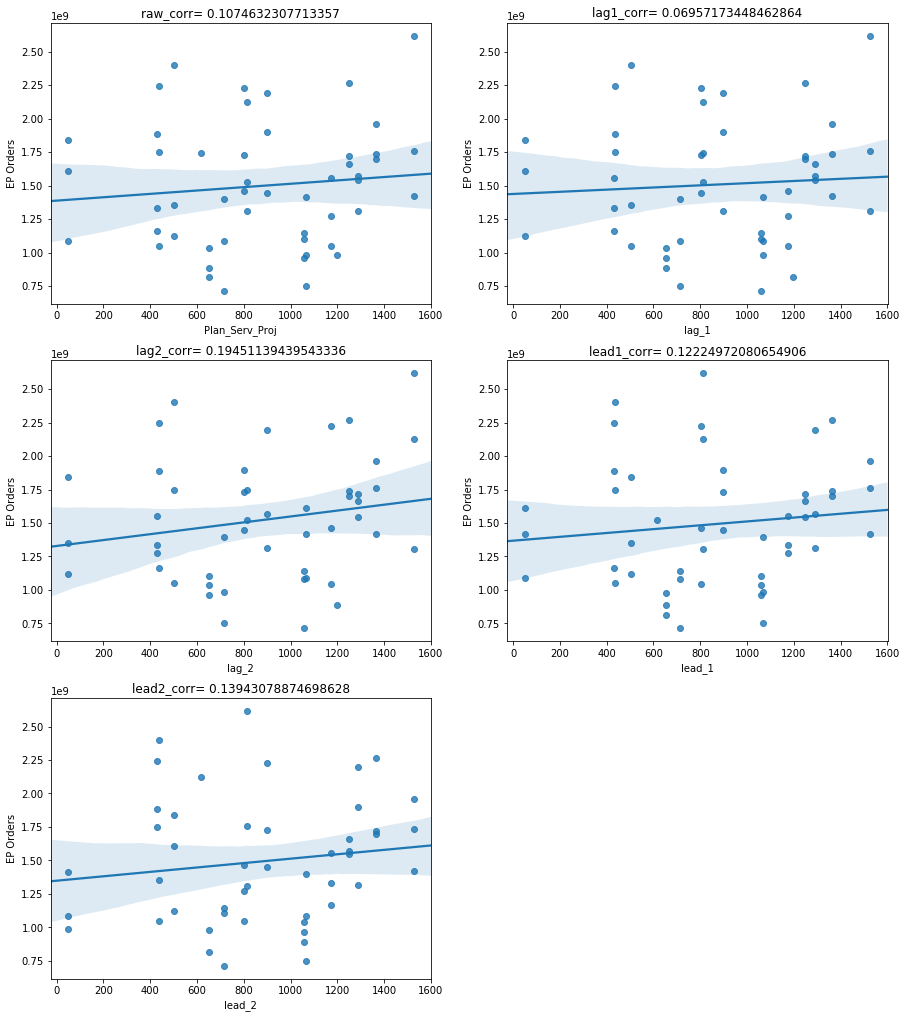

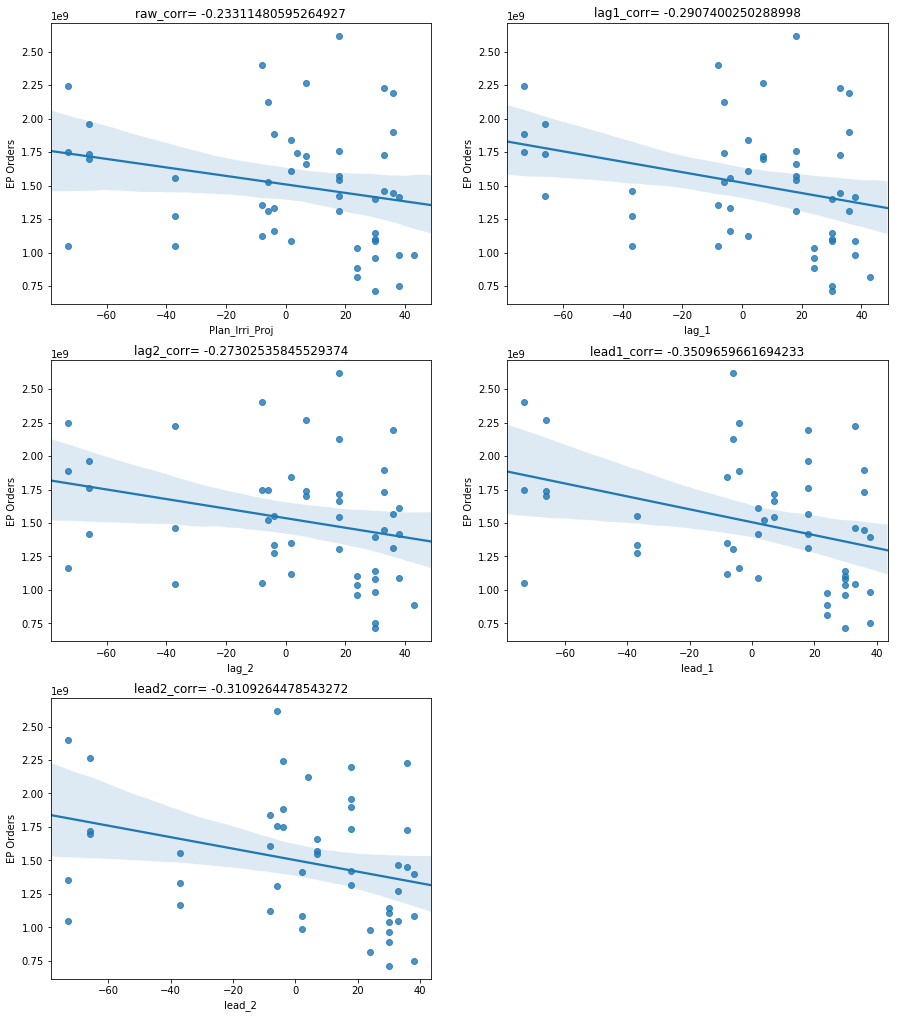

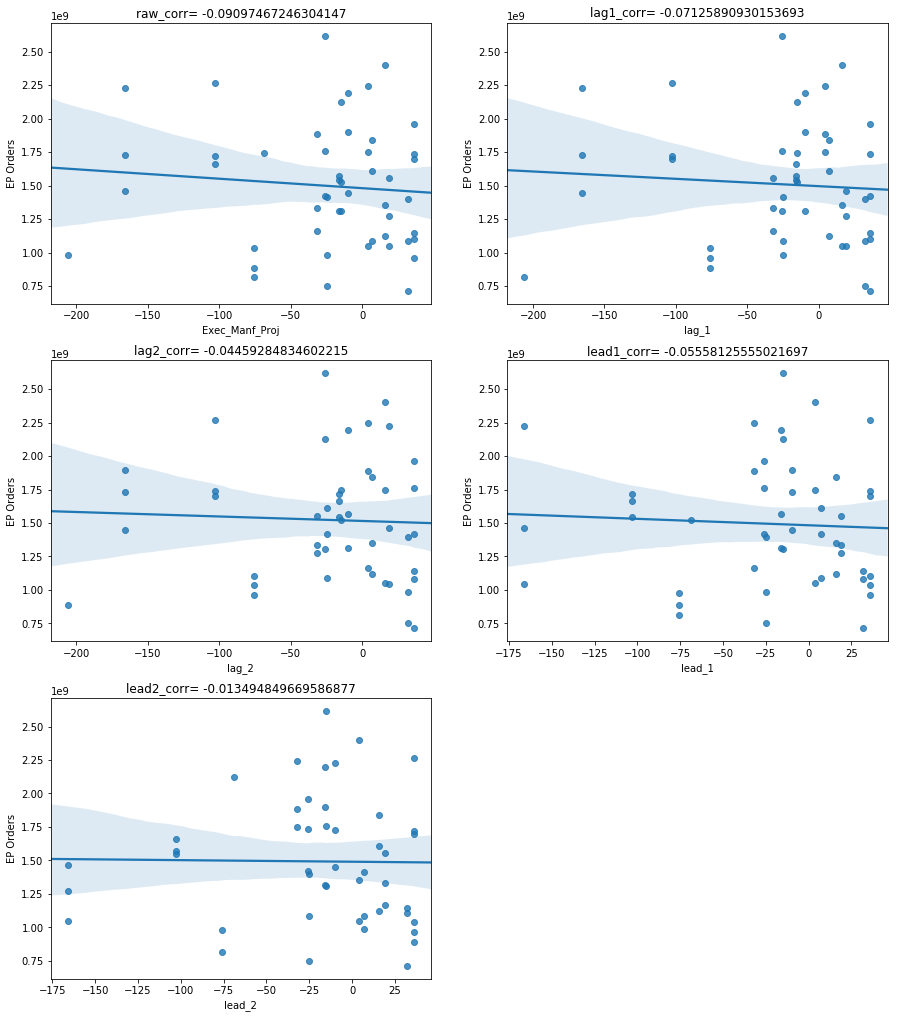

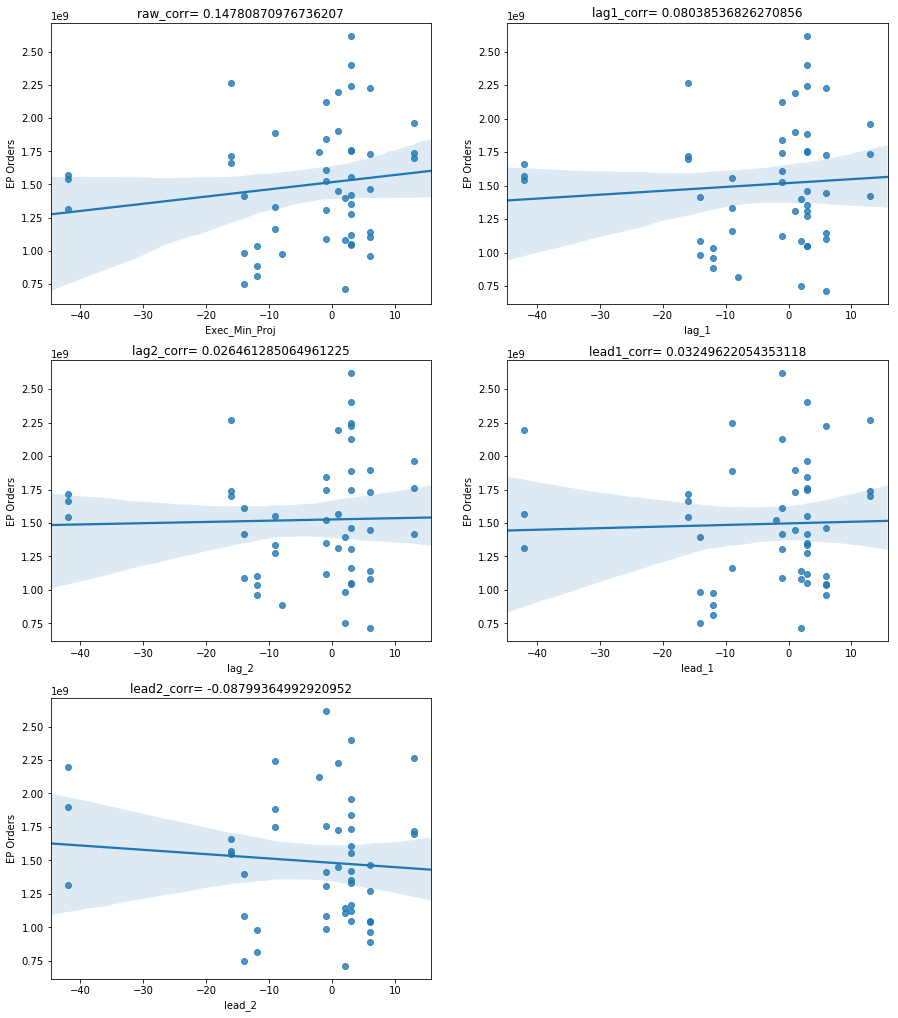

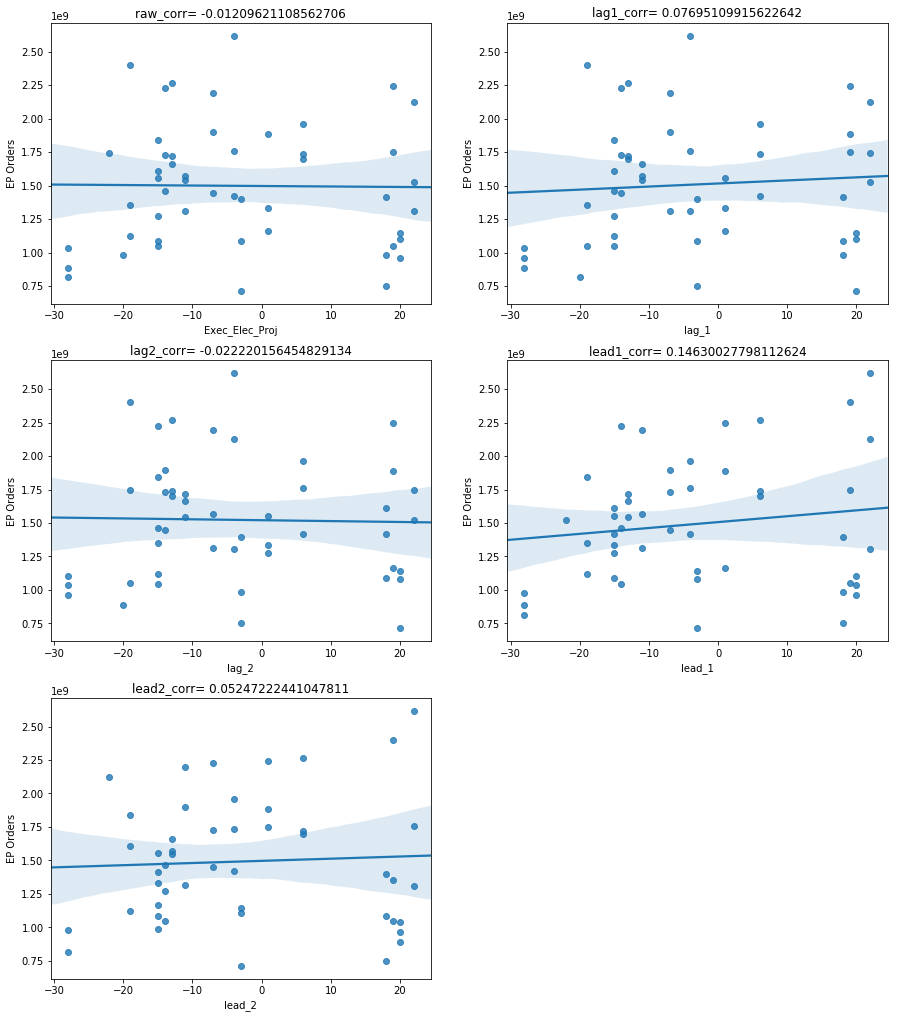

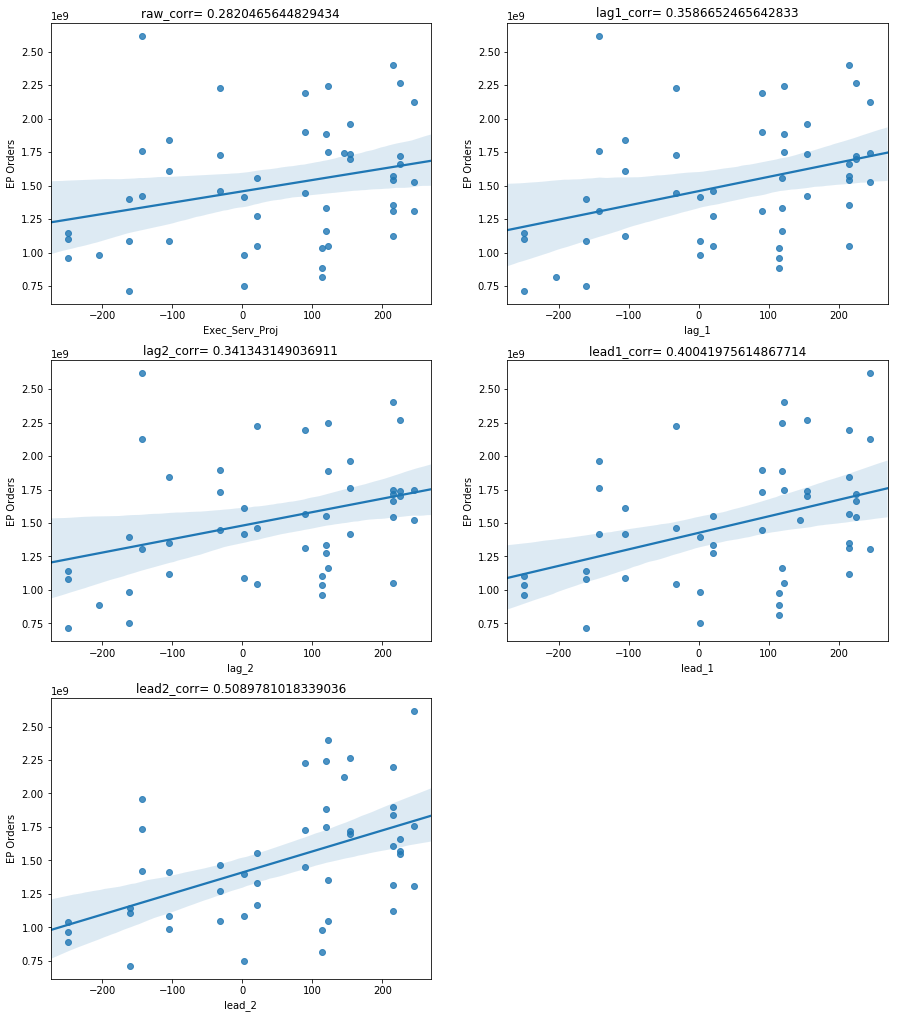

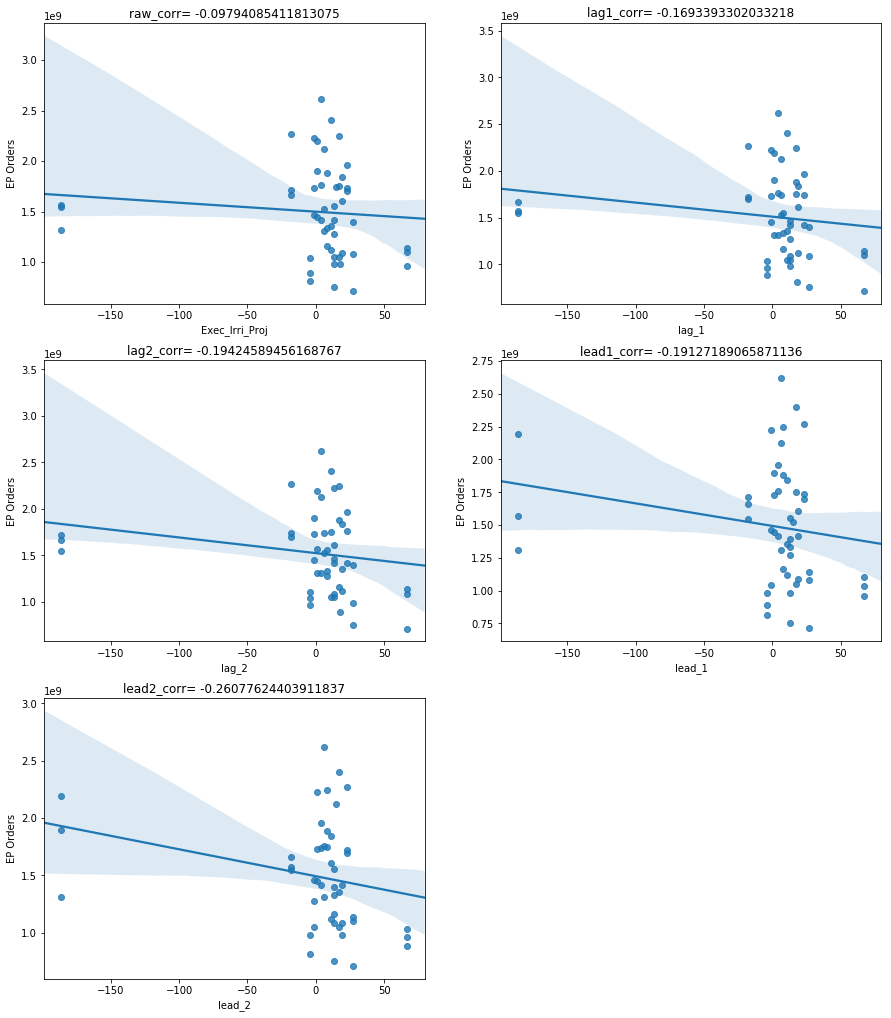

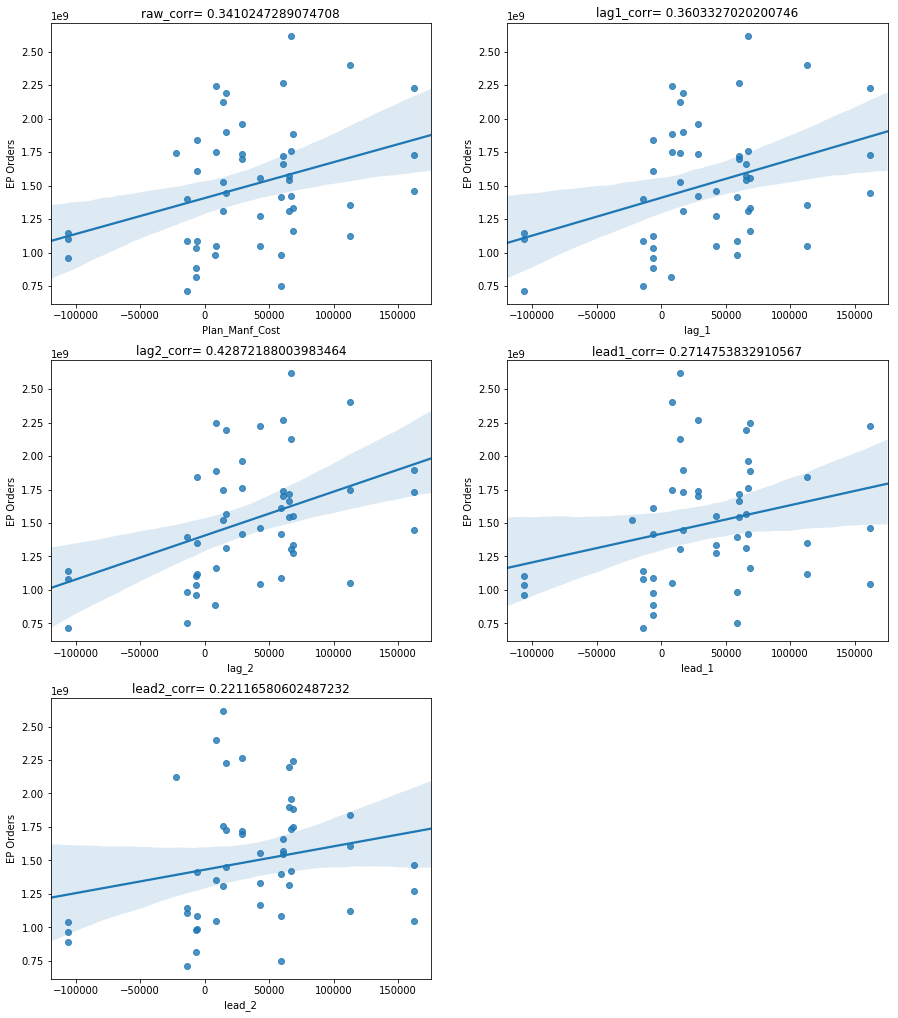

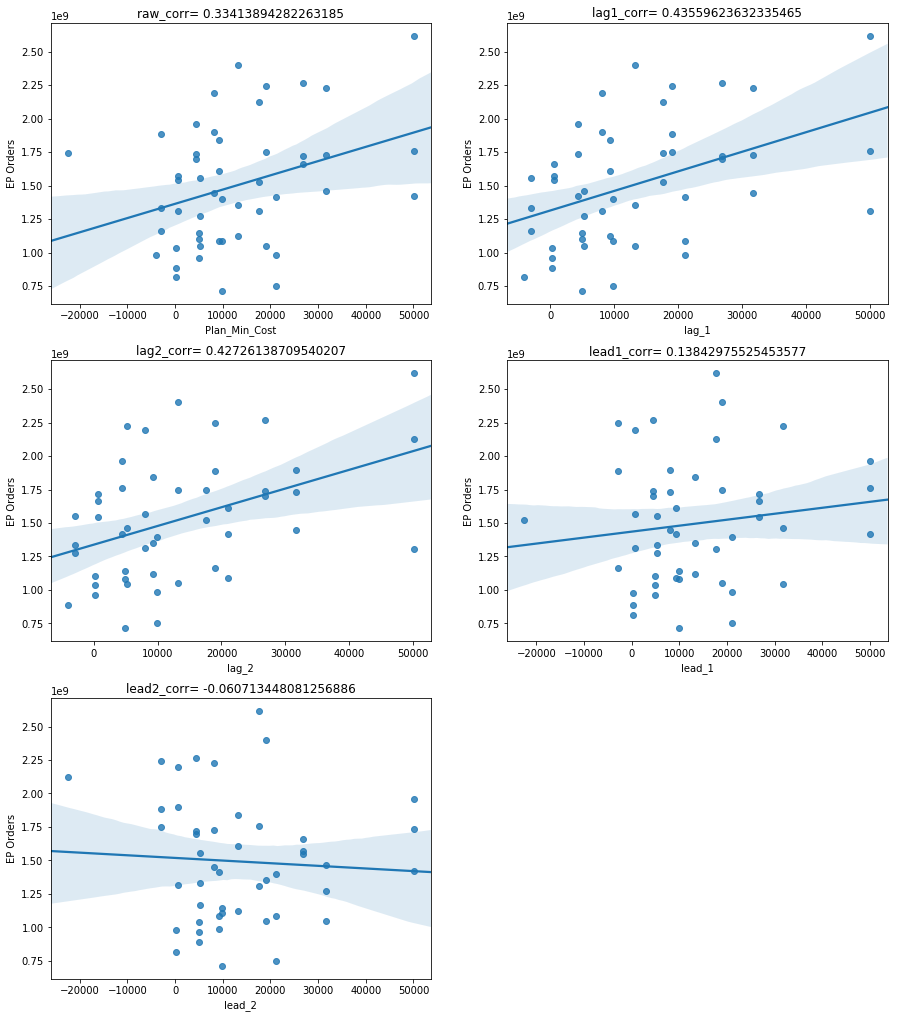

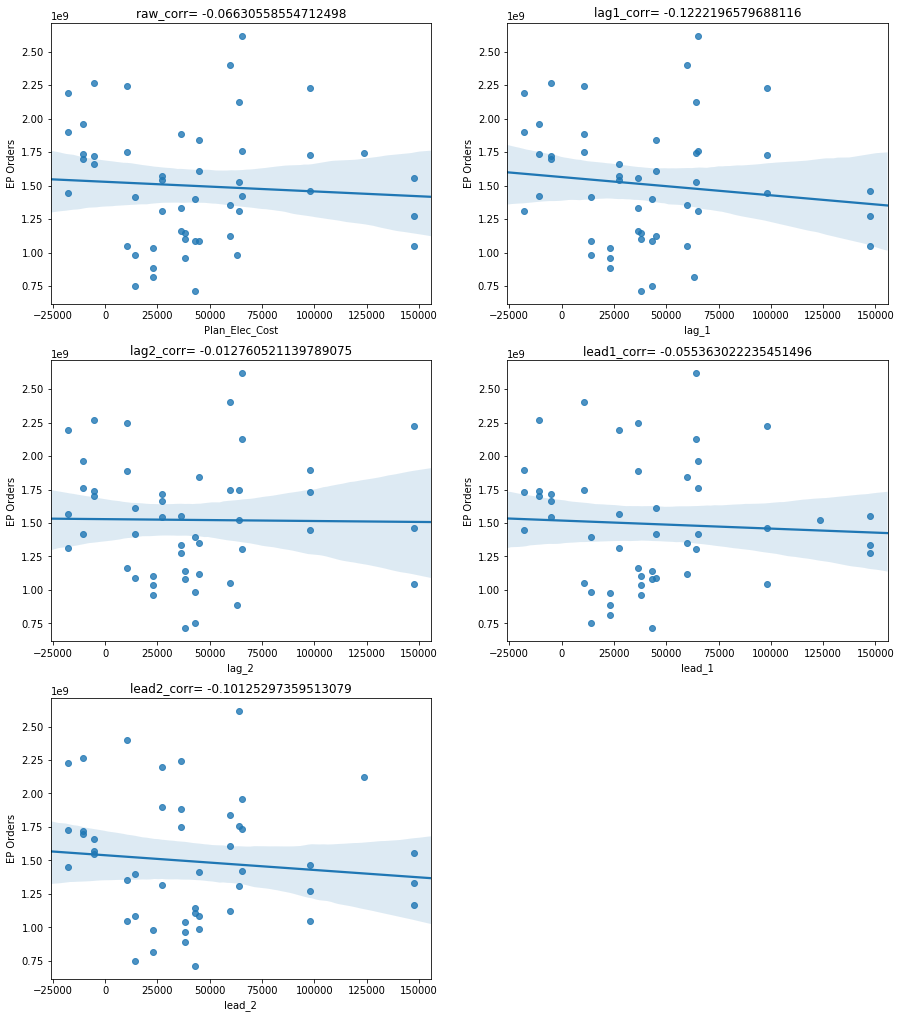

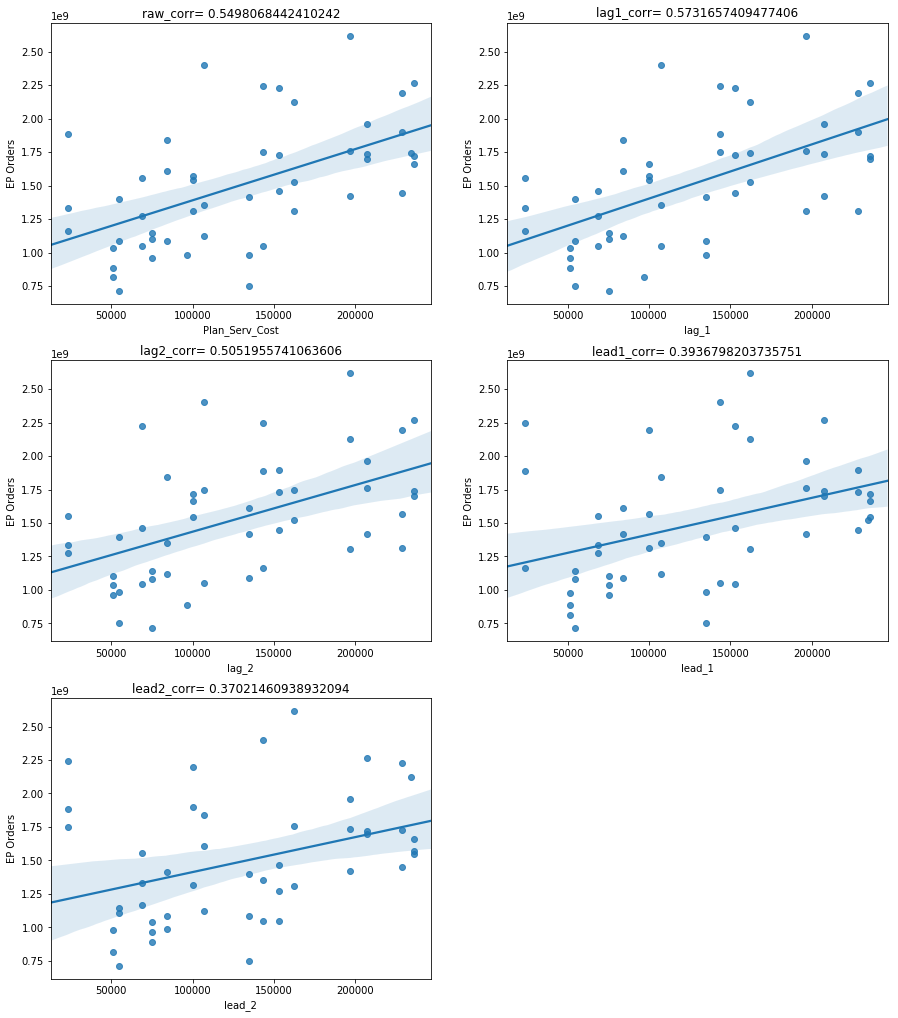

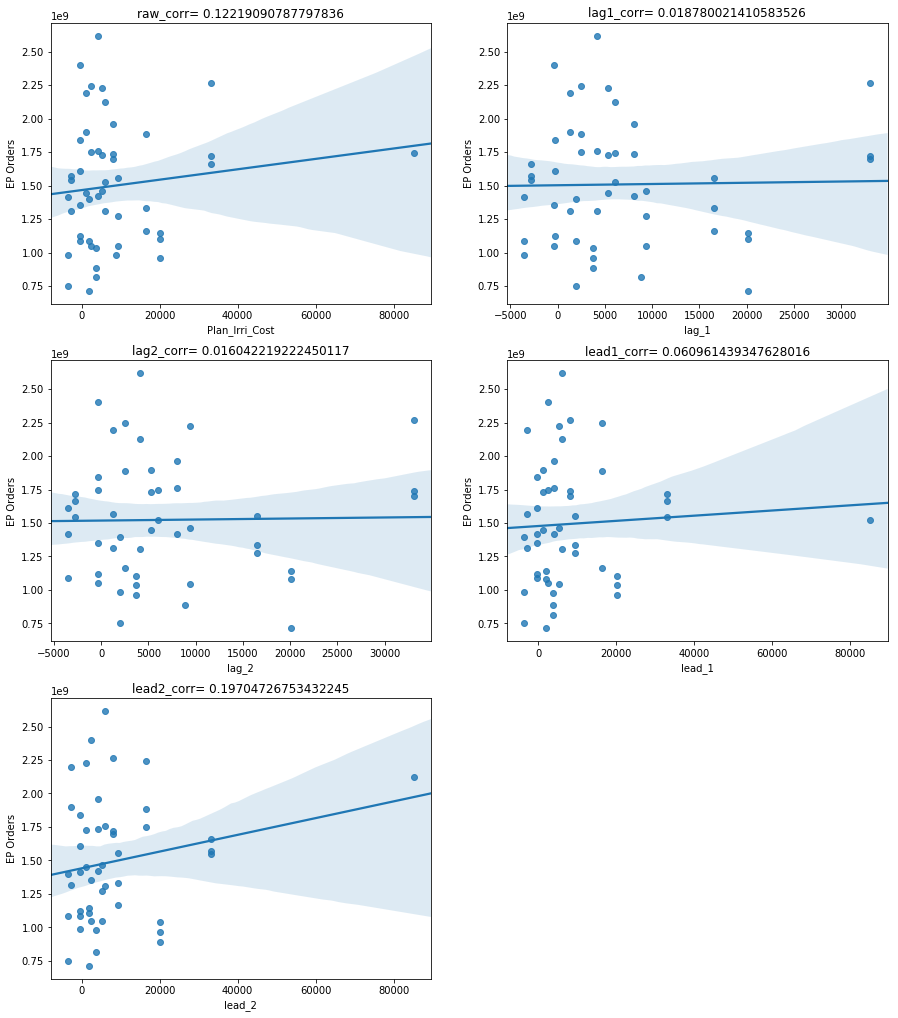

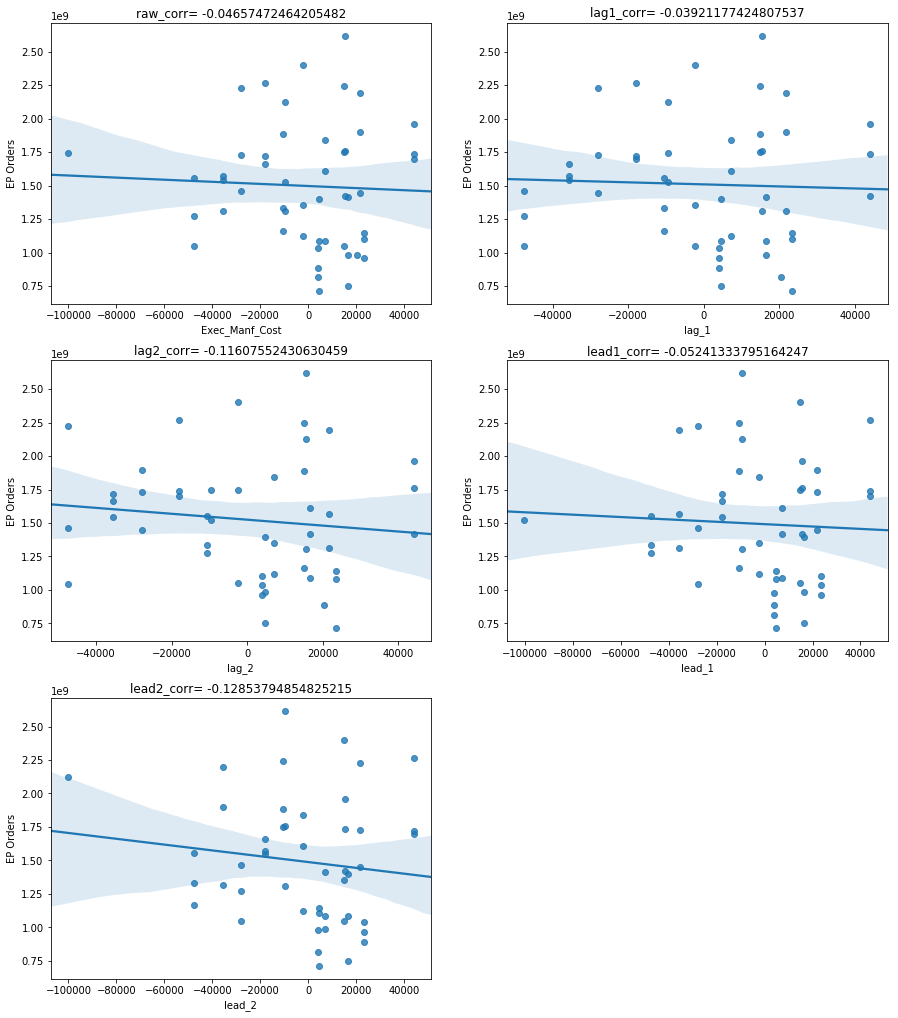

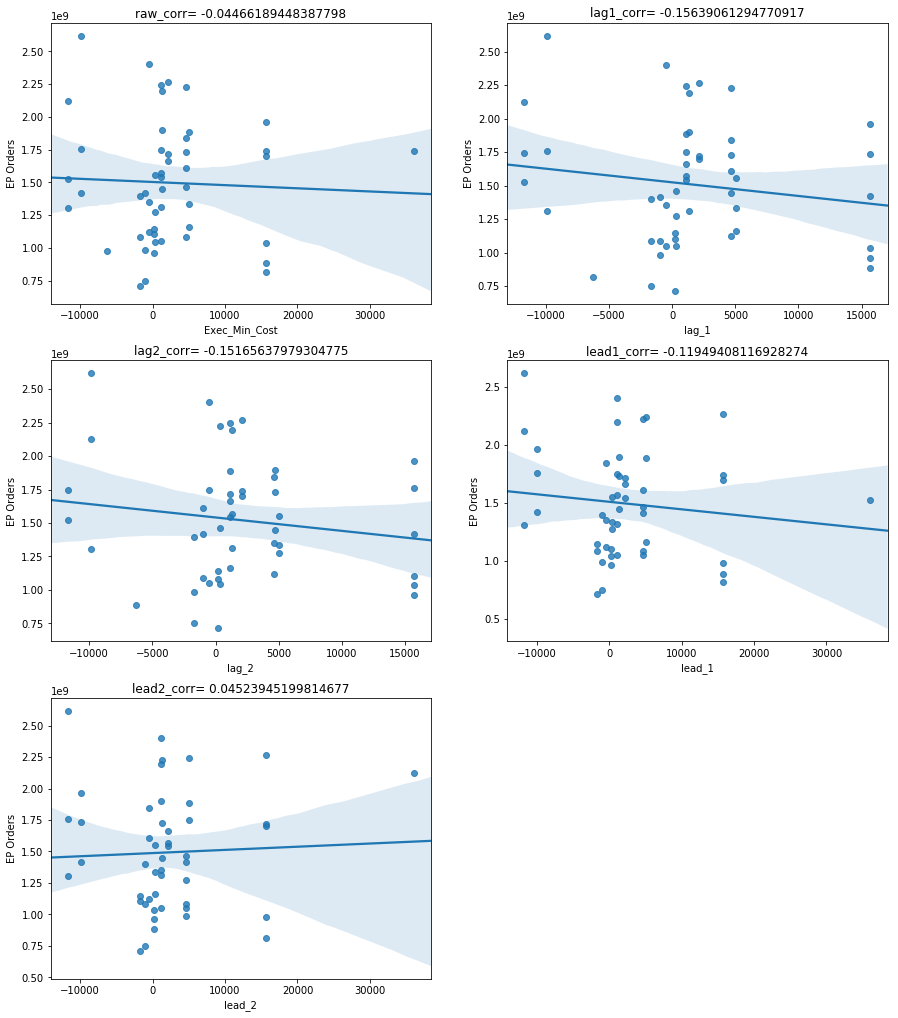

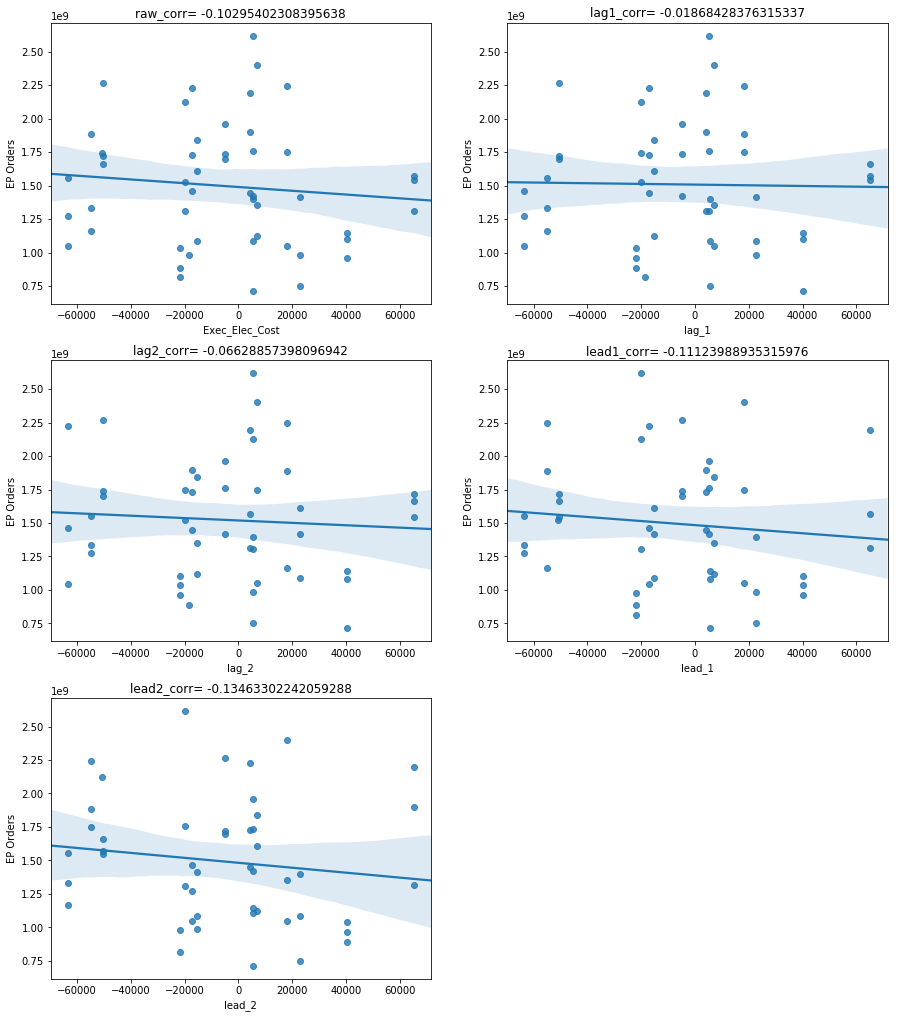

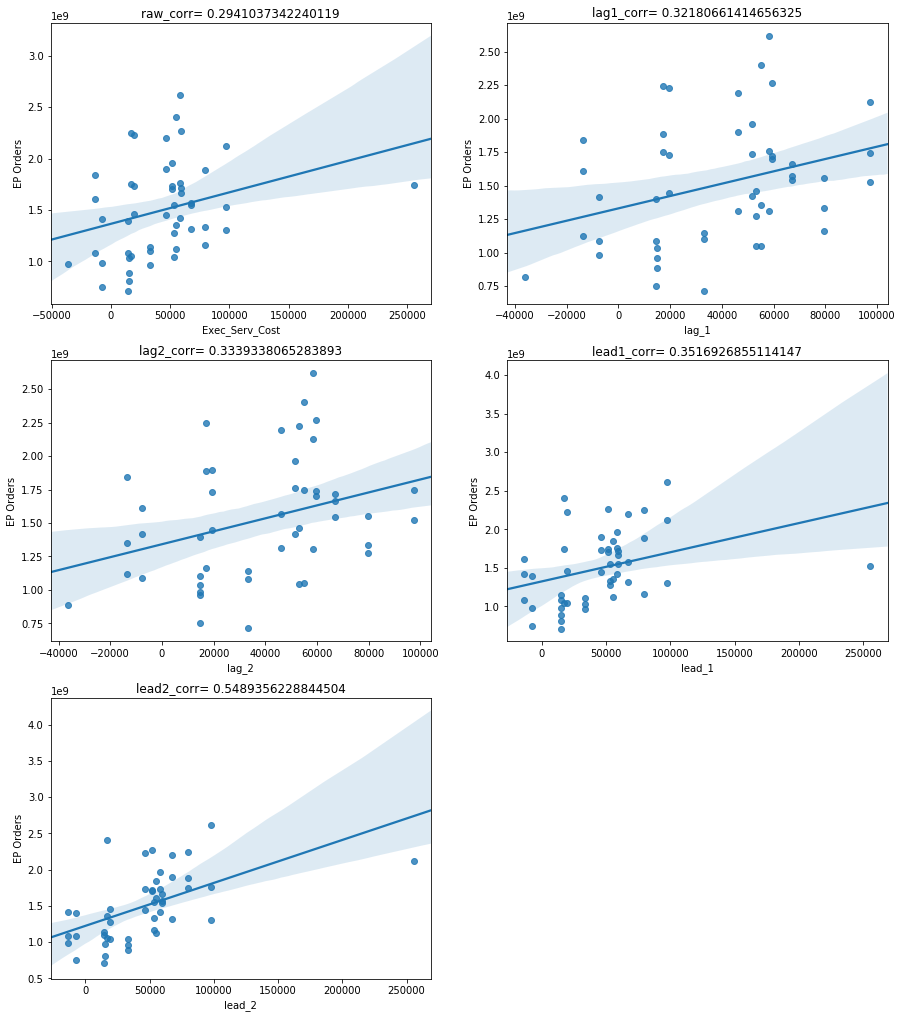

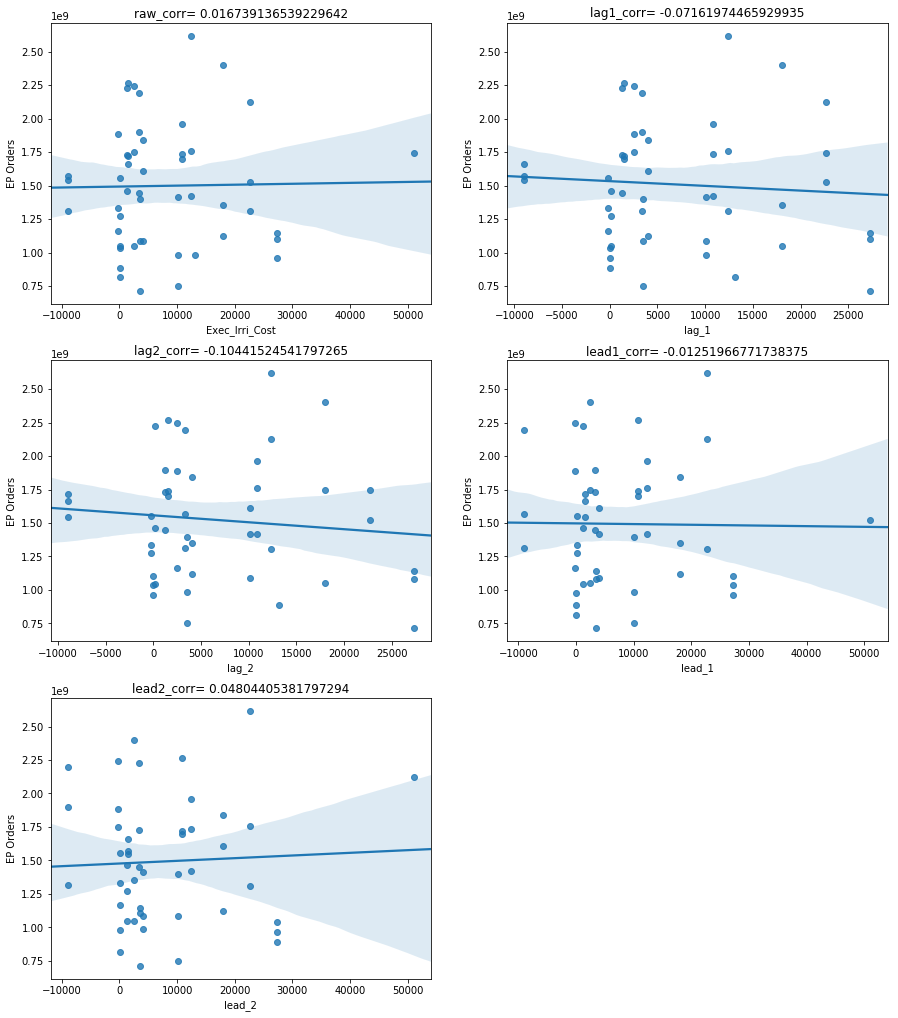

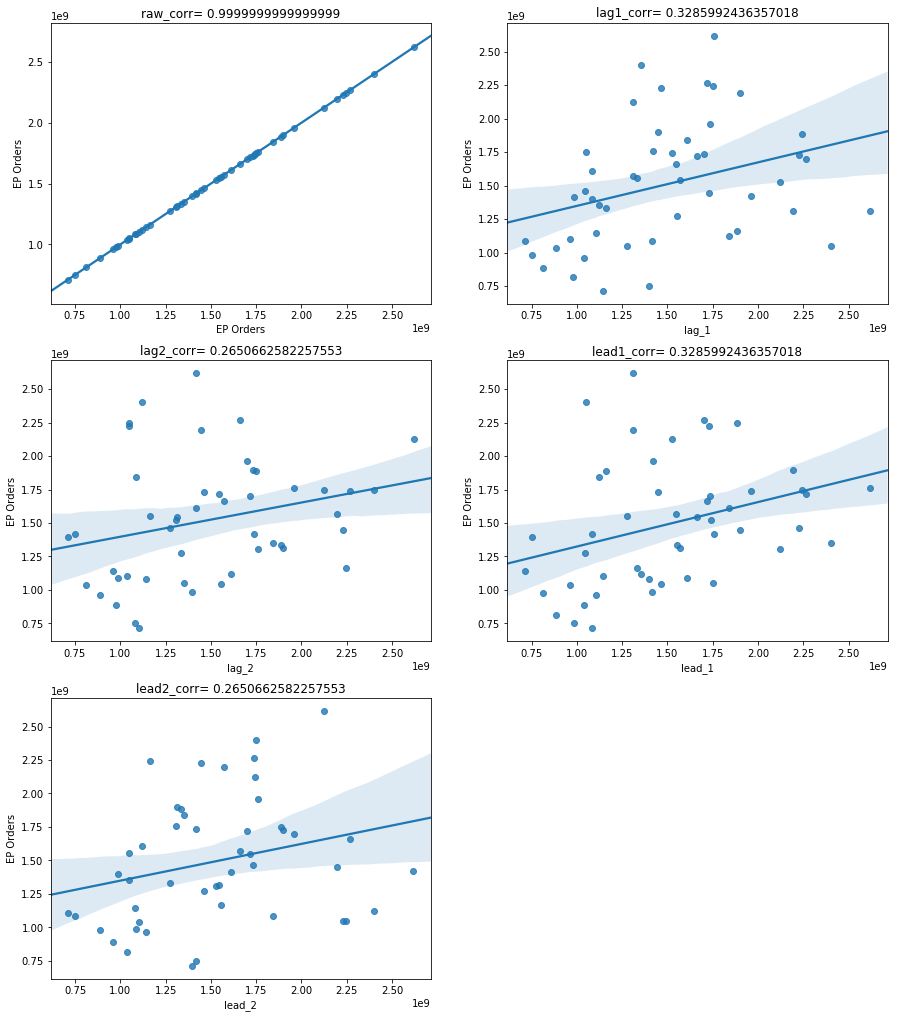

In [22]:
for i in data_lag.columns:
    lead_lag(data_lag,i,'EP Orders')

In [23]:
# Data Transformation for lead-lag

data_final = data_lag.copy()

data_final['CPI.Overall'] = data_final['CPI.Overall'].shift(-2)
data_final['CPI.Housing'] = data_final['CPI.Housing'].shift(-2)
data_final['CPI.Fuel...Light'] = data_final['CPI.Fuel...Light'].shift(-2)
data_final['WPI.Manufacturing.of.Electrical.equipments'] = data_final['WPI.Manufacturing.of.Electrical.equipments'].shift(1)
data_final['IIP.Electricity'] = data_final['IIP.Electricity'].shift(-2)
data_final['Exports'] = data_final['Exports'].shift(1)
data_final['Electricity.Generation'] = data_final['Electricity.Generation'].shift(-2)
data_final['Electricity.Capacity'] = data_final['Electricity.Capacity'].shift(-2)
data_final['Electricity.Requirement'] = data_final['Electricity.Requirement'].shift(-2)
data_final['PMI_Services'] = data_final['PMI_Services'].shift(2)
data_final['Current_Situation_Index'] = data_final['Current_Situation_Index'].shift(1)
data_final['Future_expectations_index'] = data_final['Future_expectations_index'].shift(1)
data_final['PLF_Thermal'] = data_final['PLF_Thermal'].shift(-1)
data_final['PLF_Coal_based'] = data_final['PLF_Coal_based'].shift(-1)
data_final['PLF_Gas_based'] = data_final['PLF_Gas_based'].shift(2)
data_final['PLF_Lignite_based'] = data_final['PLF_Lignite_based'].shift(-2)
data_final['Crude.oil'] = data_final['Crude.oil'].shift(1)
data_final['Natural.gas'] = data_final['Natural.gas'].shift(1)

data_final['Plan_Manf_Proj'] = data_final['Plan_Manf_Proj'].shift(-2)
data_final['Plan_Min_Proj'] = data_final['Plan_Min_Proj'].shift(-1)
data_final['Plan_Serv_Proj'] = data_final['Plan_Serv_Proj'].shift(2)
data_final['Plan_Irri_Proj'] = data_final['Plan_Irri_Proj'].shift(-1)
data_final['Exec_Manf_Proj'] = data_final['Exec_Manf_Proj'].shift(1)
data_final['Plan_Elec_Proj'] = data_final['Exec_Elec_Proj'].shift(-1)
data_final['Plan_Serv_Proj'] = data_final['Exec_Serv_Proj'].shift(-2)
data_final['Plan_Irri_Proj'] = data_final['Exec_Irri_Proj'].shift(-2)

data_final['Plan_Manf_Cost'] = data_final['Plan_Manf_Cost'].shift(2)
data_final['Plan_Min_Cost'] = data_final['Plan_Min_Cost'].shift(1)
data_final['Exec_Manf_Cost'] = data_final['Exec_Manf_Cost'].shift(-2)
data_final['Exec_Min_Cost'] = data_final['Exec_Min_Cost'].shift(1)
data_final['Exec_Serv_Cost'] = data_final['Exec_Serv_Cost'].shift(-2)
data_final

Year  Month  CPI.Overall  CPI.Housing  CPI.Fuel...Light  WPI.Overall  \
0   2013      9        116.3        111.1             111.6        114.3   
1   2013     10        114.5        110.7             111.9        114.6   
2   2013     11        113.6        111.6             112.2        114.3   
3   2013     12        113.6        112.5             112.4        113.4   
4   2014      1        114.2        113.2             112.5        113.6   
5   2014      2        115.1        113.9             112.5        113.6   
6   2014      3        115.8        114.3             112.5        114.3   
7   2014      4        116.7        113.9             113.2        114.1   
8   2014      5        119.2        114.8             113.9        114.8   
9   2014      6        120.3        115.5             114.0        115.2   
10  2014      7        120.1        116.1             114.3        116.7   
11  2014      8        120.1        116.7             114.7        117.2   
12  2014      9        120.1        117.1             115.5        116.4   
13  2014     10        119.4        116.5             115.7        115.6   
14  2014     11        119.5        117.3             116.5        114.1   
15  2014     12        119.7        118.1             117.7        112.1   
16  2015      1        120.2        118.6             118.3        110.8   
17  2015      2        120.7        119.2             118.7        109.6   
18  2015      3        121.6        119.6             119.2        109.9   
19  2015      4        123.0        119.0             119.8        110.2   
20  2015      5        123.6        119.9             120.1        111.4   
21  2015      6        124.8        120.9             120.6        111.8   
22  2015      7        125.4        121.6             120.4        111.1   
23  2015      8        126.1        122.4             120.8        110.0   
24  2015      9        126.6        122.9             121.6        109.9   
25  2015     10        126.1        122.4             122.0        110.1   
26  2015     11        126.3        123.4             122.7        109.9   
27  2015     12        126.0        124.4             123.1        109.4   
28  2016      1        126.0        124.9             122.4        108.0   
29  2016      2        127.3        125.6             122.3        107.1   
30  2016      3        128.6        126.0             122.7        107.7   
31  2016      4        130.1        125.5             123.3        109.0   
32  2016      5        131.1        126.4             123.4        110.4   
33  2016      6        131.1        127.3             123.6        111.7   
34  2016      7        130.9        127.9             124.1        111.8   
35  2016      8        131.4        128.7             124.3        111.2   
36  2016      9        131.2        129.1             125.0        111.4   
37  2016     10        130.4        128.5             126.6        111.5   
38  2016     11        130.3        129.6             126.8        111.9   
39  2016     12        130.6        130.5             127.9        111.7   
40  2017      1        130.9        131.1             129.1        112.6   
41  2017      2        131.1        131.7             129.8        113.0   
42  2017      3        131.4        132.1             129.4        113.2   
43  2017      4        132.0        131.4             128.8        113.2   
44  2017      5        134.2        132.6             129.4        112.9   
45  2017      6        135.4        134.4             129.8        112.7   
46  2017      7        135.2        135.7             131.0        113.9   
47  2017      8        136.1        137.3             132.2        114.8   
48  2017      9          NaN          NaN               NaN        114.9   
49  2017     10          NaN          NaN               NaN        115.6   

    WPI.Fuel...Power  WPI.Manufacturing.of.Electrical.equipments  \
0              119.2                                       

## Pearson's Coorelation

In [31]:
corrmat = data_final.corr()
# corrmat

In [32]:
corrmat['EP Orders'].sort_values()

WPI.Fuel...Power                             -0.574488
Natural.gas                                  -0.512632
PLF_Coal_based                               -0.486896
PLF_Thermal                                  -0.481140
Crude.oil                                    -0.455353
Exports                                      -0.370834
WPI.Overall                                  -0.334583
PLF_Gas_based                                -0.281971
Plan_Irri_Proj                               -0.260776
PLF_Lignite_based                            -0.205575
Exec_Min_Cost                                -0.156391
Exec_Manf_Cost                               -0.128538
Exec_Elec_Cost                               -0.102954
Exec_Irri_Proj                               -0.097941
Month                                        -0.082878
Exec_Manf_Proj                               -0.071259
Plan_Elec_Cost                               -0.066306
Exec_Elec_Proj                               -0.012096
Exec_Irri_

In [33]:
corrmat.index.values

array(['Year', 'Month', 'CPI.Overall', 'CPI.Housing', 'CPI.Fuel...Light',
       'WPI.Overall', 'WPI.Fuel...Power',
       'WPI.Manufacturing.of.Electrical.equipments', 'WPI.Machinery',
       'WPI.Motor.Vehicles', 'IIP.Overall', 'IIP.Mining',
       'IIP.Manufacturing', 'IIP.Electricity', 'Exports', 'Imports',
       'Exchange', 'Electricity.Generation', 'Electricity.Capacity',
       'Electricity.Requirement', 'PMI_Manf', 'PMI_Services',
       'Current_Situation_Index', 'Future_expectations_index',
       'PLF_Thermal', 'PLF_Coal_based', 'PLF_Gas_based',
       'PLF_Lignite_based', 'Coal', 'Crude.oil', 'Natural.gas',
       'Refinery.products', 'Steel', 'Cement', 'Plan_Manf_Proj',
       'Plan_Min_Proj', 'Plan_Elec_Proj', 'Plan_Serv_Proj',
       'Plan_Irri_Proj', 'Exec_Manf_Proj', 'Exec_Min_Proj',
       'Exec_Elec_Proj', 'Exec_Serv_Proj', 'Exec_Irri_Proj',
       'Plan_Manf_Cost', 'Plan_Min_Cost', 'Plan_Elec_Cost',
       'Plan_Serv_Cost', 'Plan_Irri_Cost', 'Exec_Manf_Cost',
     

In [34]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [35]:
threshold = 0.2
corr_value = getCorrelatedFeature(corrmat['EP Orders'], threshold)
corr_value

Corr Value
Year                                          0.616394
CPI.Overall                                   0.632866
CPI.Housing                                   0.633463
CPI.Fuel...Light                              0.634819
WPI.Overall                                  -0.334583
WPI.Fuel...Power                             -0.574488
WPI.Manufacturing.of.Electrical.equipments    0.325887
WPI.Machinery                                 0.477605
WPI.Motor.Vehicles                            0.548675
IIP.Overall                                   0.630985
IIP.Mining                                    0.373734
IIP.Manufacturing                             0.623106
IIP.Electricity                               0.603733
Exports                                      -0.370834
Imports                                       0.493838
Exchange                                      0.501427
Electricity.Generation                        0.579494
Electricity.Capacity                          0.634608
Electricity.Requirement                       0.531404
PMI_Services                                  0.372276
Current_Situation_Index                       0.424176
Future_expectations_index                     0.574621
PLF_Thermal                                  -0.481140
PLF_Coal_based                               -0.486896
PLF_Gas_based                                -0.281971
PLF_Lignite_based                            -0.205575
Coal                                          0.336114
Crude.oil                                    -0.455353
Natural.gas                                  -0.512632
Refinery.products                             0.559331
Steel                                         0.518793
Cement                                        0.402247
Plan_Manf_Proj                                0.215907
Plan_Serv_Proj                                0.508978
Plan_Irri_Proj                               -0.260776
Exec_Serv_Proj                                0.282047
Plan_Manf_Cost                                0.428722
Plan_Min_Cost                                 0.435596
Plan_Serv_Cost                                0.549807
Exec_Serv_Cost                                0.548936
EP Orders                                     1.000000

In [36]:
df = data_final.copy()
df = df[corr_value.index]
df = df.drop(columns='Year')
df = df.dropna()
df

CPI.Overall  CPI.Housing  CPI.Fuel...Light  WPI.Overall  WPI.Fuel...Power  \
2         113.6        111.6             112.2        114.3             116.2   
3         113.6        112.5             112.4        113.4             118.3   
4         114.2        113.2             112.5        113.6             119.9   
5         115.1        113.9             112.5        113.6             118.9   
6         115.8        114.3             112.5        114.3             119.3   
7         116.7        113.9             113.2        114.1             116.5   
8         119.2        114.8             113.9        114.8             116.2   
9         120.3        115.5             114.0        115.2             115.1   
10        120.1        116.1             114.3        116.7             117.1   
11        120.1        116.7             114.7        117.2             116.6   
12        120.1        117.1             115.5        116.4             114.9   
13        119.4        116.5             115.7        115.6             112.6   
14        119.5        117.3             116.5        114.1             106.6   
15        119.7        118.1             117.7        112.1             101.3   
16        120.2        118.6             118.3        110.8              94.5   
17        120.7        119.2             118.7        109.6              88.5   
18        121.6        119.6             119.2        109.9              92.0   
19        123.0        119.0             119.8        110.2              91.3   
20        123.6        119.9             120.1        111.4              95.5   
21        124.8        120.9             120.6        111.8              96.4   
22        125.4        121.6             120.4        111.1              93.8   
23        126.1        122.4             120.8        110.0              87.6   
24        126.6        122.9             121.6        109.9              85.7   
25        126.1        122.4             122.0        110.1              85.6   
26        126.3        123.4             122.7        109.9              85.5   
27        126.0        124.4             123.1        109.4              84.8   
28        126.0        124.9             122.4        108.0              79.8   
29        127.3        125.6             122.3        107.1              75.5   
30        128.6        126.0             122.7        107.7              76.5   
31        130.1        125.5             123.3        109.0              78.3   
32        131.1        126.4             123.4        110.4              81.3   
33        131.1        127.3             123.6        111.7              85.2   
34        130.9        127.9             124.1        111.8              84.7   
35        131.4        128.7             124.3        111.2              81.1   
36        131.2        129.1             125.0        111.4              83.2   
37        130.4        128.5             126.6        111.5              84.6   
38        130.3        129.6             126.8        111.9              87.3   
39        130.6        130.5             127.9        111.7              88.4   
40        130.9        131.1             129.1        112.6              93.1   
41        131.1        131.7             129.8        113.0              94.5   
42        131.4        132.1             129.4        113.2              93.6   
43        132.0        131.4             128.8        113.2              91.7   
44        134.2        132.6             129.4        112.9              90.9   
45        135.4        134.4             129.8        112.7              89.6   
46        135.2        135.7             131.0        113.9              88.4   
47        136.1        137.3             132.2        114.8              89.1   

    WPI.Manufacturing.of.Electrical.equipments  WPI.Machinery  \
2                                        105.1          106.4   
3                                        106.3          106.4   
4

In [37]:
df.to_csv('seasonality1.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 2 to 47
Data columns (total 40 columns):
CPI.Overall                                   46 non-null float64
CPI.Housing                                   46 non-null float64
CPI.Fuel...Light                              46 non-null float64
WPI.Overall                                   46 non-null float64
WPI.Fuel...Power                              46 non-null float64
WPI.Manufacturing.of.Electrical.equipments    46 non-null float64
WPI.Machinery                                 46 non-null float64
WPI.Motor.Vehicles                            46 non-null float64
IIP.Overall                                   46 non-null float64
IIP.Mining                                    46 non-null float64
IIP.Manufacturing                             46 non-null float64
IIP.Electricity                               46 non-null float64
Exports                                       46 non-null float64
Imports                                

In [39]:
X = df.drop(columns='EP Orders')
y = df['EP Orders']

In [40]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=0)

X_train.shape, X_test.shape

((41, 39), (5, 39))

In [41]:
### Now we will run our first version of model

import statsmodels.api as sm
# OLS regression
est = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(est.summary())
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif =[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(X_train.columns)
print(vif)

                            OLS Regression Results                            
Dep. Variable:              EP Orders   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     5.775
Date:                Tue, 02 Mar 2021   Prob (F-statistic):              0.320
Time:                        14:01:58   Log-Likelihood:                -765.49
No. Observations:                  41   AIC:                             1611.
Df Residuals:                       1   BIC:                             1680.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [42]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

11

In [44]:
corr_features

{'CPI.Fuel...Light',
 'CPI.Housing',
 'Coal',
 'Electricity.Capacity',
 'Electricity.Generation',
 'Electricity.Requirement',
 'IIP.Electricity',
 'IIP.Manufacturing',
 'PLF_Coal_based',
 'Refinery.products',
 'Steel'}

In [45]:
X_train.drop(corr_features,axis=1)

CPI.Overall  WPI.Overall  WPI.Fuel...Power  \
33        131.1        111.7              85.2   
31        130.1        109.0              78.3   
13        119.4        115.6             112.6   
22        125.4        111.1              93.8   
34        130.9        111.8              84.7   
32        131.1        110.4              81.3   
40        130.9        112.6              93.1   
44        134.2        112.9              90.9   
4         114.2        113.6             119.9   
47        136.1        114.8              89.1   
20        123.6        111.4              95.5   
17        120.7        109.6              88.5   
29        127.3        107.1              75.5   
18        121.6        109.9              92.0   
43        132.0        113.2              91.7   
42        131.4        113.2              93.6   
10        120.1        116.7             117.1   
15        119.7        112.1             101.3   
7         116.7        114.1             116.5   
19        123.0        110.2              91.3   
35        131.4        111.2              81.1   
16        120.2        110.8              94.5   
39        130.6        111.7              88.4   
9         120.3        115.2             115.1   
37        130.4        111.5              84.6   
3         113.6        113.4             118.3   
28        126.0        108.0              79.8   
14        119.5        114.1             106.6   
36        131.2        111.4              83.2   
26        126.3        109.9              85.5   
8         119.2        114.8             116.2   
25        126.1        110.1              85.6   
38        130.3        111.9              87.3   
23        126.1        110.0              87.6   
21        124.8        111.8              96.4   
11        120.1        117.2             116.6   
41        131.1        113.0              94.5   
45        135.4        112.7              89.6   
5         115.1        113.6             118.9   
2         113.6        114.3             116.2   
46        135.2        113.9              88.4   

    WPI.Manufacturing.of.Electrical.equipments  WPI.Machinery  \
33                                       108.3          108.0   
31                                       108.5          107.8   
13                                       110.7          108.3   
22                                       111.0          110.2   
34                                       107.6          107.8   
32                                       108.6          107.7   
40                                       108.3          108.1   
44                                       108.4          108.1   
4                                        107.0          105.9   
47                                       109.6          108.5   
20                                       110.9          110.2   
17                                       108.9          109.5   
29                                       107.9          108.1   
18                                       108.9          109.4   
43                                       108.0          108.3   
42                                       108.0          108.3   
10                                       108.0          107.4   
15                                       110.4          108.1   
7                                        107.2          107.9   
19                                       109.2          108.9   
35                                       108.8          107.5   
16                                       109.6          108.5   
39                                       107.8          108.3   
9                                        108.6          108.2   
37                                       108.2          107.9   
3                                        106.3          106.4   
28                                       107.6          108.2   
14                                       111.3          108.9   
36                

In [46]:
X_train.drop(corr_features,axis=1).columns

Index(['CPI.Overall', 'WPI.Overall', 'WPI.Fuel...Power',
       'WPI.Manufacturing.of.Electrical.equipments', 'WPI.Machinery',
       'WPI.Motor.Vehicles', 'IIP.Overall', 'IIP.Mining', 'Exports', 'Imports',
       'Exchange', 'PMI_Services', 'Current_Situation_Index',
       'Future_expectations_index', 'PLF_Thermal', 'PLF_Gas_based',
       'PLF_Lignite_based', 'Crude.oil', 'Natural.gas', 'Cement',
       'Plan_Manf_Proj', 'Plan_Serv_Proj', 'Plan_Irri_Proj', 'Exec_Serv_Proj',
       'Plan_Manf_Cost', 'Plan_Min_Cost', 'Plan_Serv_Cost', 'Exec_Serv_Cost'],
      dtype='object')

## Mutual Information Gain

In [47]:
df = data.copy()
df = df.dropna()

X = df.drop("EP Orders",axis=1)   #Feature Matrix
y = df["EP Orders"]

In [48]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=0)

X_train.shape, X_test.shape

((45, 54), (5, 54))

In [49]:
X_train

Year  Month  CPI.Overall  CPI.Housing  CPI.Fuel...Light  WPI.Overall  \
27  2015     12        126.1        122.4             122.0        109.4   
38  2016     11        131.2        129.1             125.0        111.9   
31  2016      4        127.3        125.6             122.3        109.0   
22  2015      7        123.6        119.9             120.1        111.1   
4   2014      1        113.6        111.6             112.2        113.6   
33  2016      6        130.1        125.5             123.3        111.7   
35  2016      8        131.1        127.3             123.6        111.2   
26  2015     11        126.6        122.9             121.6        109.9   
34  2016      7        131.1        126.4             123.4        111.8   
18  2015      3        120.2        118.6             118.3        109.9   
7   2014      4        115.1        113.9             112.5        114.1   
14  2014     11        120.1        117.1             115.5        114.1   
45  2017      6        132.0        131.4             128.8        112.7   
48  2017      9        135.2        135.7             131.0        114.9   
29  2016      2        126.0        124.4             123.1        107.1   
15  2014     12        119.4        116.5             115.7        112.1   
30  2016      3        126.0        124.9             122.4        107.7   
32  2016      5        128.6        126.0             122.7        110.4   
16  2015      1        119.5        117.3             116.5        110.8   
42  2017      3        130.9        131.1             129.1        113.2   
20  2015      5        121.6        119.6             119.2        111.4   
43  2017      4        131.1        131.7             129.8        113.2   
8   2014      5        115.8        114.3             112.5        114.8   
13  2014     10        120.1        116.7             114.7        115.6   
25  2015     10        126.1        122.4             120.8        110.1   
5   2014      2        113.6        112.5             112.4        113.6   
17  2015      2        119.7        118.1             117.7        109.6   
40  2017      1        130.3        129.6             126.8        112.6   
49  2017     10        136.1        137.3             132.2        115.6   
1   2013     10        114.8        110.5             110.9        114.6   
12  2014      9        120.1        116.1             114.3        116.4   
37  2016     10        131.4        128.7             124.3        111.5   
24  2015      9        125.4        121.6             120.4        109.9   
6   2014      3        114.2        113.2             112.5        114.3   
23  2015      8        124.8        120.9             120.6        110.0   
36  2016      9        130.9        127.9             124.1        111.4   
21  2015      6        123.0        119.0             119.8        111.8   
19  2015      4        120.7        119.2             118.7        110.2   
9   2014      6        116.7        113.9             113.2        115.2   
39  2016     12        130.4        128.5             126.6        111.7   
46  2017      7        134.2        132.6             129.4        113.9   
3   2013     12        114.5        110.7             111.9        113.4   
0   2013      9        113.7        109.7             110.5        114.3   
47  2017      8        135.4        134.4             129.8        114.8   
44  2017      5        131.4        132.1             129.4        112.9   

    WPI.Fuel...Power  WPI.Manufacturing.of.Electrical.equipments  \
27              84.8                                       107.6   
38              87.3                                       107.8   
31              78.3                                       108.6   
22              93.8                                       110.3   
4              119.9                                       106.9   
33              85.2                                       107.6   
35              81.1           

In [50]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.19071936, 0.        , 0.1360208 , 0.19259793, 0.18562363,
       0.09079186, 0.29992061, 0.08859689, 0.10449568, 0.19178778,
       0.29101341, 0.        , 0.20238731, 0.20911627, 0.        ,
       0.05674613, 0.12068175, 0.16641614, 0.17566384, 0.14390662,
       0.0281016 , 0.02749306, 0.        , 0.04206162, 0.19958243,
       0.1380325 , 0.        , 0.22697801, 0.01082617, 0.15847121,
       0.1224645 , 0.21766475, 0.23954282, 0.19248945, 0.        ,
       0.        , 0.        , 0.        , 0.0107911 , 0.00405541,
       0.        , 0.00141676, 0.03745942, 0.01339762, 0.01438671,
       0.        , 0.03951445, 0.08726366, 0.        , 0.        ,
       0.        , 0.00592005, 0.        , 0.        ])

In [51]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

WPI.Fuel...Power                              0.299921
IIP.Overall                                   0.291013
Steel                                         0.239543
PLF_Lignite_based                             0.226978
Refinery.products                             0.217665
IIP.Electricity                               0.209116
IIP.Manufacturing                             0.202387
PLF_Thermal                                   0.199582
CPI.Housing                                   0.192598
Cement                                        0.192489
WPI.Motor.Vehicles                            0.191788
Year                                          0.190719
CPI.Fuel...Light                              0.185624
Electricity.Capacity                          0.175664
Electricity.Generation                        0.166416
Crude.oil                                     0.158471
Electricity.Requirement                       0.143907
PLF_Coal_based                                0.138032
CPI.Overal

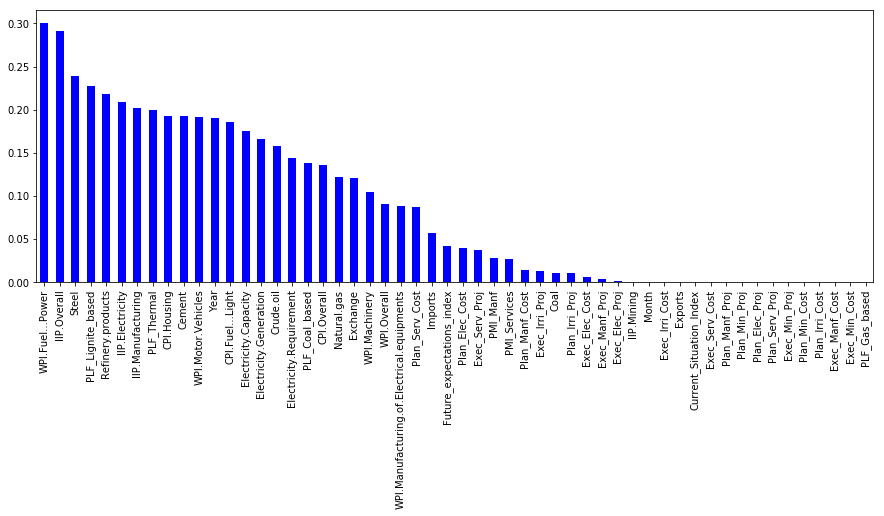

In [52]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5),color = 'blue')

In [53]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
         score_func=<function mutual_info_regression at 0x000002859CC6B2F0>)

In [54]:
selected_top_columns.get_support()
X_train.columns[selected_top_columns.get_support()]

C:\Users\sachin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Index(['CPI.Housing', 'WPI.Fuel...Power', 'WPI.Motor.Vehicles', 'IIP.Overall',
       'IIP.Manufacturing', 'IIP.Electricity', 'PLF_Thermal',
       'PLF_Lignite_based', 'Refinery.products', 'Steel', 'Cement'],
      dtype='object')

In [55]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.19.1


In [56]:
df1 = df.copy()
df1 = df1.dropna()
df1
X1 = df1.drop(columns='EP Orders')
y1 = df1['EP Orders']


In [57]:
# evaluate random forest ensemble for regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor(n_estimators=500, max_depth= 3, max_features='sqrt')
# evaluate the model
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X1, y1, scoring='neg_mean_absolute_percentage_error', cv=cv)
# # report performance
# print('MAPE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

C:\Users\sachin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [58]:
df2 = data_final.copy()
df2 = df2.dropna()

X2 = df2[['WPI.Fuel...Power', 'IIP.Mining', 'Exports', 'Exchange',
       'Future_expectations_index', 'PLF_Gas_based', 'Crude.oil',
       'Plan_Serv_Proj', 'Exec_Serv_Proj', 'Exec_Serv_Cost']]
# X2 = df2.drop(columns=['EP Orders', 'Year', 'Month']) #all features 
# X2 = df.drop(columns= 'EP Orders')   # correlated features

y2 = df2['EP Orders']
X2

WPI.Fuel...Power  IIP.Mining    Exports  Exchange  \
2              116.2        93.3  1693204.7     62.63   
3              118.3       104.2  1515833.4     61.91   
4              119.9       106.2  1634002.2     62.08   
5              118.9        97.8  1669321.5     62.25   
6              119.3       114.0  1577691.3     61.01   
7              116.5        93.6  1851228.4     60.36   
8              116.2        94.4  1557013.6     59.31   
9              115.1        91.0  1660397.4     59.73   
10             117.1        84.6  1547393.1     60.06   
11             116.6        83.5  1549072.5     60.90   
12             114.9        82.8  1632203.4     60.86   
13             112.6        89.1  1757030.4     61.34   
14             106.6        92.9  1588229.6     61.70   
15             101.3        98.9  1634279.3     62.75   
16              94.5       103.0  1641270.8     62.23   
17              88.5        94.9  1517912.7     62.04   
18              92.0       110.8  1363799.4     62.45   
19              91.3        89.9  1500929.6     62.75   
20              95.5        95.9  1389181.0     63.80   
21              96.4        89.3  1437362.1     63.86   
22              93.8        87.6  1425608.6     63.64   
23              87.6        88.5  1481499.5     65.07   
24              85.7        88.8  1404434.4     66.22   
25              85.6       100.0  1448140.5     65.06   
26              85.5        98.2  1395891.7     66.12   
27              84.8       103.0  1293311.1     66.60   
28              79.8       105.3  1504615.7     67.25   
29              75.5       105.6  1425683.2     68.24   
30              76.5       116.0  1422464.3     67.02   
31              78.3        95.9  1535588.5     66.47   
32              81.3       101.4  1388625.6     66.91   
33              85.2        98.4  1498472.4     67.30   
34              84.7        88.4  1524636.5     67.21   
35              81.1        84.7  1457216.5     66.94   
36              83.2        87.7  1445700.3     66.74   
37              84.6       101.0  1519507.4     66.75   
38              87.3       106.2  1559267.3     67.63   
39              88.4       114.1  1356994.7     67.90   
40              93.1       114.4  1633444.5     68.08   
41              94.5       110.5  1522027.0     67.08   
42              93.6       127.7  1715376.3     65.92   
43              91.7        98.8  1919945.3     64.51   
44              90.9       101.7  1589143.9     64.42   
45              89.6        98.5  1546537.3     64.44   
46              88.4        92.4  1519283.7     64.46   
47              89.1        92.6  1452891.0     63.97   

    Future_expectations_index  PLF_Gas_based  Crude.oil  Plan_Serv_Proj  \
2                        96.9          23.36     3185.9          -249.0   
3                        96.9          22.32     3145.3          -249.0   
4                        96.9          23.51     3256.4          -249.0   
5                       109.7          23.73     3261.1          -161.0   
6                       109.7          24.85     2930.3          -161.0   
7                       109.7          25.40     3174.1          -161.0   
8                       117.7          23.47     3103.4             2.0   
9                       117.7          24.98     3159.8             2.0   
10                      117.7          22.17     3122.0             2.0   
11                      118.6          23.91     3146.5          -105.0   
12                      118.6          19.30     3024.5          -105.0   
13                      118.6          21.54     3044.3          -105.0   
14                      118.3          19.82     3218.0           215.0   
15                      118.3          21.77     3143.4           215.0   
16                      118.3          22.28     3211.0           215.0   
17                      126.7          19.42     3185.7           122.0   
18                      126.7          18.42     

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X2,
    y2,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape


((32, 10), (14, 10))

In [62]:
model.fit(X_train, y_train)
yhat = model.predict(X_test)
y1=model.predict(X_train)

In [63]:
# from sklearn.metrics import mean_absolute_percentage_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return (np.mean(np.abs((y_true-y_pred) /y_true)) * 100)


print( mean_absolute_percentage_error(y_train, y1))
print( mean_absolute_percentage_error(y_test, yhat))

12.527989518222451
17.535484179998125


In [64]:
# importance = model.feature_importances_
# # # summarize feature importance
# for i,v in enumerate(importance):
# 	print (X2.columns[i], v)
# # plot feature importance
# plt.bar([x for x in X2.columns], importance)
# plt.xticks(X2.columns, rotation='vertical')
# plt.rcParams['figure.figsize'] = [15, 2] 
# plt.show()

In [65]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('MAPE=',mape)
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [66]:
base_model = RandomForestRegressor()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
MAPE= 21.205730335134017
Average Error: 293170500.7857 degrees.
Accuracy = 78.79%.


In [67]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'max_features': [2,3,4,5,6,7],
    'n_estimators': [50, 100, 200, 300, 400,500,600,700,800,900,1000],
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [68]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 396 candidates, totalling 1188 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1188 out of 1188 | elapsed:  4.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8], 'max_features': [2, 3, 4, 5, 6, 7], 'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [69]:
grid_search.best_params_


{'max_depth': 7, 'max_features': 2, 'n_estimators': 100}

In [70]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)


Model Performance
MAPE= 18.259148586634105
Average Error: 260389908.2344 degrees.
Accuracy = 81.74%.


In [71]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 3.74%.


## Random Search

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', 'auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1,10, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, None],
 'max_features': ['log2', 'sqrt', 'auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 155, 261, 366, 472, 577, 683, 788, 894, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [ ]:
rf_random.best_params_

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

## Final Model

In [ ]:
X_train

In [ ]:
final_model = RandomForestRegressor(n_estimators= 50,
 min_samples_split = 10,
 min_samples_leaf = 4,
 max_features = 'sqrt',
 max_depth = 5,
 bootstrap = True)
final_model.fit(X_train,y_train)
yhat = final_model.predict(X_test)
print( mean_absolute_percentage_error(y_test, yhat))

In [ ]:
data_pred = data[['WPI.Fuel...Power', 'IIP.Mining', 'Exports', 'Exchange',
       'Future_expectations_index', 'PLF_Gas_based', 'Crude.oil',
       'Plan_Serv_Proj', 'Exec_Serv_Proj', 'Exec_Serv_Cost']]
data_pred = data_pred.tail()
data_pred

In [ ]:
y_pred = final_model.predict(data_pred)
y_pred

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
yhat = linear_model.predict(X_test)
print( mean_absolute_percentage_error(y_test, yhat))

In [ ]:
y_pred_linear = linear_model.predict(data_pred)
y_pred_linear